Imports

In [78]:
%%capture
%pip install pandas_read_xml
%pip install tqdm   
%pip install pymupdf
%pip install numpy
%pip install nltk
%pip install tqdm

import pandas_read_xml as pdx
from pandas_read_xml import flatten, fully_flatten, auto_separate_tables, auto_flatten

import time
import os, sys
import re
import pandas as pd
import numpy as np
import math
import seaborn as sb
import nltk
import tqdm
import time
import gc
import concurrent.futures
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import multiprocessing
import fitz  # this is pymupdf
import matplotlib.pyplot as plt

## Book parsing - JavaNotesForProfessionals

In [2]:
from parsing.preprocessing import pdf_preprocessing

In [3]:
toc_list = pdf_preprocessing.get_toc_list("D:/Skola/Skola-ing/DP/data/books_to_parse/JavaNotesForProfessionals.pdf")

In [4]:
%%capture
toc_list

In [5]:
chaps = pdf_preprocessing.get_section_dict(sections=toc_list, level=3, section_range_start=3, section_range_end=-31, delimiter=":")

In [6]:
%%capture
chaps

In [7]:
# special_charset_map = {
#     "\\" : "#l_backslash#",
#     "/"  : "#r_backslash#",
#     ":"  : "#colon#",
#     "*"  : "#asterisk#",
#     "?"  : "#q_mark#",
#     "\"" : "#double_quote#",
#     "<"  : "#less#",
#     ">"  : "#greater#",
#     "|"  : "#pipe#",
# }

# def get_vals_without_special_char(val, special_char_set_mapping):
#     for char in special_char_set_mapping.keys():
#         val = val.replace(char, special_char_set_mapping[char])
#     return val

In [8]:
# chaps = { key: get_vals_without_special_char(val, special_charset_map) for key, val in chaps.items()}

In [9]:
with fitz.open("D:/Skola/Skola-ing/DP/data/books_to_parse/JavaNotesForProfessionals.pdf") as doc:
    pages = [page.get_text("text", clip=page.bleedbox) for page in doc.pages(0, 921, 1)]

In [10]:
indexes = list(chaps.keys())
print(indexes[0])
chapter_pages = { chaps[indexes[idx]] : (pages[indexes[idx]-1: indexes[idx + 1]-1] if idx < (len(indexes) - 1)
                                    else pages[indexes[idx]-1:]) for idx in range(len(indexes)) }

26


In [11]:
%%capture
chapter_pages

In [12]:
preprocesed_sections = pdf_preprocessing.preproces_sections_into_tokens(chapter_pages)

100%|██████████| 629/629 [00:00<00:00, 69877.29it/s]


In [13]:
len(preprocesed_sections)

629

In [14]:
from parsing import user_parsing, dep_parsing_module as dpm
from parsing.preprocessing import user_preprocessing
from parsing.model_evaluation import loading_models

In [15]:
dpm.jar_path = "D:/Skola/Skola-ing/DP/data/StackExchange/dependency_parser/stanford-corenlp-4.2.2/stanford-corenlp-4.2.2.jar"
dpm.models_jar_path = "D:/Skola/Skola-ing/DP/data/StackExchange/dependency_parser/stanford-corenlp-4.2.2-models-english.jar"

In [16]:
%%capture
dpm.parse_dependencies("Note that it is possible for an inherited concrete method to prevent the inheritance of an abstract or default method", dpm.basic_pos_relations)

In [17]:
# base_path = "D:/Skola/Skola-ing/DP/data/parsed_data/acm_books/jls8/acm_sub_sections"

# files = os.listdir(base_path)

# # print(files)

# for file in files:
#     sub_files = file.split("&")
#     sub_files = [f'{sub_file.split(" ")[0]} {sub_file.split(" ")[1]}' for sub_file in sub_files]
#     print("&".join(sub_files))
#     os.rename(os.path.join(base_path, file), f'{os.path.join(base_path,"&".join(sub_files))}.txt')

Parsing the book

In [18]:
# for key in tqdm.tqdm(preprocesed_sections.keys()):
#     print(key)
#     dpm.parse_section(preprocesed_sections[key], key, dpm.basic_pos_relations, "D:/Skola/Skola-ing/DP/data/parsed_data/acm_books/jls8/acm_sub_sections" )

## Book parsing - jls8

In [19]:
toc_list = pdf_preprocessing.get_toc_list("D:/Skola/Skola-ing/DP/data/books_to_parse/jls8_cropped-1.pdf")

In [20]:
%%capture
toc_list

In [21]:
chaps = pdf_preprocessing.get_section_dict(sections=toc_list, level=3, section_range_start=3, section_range_end=-2, delimiter=" ")

In [22]:
%%capture
chaps

In [23]:
with fitz.open("D:/Skola/Skola-ing/DP/data/books_to_parse/jls8_cropped-1.pdf") as doc:
    pages = [page.get_text("text", clip=page.bleedbox) for page in doc.pages(0, 787, 1)]

In [24]:
indexes = list(chaps.keys())
print(indexes[0])
chapter_pages = { chaps[indexes[idx]] : (pages[indexes[idx]-1: indexes[idx + 1]-1] if idx < (len(indexes) - 1)
                                    else pages[indexes[idx]-1:]) for idx in range(len(indexes)) }

21


In [25]:
preprocesed_sections = pdf_preprocessing.preproces_sections_into_tokens(chapter_pages)

100%|██████████| 352/352 [00:00<00:00, 58640.62it/s]


In [26]:
# base_path = "D:/Skola/Skola-ing/DP/data/parsed_data/acm_books/jls8/acm_sub_sections"

# files = os.listdir(base_path)

# # print(files)

# for file in files:
#     sub_files = file.split("&")
#     # print(sub_files)
#     sub_files = [f'{sub_file.split(" ")[0]}' for sub_file in sub_files]
#     # print("&".join(sub_files))
#     joined_name = "&".join(sub_files)
#     new_name = f'{os.path.join(base_path,joined_name)}txt' if "txt" not in joined_name else  f'{os.path.join(base_path,joined_name)}'
#     # print(new_name)
#     os.rename(os.path.join(base_path, file), new_name)

In [27]:
dpm.file_type = "txt"

Book parsing

In [28]:
# for key in tqdm.tqdm(preprocesed_sections.keys()):
#     print(key)
#     dpm.parse_section(preprocesed_sections[key], key, dpm.basic_pos_relations, "D:/Skola/Skola-ing/DP/data/parsed_data/acm_books/jls8/acm_sub_sections" )

## Parsing answers of users from SE (Software Engineering)

In [29]:
# loading the specified xml files from root folder
def load_xml_as_pd_dict(root_folder, folder_names):
    dir_list = os.listdir(root_folder)
    print(dir_list)
    dir_list = [item for item in dir_list if item.split(".")[1] == "xml" if item.split(".")[0].lower() in folder_names]
    pandas_dict = {}
    for elem in dir_list:
        key = elem.split(".")[0]
        print(key)
        df = pdx.read_xml(os.path.join(root_folder, elem), [key.lower()], encoding="utf-8")
        df = df.pipe(flatten)
        df = df.pipe(flatten)
        col_dict = { col_name : col_name.split("@")[1] for col_name in list(df.columns) }
        df = df.rename(columns=col_dict)
        pandas_dict[key.lower()] = df
    return pandas_dict


def display_post_df(posts: pd.core.frame.DataFrame, start, end) -> None:
    print(posts.loc[start:end, ['Id', 'CreationDate', 'PostTypeId', 'OwnerUserId']])


# returns the list of user ids of users which mention a tag in the about me
def get_user_df_by_tags_and_rep(users_df, reputation):
    return users_df.loc[(users_df['AboutMe'].str.contains(r'\bJAVA\b', flags=re.IGNORECASE, na=False)) & (users_df['Reputation'] > reputation)]


def display_users_df(users, start, end):
    print(users.loc[start:end, ['Id', 'Reputation', 'DisplayName']])

    

In [30]:
pd_user_posts_dict = load_xml_as_pd_dict("D:\Skola\Skola-ing\DP\data\StackExchange\SE", ['posts', 'users'])

['Badges.xml', 'Comments.xml', 'PostHistory.xml', 'PostLinks.xml', 'Posts.xml', 'Tags.xml', 'Users.xml', 'Votes.xml', 'Vzorove_data.txt']
Posts
Users


In [31]:
pd_user_posts_dict['posts'].columns

Index(['Id', 'PostTypeId', 'AcceptedAnswerId', 'CreationDate', 'Score',
       'ViewCount', 'Body', 'OwnerUserId', 'LastEditorUserId', 'LastEditDate',
       'LastActivityDate', 'Title', 'Tags', 'AnswerCount', 'CommentCount',
       'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate', 'ContentLicense',
       'ParentId', 'OwnerDisplayName', 'LastEditorDisplayName'],
      dtype='object')

In [32]:
pd_user_posts_dict['users'].columns

Index(['Id', 'Reputation', 'CreationDate', 'DisplayName', 'LastAccessDate',
       'WebsiteUrl', 'Location', 'AboutMe', 'Views', 'UpVotes', 'DownVotes',
       'AccountId', 'ProfileImageUrl'],
      dtype='object')

In [33]:
%%capture
pd_user_posts_dict['posts'].head()

In [34]:
%%capture
pd_user_posts_dict['users']

In [35]:
len(pd_user_posts_dict['users'])

337665

In [36]:
pd_user_posts_dict['users'] = pd_user_posts_dict['users'].drop(columns=['ProfileImageUrl', 'WebsiteUrl', 'LastAccessDate'])
pd_user_posts_dict['posts'] = pd_user_posts_dict['posts'].drop(columns=['LastEditorUserId', 'LastEditDate', 'LastActivityDate'])
pd_user_posts_dict['posts'] = pd_user_posts_dict['posts'].rename(columns={'Id': 'PostId'})

In [37]:
%%capture
pd_user_posts_dict['posts']

In [38]:
%%capture
pd_user_posts_dict['users']

In [39]:
pd_user_posts_dict['posts'].dtypes

PostId                   object
PostTypeId               object
AcceptedAnswerId         object
CreationDate             object
Score                    object
ViewCount                object
Body                     object
OwnerUserId              object
Title                    object
Tags                     object
AnswerCount              object
CommentCount             object
FavoriteCount            object
ClosedDate               object
CommunityOwnedDate       object
ContentLicense           object
ParentId                 object
OwnerDisplayName         object
LastEditorDisplayName    object
dtype: object

In [40]:
pd_user_posts_dict['users'].dtypes

Id              object
Reputation      object
CreationDate    object
DisplayName     object
Location        object
AboutMe         object
Views           object
UpVotes         object
DownVotes       object
AccountId       object
dtype: object

Changing the datatypes from implicit to explicit

In [41]:
post_convert_dict = {'PostId': int,
                'PostTypeId': int,
                'AcceptedAnswerId': int,
                'Score': int,
                'ViewCount': int,
                'OwnerUserId': int,
                'AnswerCount': int,
                'CommentCount': int,
                'FavoriteCount': int,
                'ParentId': int,
                }

user_convert_dict = {'Id': int,
                'Reputation': int,
                'Views': int,
                'UpVotes': int,
                'DownVotes': int,
                'AccountId': int,
                }

pd_user_posts_dict['users'] = pd_user_posts_dict['users'].fillna(-1).astype(user_convert_dict)
pd_user_posts_dict['posts'] = pd_user_posts_dict['posts'].fillna(-1).astype(post_convert_dict)

In [42]:
pd_user_posts_dict['users']['AboutMe'].isnull().sum()

0

In [43]:
pd_user_posts_dict['users'] = pd_user_posts_dict['users'].sort_values(by="Reputation", ascending=False)

In [44]:
pd_whole_dict = pd_user_posts_dict.copy()

In [45]:
pd_user_posts_dict['users'] = get_user_df_by_tags_and_rep(pd_user_posts_dict['users'], 110)
pd_whole_dict['users'] = get_user_df_by_tags_and_rep(pd_whole_dict['users'], 100)

In [46]:
%%capture
pd_user_posts_dict['users'][:10]

In [47]:
%%capture
pd_user_posts_dict['posts']

In [48]:
def count_q_a_by_user_id(post_df, user_id):
    return len(post_df.loc[(post_df['OwnerUserId'] == user_id) & (post_df['PostTypeId'] == 1)]), len(post_df.loc[(post_df['OwnerUserId'] == user_id) & (post_df['PostTypeId'] == 2)])


def get_user_ids_for_filtering(user_df, post_df, comparator, min_q_count, min_a_count):
    user_id_list = []
    for _, user_row in user_df.iterrows():
        user_q_count, user_a_count = count_q_a_by_user_id(post_df, user_row['Id'])
        if comparator(user_a_count, user_q_count, min_a_count, min_q_count):
            user_id_list.append(user_row['Id'])
    return user_id_list 

In [49]:
# comparator function for comparing the number of questions and answers in func above
comparator_func = lambda x_count,y_count,x_val_2_cmp, y_val_2_cmp: True if x_count >= x_val_2_cmp and y_count >= y_val_2_cmp else False  

In [50]:
id_list = get_user_ids_for_filtering(pd_user_posts_dict['users'], pd_user_posts_dict['posts'], comparator_func, 1, 1)

In [51]:
len(id_list)

448

In [52]:
%%capture
id_list

In [53]:
from parsing.preprocessing import user_preprocessing

Storing which users have questions and answers

In [54]:
user_preprocessing.save_dict_to_file("D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\question_answers", "q_a_all_id_list.txt", id_list)

In [55]:
pd_user_posts_dict['users'] = pd_user_posts_dict['users'].loc[pd_user_posts_dict['users']['Id'].isin(id_list)]

In [56]:
%%capture
pd_user_posts_dict['users']

In [57]:
sampling_factor = 1
pd_user_posts_dict['users'] = pd_user_posts_dict['users'].iloc[::sampling_factor,:]
id_list = list(pd_user_posts_dict['users']['Id'])

In [58]:
len(id_list)

448

In [59]:
%%capture
pd_user_posts_dict['users']

Merging the filtered users with the posts

In [60]:
combined = pd_user_posts_dict['users'].merge(pd_user_posts_dict['posts'], left_on="Id", right_on="OwnerUserId")

In [61]:
%%capture
combined.head()

In [62]:
combined.loc[combined['Id'] == 1352].columns

Index(['Id', 'Reputation', 'CreationDate_x', 'DisplayName', 'Location',
       'AboutMe', 'Views', 'UpVotes', 'DownVotes', 'AccountId', 'PostId',
       'PostTypeId', 'AcceptedAnswerId', 'CreationDate_y', 'Score',
       'ViewCount', 'Body', 'OwnerUserId', 'Title', 'Tags', 'AnswerCount',
       'CommentCount', 'FavoriteCount', 'ClosedDate', 'CommunityOwnedDate',
       'ContentLicense', 'ParentId', 'OwnerDisplayName',
       'LastEditorDisplayName'],
      dtype='object')

In [82]:
%%capture
combined.loc[combined['PostTypeId'] == 1]

Calculating num of questions and answers for Z score

In [64]:
q_a_dict = { user_id : count_q_a_by_user_id(combined, user_id) for user_id in id_list  }

def has_questions(x):
    return True if x > 0 else False

In [65]:
# filter out only the users which dont have any questions
q_a_dict = dict(filter(lambda x: x if x[1][0] > 0 else None, q_a_dict.items()))

In [66]:
%%capture
q_a_dict

In [67]:
from parsing import user_parsing, dep_parsing_module as dpm
from parsing.preprocessing import user_preprocessing
from parsing.model_evaluation import loading_models

In [68]:
user_preprocessing.save_dict_to_file("D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\z_scores", "z_scores2.txt", q_a_dict)

In [69]:
# 'PostTypeId' == 2 => answers
sub_df_answers = combined.loc[combined['PostTypeId'] == 2, ['Id', 'PostId', 'Body']]

In [70]:
%%capture
sub_df_answers

In [71]:
%%capture
sub_df_answers.iloc[1]['Body']

Regex for removing html tags

In [72]:
tags_pattern = re.compile(r"<.*?>")

In [73]:
sub_df_answers['Body'] = sub_df_answers['Body'].apply(lambda x: re.sub(tags_pattern, "", x))

In [74]:
values_to_remove = os.listdir("D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\\answers")

In [75]:
values_to_remove = [int(val.split("userId")[1]) for val in values_to_remove]

In [76]:
%%capture
len(values_to_remove)

In [77]:
1352 in values_to_remove

True

In [79]:
len(id_list)

448

In [81]:
%%capture
custom_vals_to_remove = [val for val in values_to_remove if val in id_list]

print(custom_vals_to_remove)

In [83]:
def remove_val(given_list, value_list):
    # Traverse the value list
    for value in value_list:
       # using while loop to remove all occurrences of given value
        while(value in given_list):
            # removing the value using remove()
            given_list.remove(value)
           # return the list
    return given_list

In [84]:
id_list = remove_val(id_list, values_to_remove)

In [85]:
%%capture
id_list

In [86]:
len(id_list)

330

Setting paths to the dependency parser

In [ ]:
dpm.jar_path = "D:/Skola/Skola-ing/DP/data/StackExchange/dependency_parser/stanford-corenlp-4.2.2/stanford-corenlp-4.2.2.jar"
dpm.models_jar_path = "D:/Skola/Skola-ing/DP/data/StackExchange/dependency_parser/stanford-corenlp-4.2.2-models-english.jar"

In [ ]:
root_dir = "D:/Skola/Skola-ing/DP/data/parsed_data/acm_users/answers/userId"

# function to parse the user post bodys and store them as a model
def execute_user_parsing(dir_path, id_list, answer_df):
  for user_id in id_list:
      print(f"User id is : {user_id}")
      
      # creating the folder to store the parsed posts
      if not os.path.exists(dir_path + str(user_id)):
          os.mkdir(dir_path + str(user_id))
          time.sleep(5)

      local_user_df = answer_df.loc[answer_df['Id'] == user_id, ['PostId', 'Body']]

      print(f"Processing \"{len(local_user_df)}\" answers ...")

      # creating a user-post dict to preprocess into tokens
      local_dict = dict(zip(list(local_user_df['PostId'].astype(str)), list(local_user_df['Body'])))
      user_preprocessing.preproces_questions_into_tokens(local_dict)
      
      post_list = user_preprocessing.get_list_of_posts(local_dict)

      with multiprocessing.Pool(multiprocessing.cpu_count()) as exec:
        sub_post_list = [post_list[n:n+4] for n in range(0, len(post_list), 4)]
        for sub_post in tqdm.tqdm(sub_post_list):
            for key in sub_post:
              dpm.parse_section(local_dict[key], key, dpm.basic_pos_relations, dir_path + str(user_id))      
                          

Parsing the user posts

In [1]:
# execute_user_parsing(root_dir, id_list[:], sub_df_answers)

## Processing & parsing the accepted answers

In [87]:
pd_accepted_q = pd_whole_dict['posts'].loc[pd_whole_dict['posts']['AcceptedAnswerId'] >= 0].copy()
len(pd_accepted_q)

34661

In [88]:
%%capture
pd_accepted_q

In [89]:
merged_accepted = pd_accepted_q.merge(pd_whole_dict['posts'], left_on="AcceptedAnswerId", right_on="PostId")
del pd_accepted_q
gc.collect()

40

In [90]:
merged_accepted.columns

Index(['PostId_x', 'PostTypeId_x', 'AcceptedAnswerId_x', 'CreationDate_x',
       'Score_x', 'ViewCount_x', 'Body_x', 'OwnerUserId_x', 'Title_x',
       'Tags_x', 'AnswerCount_x', 'CommentCount_x', 'FavoriteCount_x',
       'ClosedDate_x', 'CommunityOwnedDate_x', 'ContentLicense_x',
       'ParentId_x', 'OwnerDisplayName_x', 'LastEditorDisplayName_x',
       'PostId_y', 'PostTypeId_y', 'AcceptedAnswerId_y', 'CreationDate_y',
       'Score_y', 'ViewCount_y', 'Body_y', 'OwnerUserId_y', 'Title_y',
       'Tags_y', 'AnswerCount_y', 'CommentCount_y', 'FavoriteCount_y',
       'ClosedDate_y', 'CommunityOwnedDate_y', 'ContentLicense_y',
       'ParentId_y', 'OwnerDisplayName_y', 'LastEditorDisplayName_y'],
      dtype='object')

In [91]:
# check if the question is associated with java
def contains_java(df_row):
    return True if "<java>" in df_row['Tags_x'] or re.search(r'\bJAVA\b', df_row['Title_x'], flags=re.IGNORECASE) or re.search(r'\bJAVA\b', df_row['Body_x'], flags=re.IGNORECASE) else False
    

In [93]:
%%capture
merged_accepted.loc[merged_accepted['PostTypeId_y'] == 2, ['Tags_x', 'PostId_y', 'Body_y', 'OwnerUserId_y', 'PostTypeId_y', 'Score_x']]

In [94]:
len(merged_accepted['PostId_y'].unique())

34661

In [95]:
sub_df_answers = merged_accepted.loc[merged_accepted['PostTypeId_y'] == 2, ['Tags_x', 'Title_x', 'Body_x', 'Score_x', 'PostId_y', 'Body_y', 'OwnerUserId_y', 'PostTypeId_y']]
sub_df_answers['refers_2_java'] = sub_df_answers.apply(lambda x: contains_java(x), axis=1)
sub_df_answers = sub_df_answers.sort_values(by="Score_x", ascending=False)
sub_df_answers = sub_df_answers.loc[sub_df_answers['refers_2_java'] == True, ['PostId_y', 'Body_y', 'Score_x', 'OwnerUserId_y']]
sub_df_answers['Body_y'] = sub_df_answers['Body_y'].apply(lambda x: re.sub(tags_pattern, "", x))

Extracting only accepted answers for the most valid questions

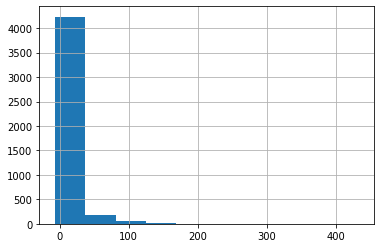

In [96]:
sub_df_answers['Score_x'].hist()

In [97]:
sub_df_answers['Score_x'].std()

23.973775770098378

In [98]:
sub_df_answers = sub_df_answers.loc[sub_df_answers['Score_x'] >= sub_df_answers['Score_x'].std()]

In [99]:
%%capture
sub_df_answers

In [ ]:
# func to parse and store the accepted answers
def execute_acc_ans_parsing(dir_path, start_idx, end_idx, answer_df):
  print(f"Processing \"{end_idx - start_idx}\" answers ...")
  
  if not os.path.exists(dir_path):
      os.mkdir(dir_path)
      time.sleep(5)

  local_user_df = answer_df.loc[:, ['PostId_y', 'Body_y']]

  local_dict = dict(zip(list(local_user_df['PostId_y'].astype(str)), list(local_user_df['Body_y'])))
  user_preprocessing.preproces_questions_into_tokens(local_dict)
  
  post_list = user_preprocessing.get_list_of_posts(local_dict)

  # parsing only the posts from start_idx to end_idx
  for key in tqdm.tqdm(post_list[start_idx:end_idx]):
          dpm.parse_section(local_dict[key], key, dpm.basic_pos_relations, dir_path)                     

Parsing the accepted answers

In [ ]:
# execute_acc_ans_parsing("D:\Skola\Skola-ing\DP\data\parsed_data\\acm_accepted_answers", 5, len(sub_df_answers), sub_df_answers)

## Model evaluation - jls8

### Loading the models

In [79]:
from parsing.model_evaluation import loading_models, metrics, ploting, model_processing_utils

In [80]:
sections_book_dict = loading_models.get_list_from_file(dir_path="D:/Skola/Skola-ing/DP/data/parsed_data/acm_books/jls8/acm_chapters", num_of_files_to_read="all")
user_dict = loading_models.get_user_dict_from_file(r"D:/Skola/Skola-ing/DP/data/parsed_data/acm_users/answers")
user_rep = loading_models.get_user_reputation_dict_from_file(r"D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\\reputation\user_reputation.txt")

100%|██████████| 181/181 [00:00<00:00, 185.99it/s]


In [81]:
len(user_dict)

173

Filtering out the values not contained in the z_user_score_list

In [82]:
z_user_score_dict1 = loading_models.get_q_a_dict_from_file("D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\z_scores\z_scores2.txt")
z_user_score_list = list(z_user_score_dict1.keys())
user_dict = { key : val for key, val in user_dict.items() if int(key.split("userId")[1]) in z_user_score_list}
z_user_score_dict1 = { key : val for key, val in z_user_score_dict1.items() if f"userId{key}" in list(user_dict.keys())}

In [83]:
# user_preprocessing.save_dict_to_file("D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\z_scores", "z_scores3.txt", z_user_score_dict1)

In [84]:
print(f"num of user models: {len(user_dict)}, num of user reps: {len(user_rep)}")

num of user models: 114, num of user reps: 13085


### Basic model testing #1

#### Phrases

Jaccard similarity

In [139]:
model_processing_utils.join_tuples_and_lemantize(user_dict)
model_processing_utils.join_tuples_and_lemantize(sections_book_dict)

merged_book = model_processing_utils.merge_models(sections_book_dict)

present_user_rep = { key : user_rep[key.split('userId')[1]] for key in user_dict.keys()}
len(present_user_rep)

114

In [86]:
len(merged_book)

10172

Calculating the metric score

In [87]:
phrases_overal_jacq_sim = { key : metrics.jaccard_similarity(merged_book, user_dict[key]) for key in user_dict.keys()}

In [88]:
%%capture
phrases_overal_jacq_sim

In [89]:
# normalizing the score 
# phrases_overal_jacq_sim = metrics.min_max_normalize(phrases_overal_jacq_sim)

In [90]:
phrases_overal_jacq_sim['userId1352']

2.70076

In [91]:
def calculate_file_size(dir_path):
    files = os.listdir(dir_path)
    files_size = sum(os.stat(os.path.join(dir_path, f)).st_size for f in files)
    return files_size


# using the dictionary create a dataframe and for each user/dir calculate the size of files, sort it and display the df
def get_sorted_file_list_by_size(metric_dict1, root_path):
    df = pd.DataFrame(list(metric_dict1.items()), columns=['UserID', 'Metric score'])
    df['file_size'] = df.apply(lambda x: calculate_file_size(os.path.join(root_path, str(x['UserID']))), axis=1)
    df = df.sort_values(by=['file_size'], ascending=False)
    return df
    

In [92]:
from parsing.model_evaluation.metrics import get_sorted_dicts, calculate_order_score, calculate_max_deviation, calculate_mean_deviation, calculate_total_deviation

In [93]:
expert_user = present_user_rep.pop('userId1352')
phrase_jacc_expert = phrases_overal_jacq_sim.pop('userId1352')

In [94]:
expert_user

95315

In [95]:
get_corr_coef = lambda user_expert, metric_expert: ((user_expert/95315)*100)/metric_expert

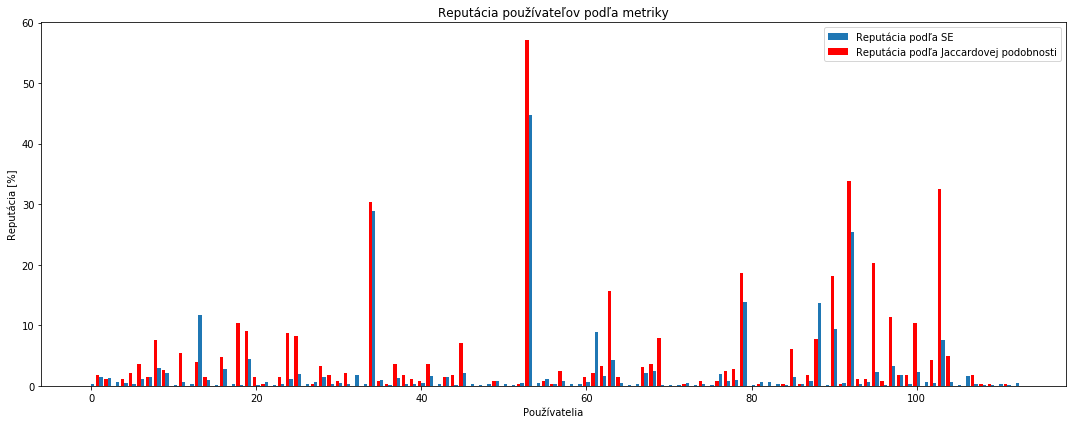

In [96]:
corr_coef = get_corr_coef(expert_user, phrase_jacc_expert)

scaled_user_rep = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : phrases_overal_jacq_sim[key]*corr_coef for key in phrases_overal_jacq_sim}

ploting.plot_vals(val_dict1=scaled_user_rep, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

In [97]:
import matplotlib.pyplot as plt

Graph without the scale coeficient for our metric

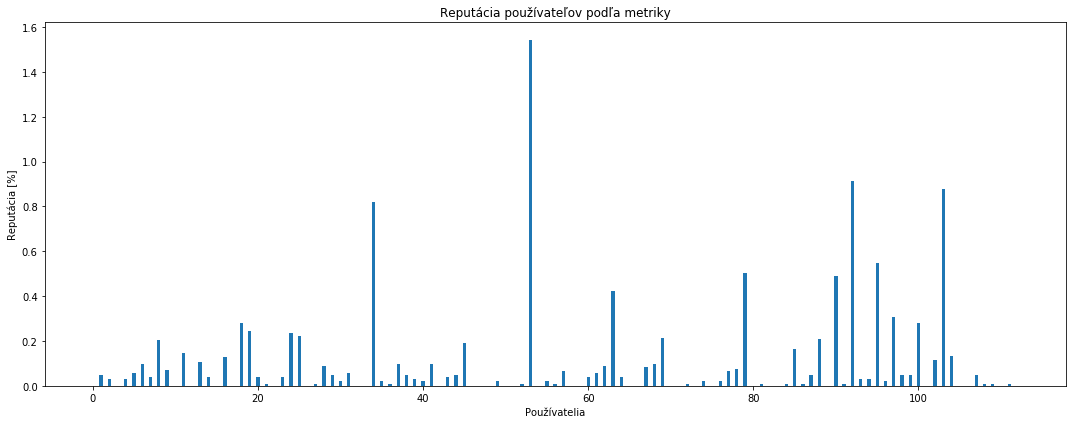

In [98]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.rcParams["figure.autolayout"] = True
  
labels = [str(i+1) for i in range(0, len(phrases_overal_jacq_sim.keys()))]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x, phrases_overal_jacq_sim.values(), width, label= "metric_name1", align="center")

ax.set_ylabel('Reputácia [%]')
ax.set_xlabel('Používatelia')
ax.set_title('Reputácia používateľov podľa metriky')

plt.show()

Graph for user reputation in %:

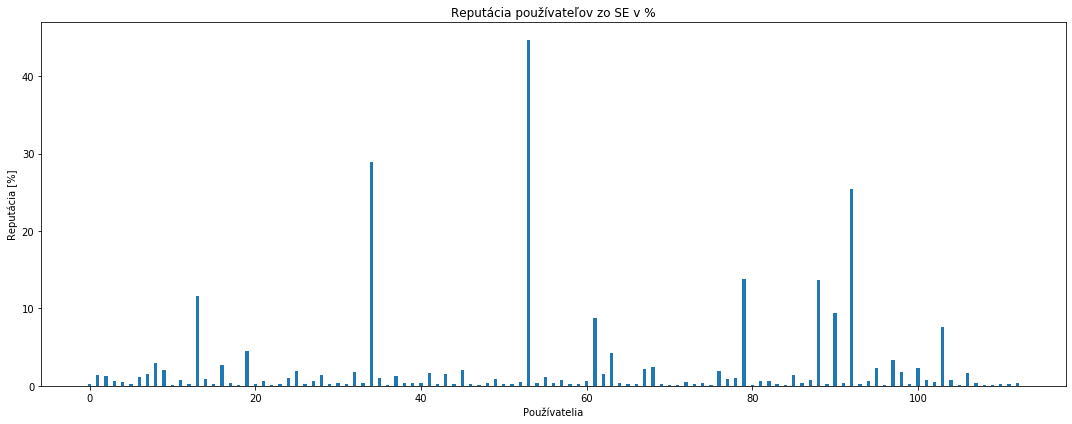

In [99]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.rcParams["figure.autolayout"] = True
  
labels = [str(i+1) for i in range(0, len(scaled_user_rep.keys()))]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x, scaled_user_rep.values(), width, label= "metric_name1", align="center")

ax.set_ylabel('Reputácia [%]')
ax.set_xlabel('Používatelia')
ax.set_title('Reputácia používateľov zo SE v %')

plt.show()

In [100]:
# list1 = ["ako sa","mas cas"]
# list2 = ["ako sa","mas cas", "1 2", "io op", "asas dff"]

# 1 /(1 + metrics.euclid_dis(list1, list2))

Evaluation of order score, max deviation order, mean deviation order, individual order and reputation differences

In [101]:
print(calculate_order_score(phrases_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_jacq_sim, present_user_rep, scale_coef=corr_coef))

User on correct position: 5
User on wrong position: 108
None
maximal deviation is: 97
97
mean deviation: 19.699115044247787
num of values bellow mean dev: 63
19.699115044247787
order deviation list is: [25, 21, 37, 27, 8, 97, 34, 5, 36, 33, 14, 40, 6, 8, 27, 0, 12, 13, 47, 79, 3, 46, 3, 23, 17, 2, 15, 31, 4, 48, 10, 14, 22, 19, 31, 41, 28, 32, 34, 21, 5, 28, 32, 6, 11, 40, 37, 10, 25, 2, 16, 35, 2, 20, 20, 2, 21, 14, 32, 21, 14, 60, 0, 37, 8, 29, 37, 25, 25, 1, 8, 19, 7, 13, 26, 6, 24, 11, 25, 20, 6, 13, 2, 15, 21, 24, 3, 0, 57, 18, 82, 41, 7, 2, 14, 13, 12, 6, 13, 8, 4, 3, 3, 2, 6, 30, 0, 18, 11, 2, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 25, 'userId48538': 21, 'userId24681': 37, 'userId92366': 27, 'userId282899': 8, 'userId146161': 97, 'userId97556': 34, 'userId125350': -5, 'userId94922': 36, 'userId61731': 33, 'userId54786': 14, 'userId77009': 40, 'userId173159': -6, 'userId48295': 8, 'userId98498': 27, 'userId315606': 0, 'userId6703': 12, 'u

In [102]:
metrics.jaccard_similarity(user_dict['userId3249'], merged_book)

1.5441

In [103]:
present_user_rep['userId3249']

42615

In [104]:
(present_user_rep['userId3249']/95315)*100

44.70964696007974

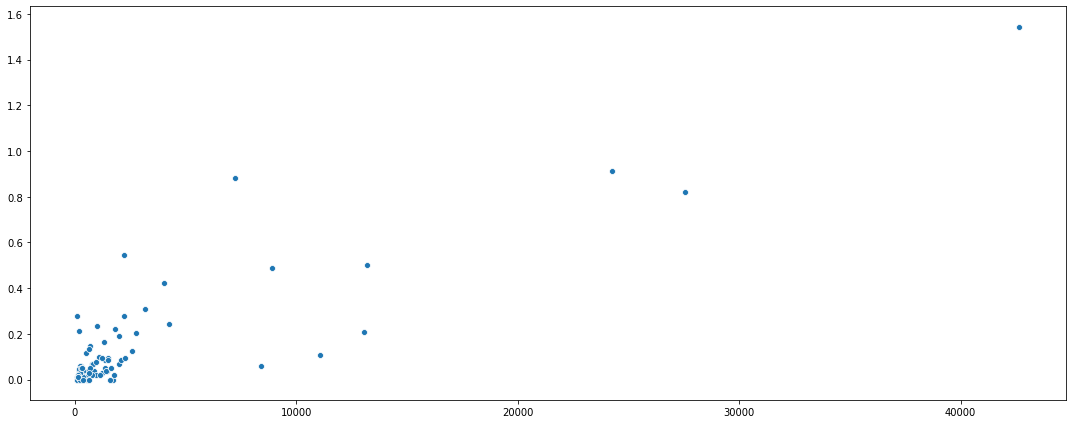

In [105]:
np_user_rep = np.array(list(present_user_rep.values()))
np_phrases_jacq_sim = np.array(list(phrases_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_phrases_jacq_sim)

In [106]:
my_rho = np.corrcoef(np_user_rep, np_phrases_jacq_sim)
print(my_rho[0][1])

0.8733385629227722


Checking if our model isnt biased by the size of user models

In [107]:
df = get_sorted_file_list_by_size(phrases_overal_jacq_sim, "D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\\answers")

In [108]:
df.head(20)

,UserID,Metric score,file_size
53,userId3249,1.54410,192201
92,userId7167,0.91237,110915
90,userId7080,0.48765,79009
34,userId2314,0.82183,70386
103,userId90992,0.87977,54876
79,userId5692,0.50197,51428
100,userId8500,0.27983,26354
88,userId66,0.20685,26119
97,userId79256,0.30895,25411
63,userId39690,0.42109,22454


Doesnt look like it - first 3 positions match but the rest not 

Cosine similarity

In [109]:
phrases_overal_cos_sim = metrics.get_cosine_sim(user_dict, merged_book)

In [110]:
phrases_overal_cos_sim.values()

dict_values([0.0, 0.45833, 0.6491, 0.0, 0.38725, 0.54999, 0.78632, 0.35332, 0.84715, 0.74411, 0.0, 1.16492, 0.0, 0.66499, 0.26208, 5.73254, 0.0, 1.13487, 0.0, 1.23939, 1.22205, 0.58476, 0.13019, 0.0, 0.49575, 1.09547, 0.90921, 0.0, 0.14948, 0.95126, 0.55777, 0.62709, 0.69156, 0.0, 0.0, 2.08419, 0.24788, 0.15877, 0.66848, 0.61491, 0.32455, 0.21637, 0.68915, 0.0, 0.49193, 0.37801, 1.2669, 0.0, 0.0, 0.0, 0.3889, 0.0, 0.0, 0.12492, 3.15918, 0.0, 0.45494, 0.40478, 0.59957, 0.0, 0.0, 0.35616, 0.48737, 0.62786, 1.62683, 1.25417, 0.0, 0.0, 0.45898, 0.5315, 1.71912, 0.0, 0.0, 0.275, 0.0, 0.28925, 0.0, 0.32601, 0.71209, 0.52417, 1.39794, 0.0, 0.7011, 0.0, 0.0, 0.2337, 1.5387, 0.14022, 0.46637, 0.73717, 0.0, 1.18621, 0.11936, 2.01731, 0.38401, 0.33898, 2.25665, 0.36205, 1.15156, 0.50336, 0.46432, 1.01117, 0.0, 1.01652, 2.43566, 0.90938, 0.0, 0.0, 0.75602, 0.24048, 0.163, 0.0, 0.18738, 0.0])

In [111]:
phrase_cos_expert = phrases_overal_cos_sim.pop('userId1352')

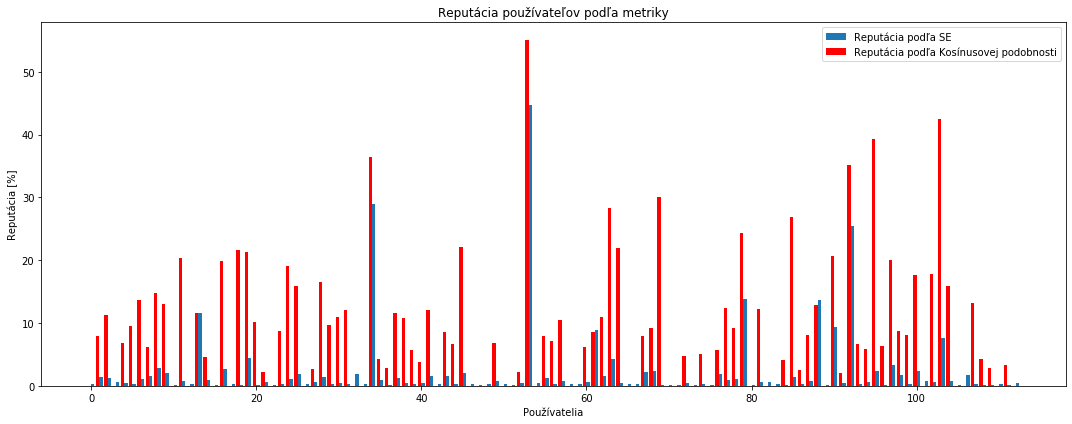

In [112]:
# normalizing the score 
# phrases_overal_cos_sim = metrics.min_max_normalize(phrases_overal_cos_sim)

# corr_coef2 = ((expert_user/95315) * 100)/phrase_cos_expert
corr_coef2 = get_corr_coef(expert_user, phrase_cos_expert)

scaled_user_rep2 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : phrases_overal_cos_sim[key]*corr_coef2 for key in phrases_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep2, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

In [113]:
phrases_overal_cos_sim['userId3249']*corr_coef2

55.10960237521239

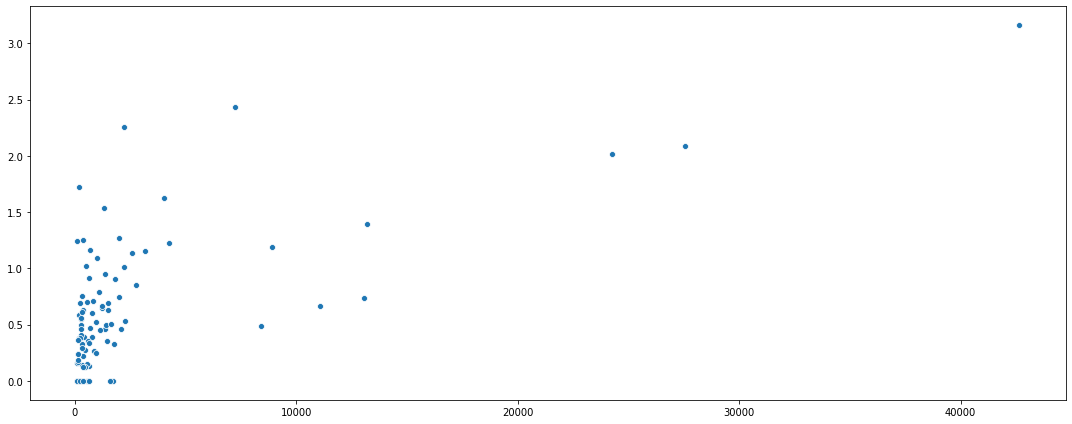

In [114]:
np_cos_sim = np.array(list(phrases_overal_cos_sim.values()))
sb.scatterplot(np_user_rep, np_cos_sim)

In [115]:
my_rho = np.corrcoef(np_user_rep, np_cos_sim)
print(my_rho)

[[1.         0.65588313]
 [0.65588313 1.        ]]


In [116]:
print(calculate_order_score(phrases_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_cos_sim, present_user_rep, corr_coef2))

User on correct position: 3
User on wrong position: 110
None
maximal deviation is: 96
96
mean deviation: 21.663716814159294
num of values bellow mean dev: 63
21.663716814159294
order deviation list is: [25, 21, 37, 27, 8, 96, 34, 5, 36, 34, 14, 43, 6, 8, 27, 0, 12, 13, 55, 88, 3, 34, 3, 23, 17, 2, 15, 29, 4, 53, 10, 14, 22, 19, 31, 36, 31, 26, 34, 21, 19, 28, 45, 5, 5, 40, 37, 10, 27, 7, 52, 35, 24, 20, 20, 2, 21, 10, 36, 21, 23, 60, 9, 37, 13, 29, 37, 24, 30, 5, 4, 13, 12, 27, 29, 6, 19, 11, 18, 1, 0, 24, 10, 22, 18, 33, 9, 6, 57, 21, 82, 41, 2, 10, 8, 33, 14, 4, 28, 3, 11, 4, 4, 3, 7, 40, 7, 28, 23, 5, 2, 2, 0]
******************************
order deviation dict is: {'userId57681': 25, 'userId48538': 21, 'userId24681': 37, 'userId92366': 27, 'userId282899': 8, 'userId146161': 96, 'userId97556': 34, 'userId125350': -5, 'userId94922': 36, 'userId61731': 34, 'userId54786': 14, 'userId77009': 43, 'userId173159': -6, 'userId48295': 8, 'userId98498': 27, 'userId315606': 0, 'userId6703': 12

Euclidean distance

In [117]:
phrases_overal_euclid_sim = metrics.get_euclid_dis(user_dict, merged_book)

In [118]:
# normalizing the score 
# phrases_overal_euclid_sim = metrics.min_max_normalize(phrases_overal_euclid_sim)

In [119]:
phrase_euclid_expert = phrases_overal_euclid_sim.pop('userId1352')

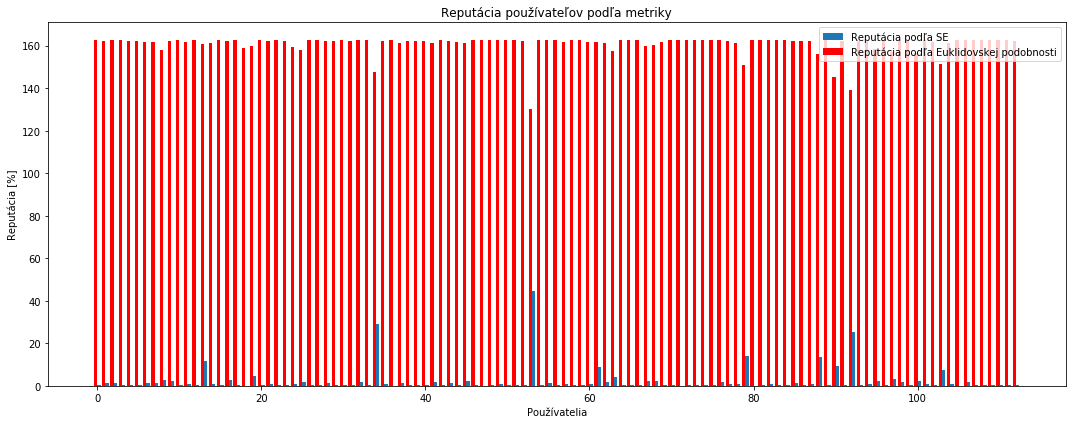

In [120]:
# corr_coef3 = ((expert_user/95315)*100) / phrase_euclid_expert
corr_coef3 = get_corr_coef(expert_user, phrase_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : phrases_overal_euclid_sim[key]*corr_coef3 for key in phrases_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

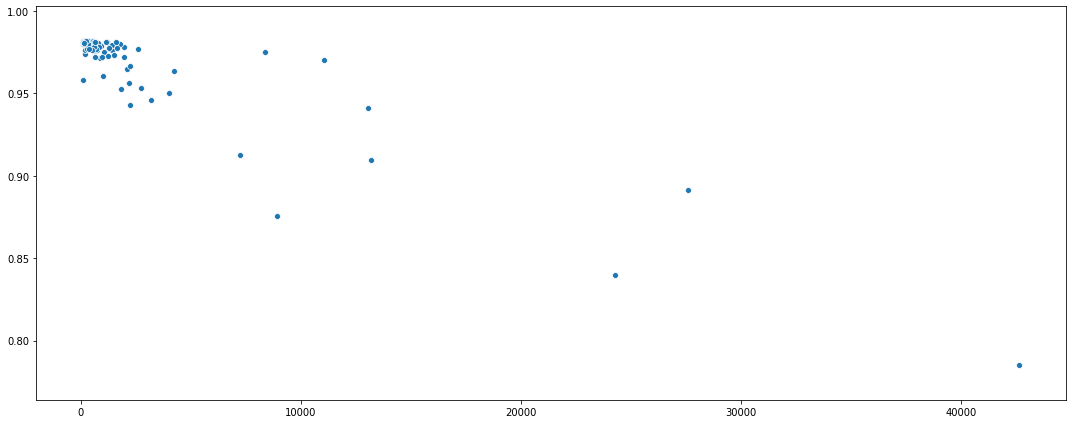

In [121]:
np_euclidean_sim = np.array(list(phrases_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_euclidean_sim)

In [122]:
my_rho = np.corrcoef(np_user_rep, np_euclidean_sim)
print(my_rho)

[[ 1.         -0.91142075]
 [-0.91142075  1.        ]]


In [123]:
phrases_overal_euclid_sim['userId3249']*corr_coef3

130.19624298438336

In [124]:
((present_user_rep['userId3249']/expert_user)*100)

44.70964696007974

In [125]:
print(calculate_order_score(phrases_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_euclid_sim, present_user_rep, corr_coef3))

User on correct position: 1
User on wrong position: 112
None
maximal deviation is: 112
112
mean deviation: 50.83185840707964
num of values bellow mean dev: 56
50.83185840707964
order deviation list is: [107, 99, 65, 76, 105, 8, 63, 98, 80, 74, 71, 64, 84, 98, 62, 74, 87, 78, 48, 13, 73, 5, 69, 61, 66, 72, 76, 31, 76, 22, 40, 42, 30, 53, 60, 1, 20, 0, 11, 69, 66, 33, 30, 20, 1, 35, 15, 13, 9, 5, 60, 14, 49, 13, 4, 4, 4, 35, 24, 5, 52, 17, 29, 19, 17, 10, 32, 45, 39, 30, 40, 6, 29, 54, 21, 55, 62, 50, 9, 6, 57, 39, 34, 48, 30, 54, 61, 63, 11, 48, 22, 20, 82, 72, 48, 79, 84, 90, 81, 61, 89, 93, 93, 88, 99, 77, 104, 89, 102, 105, 109, 108, 112]
******************************
order deviation dict is: {'userId57681': 107, 'userId48538': 99, 'userId24681': 65, 'userId92366': 76, 'userId282899': 105, 'userId146161': 8, 'userId97556': 63, 'userId125350': 98, 'userId94922': 80, 'userId61731': 74, 'userId54786': 71, 'userId77009': 64, 'userId173159': 84, 'userId48295': 98, 'userId98498': 62, 'use

Combined metrics

In [126]:
combined = {key : phrases_overal_jacq_sim[key] * phrases_overal_cos_sim[key] * phrases_overal_euclid_sim[key] for key in phrases_overal_jacq_sim.keys()}

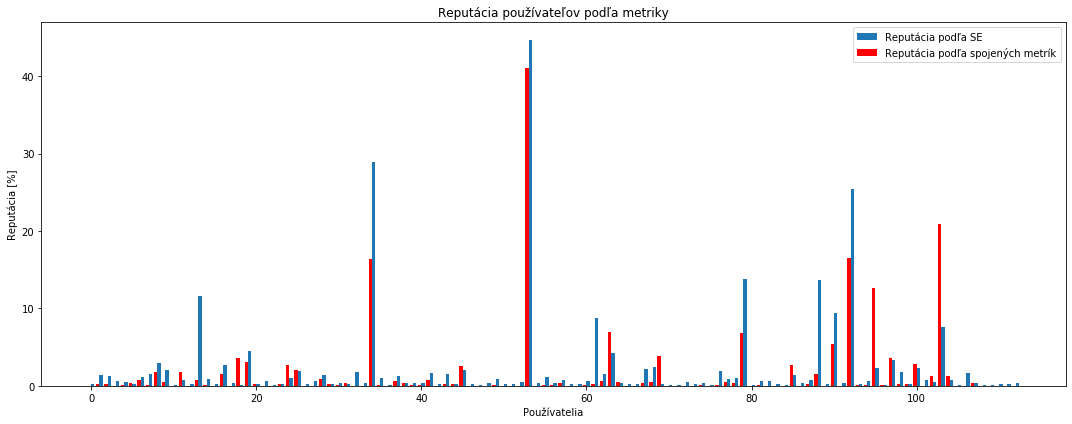

In [127]:
phrase_combined_expert = phrase_euclid_expert * phrase_cos_expert * phrase_jacc_expert

# corr_coef3 = ((expert_user/95315)*100)/phrase_combined_expert
corr_coef3 = get_corr_coef(expert_user, phrase_combined_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_combined_rep = {key : combined[key]*corr_coef3 for key in combined}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_combined_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa spojených metrík")

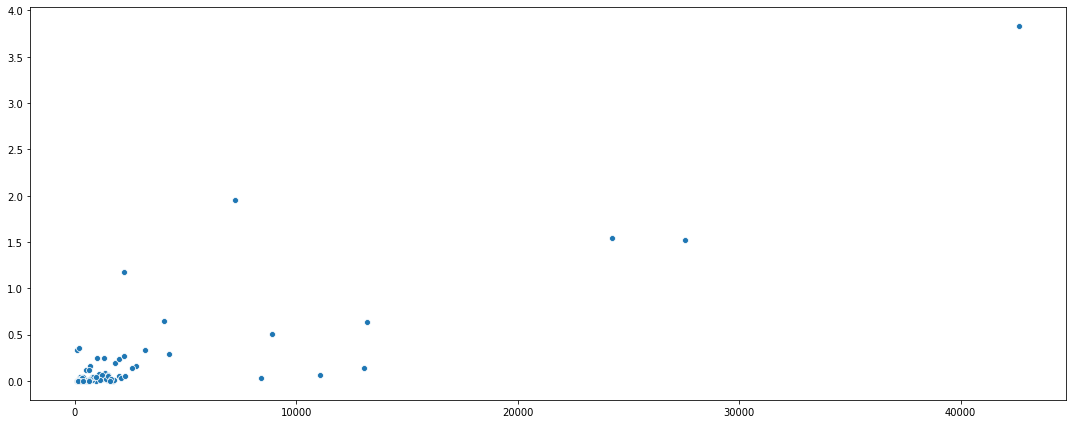

In [128]:
np_combined_sim = np.array(list(combined.values()))

sb.scatterplot(np_user_rep, np_combined_sim)

In [129]:
my_rho = np.corrcoef(np_user_rep, np_combined_sim)
print(my_rho)

[[1.         0.86304642]
 [0.86304642 1.        ]]


In [130]:
print(calculate_order_score(combined, present_user_rep))
print(calculate_max_deviation(combined, present_user_rep))
print(calculate_mean_deviation(combined, present_user_rep))
print(calculate_total_deviation(combined, present_user_rep, corr_coef3))

User on correct position: 3
User on wrong position: 110
None
maximal deviation is: 97
97
mean deviation: 20.088495575221238
num of values bellow mean dev: 66
20.088495575221238
order deviation list is: [25, 21, 37, 27, 8, 97, 34, 5, 35, 33, 14, 40, 6, 8, 27, 0, 12, 13, 51, 85, 3, 41, 3, 23, 17, 2, 15, 30, 4, 49, 10, 14, 22, 19, 31, 39, 29, 30, 33, 21, 5, 28, 33, 5, 10, 40, 37, 10, 25, 3, 31, 35, 7, 20, 20, 3, 21, 13, 32, 21, 10, 60, 1, 37, 9, 29, 37, 24, 27, 1, 9, 19, 8, 17, 27, 2, 22, 11, 25, 16, 5, 18, 7, 17, 20, 25, 2, 1, 57, 19, 82, 42, 4, 4, 11, 19, 12, 3, 16, 7, 6, 2, 5, 2, 7, 33, 1, 20, 15, 3, 0, 2, 0]
******************************
order deviation dict is: {'userId57681': 25, 'userId48538': 21, 'userId24681': 37, 'userId92366': 27, 'userId282899': 8, 'userId146161': 97, 'userId97556': 34, 'userId125350': -5, 'userId94922': 35, 'userId61731': 33, 'userId54786': 14, 'userId77009': 40, 'userId173159': -6, 'userId48295': 8, 'userId98498': 27, 'userId315606': 0, 'userId6703': 12, 'u

#### Words

In [140]:
user_dict_words = model_processing_utils.join_phrases_into_words(user_dict, "users")
merged_book = model_processing_utils.join_phrases_into_words(merged_book)

100%|██████████| 114/114 [00:01<00:00, 59.59it/s]


In [141]:
len(user_dict_words['userId11200'])

252

In [142]:
len(merged_book)

20344

Jaccard similarity

In [143]:
words_overal_jacq_sim = { key : metrics.jaccard_similarity(merged_book, user_dict_words[key]) for key in user_dict_words.keys()}

In [144]:
words_overal_jacq_sim['userId1352']

2.37444

In [136]:
words_jacc_expert = words_overal_jacq_sim.pop('userId1352')

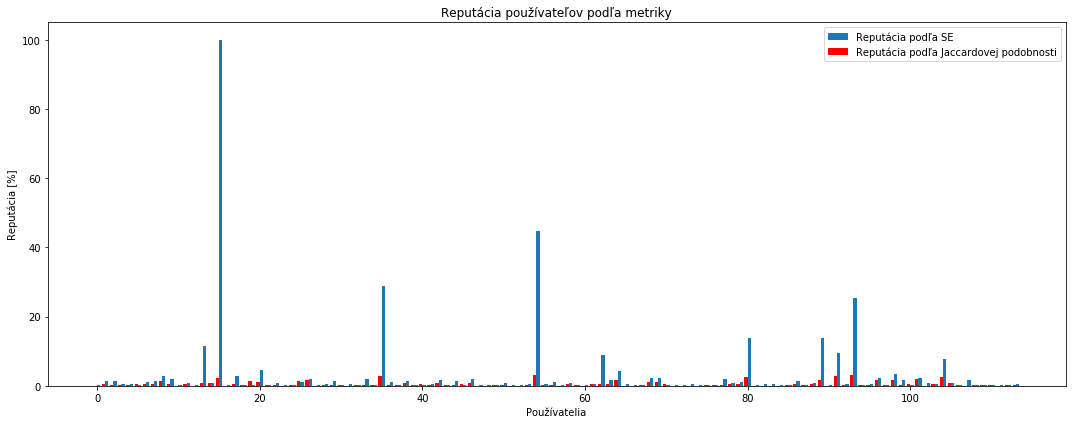

In [145]:
# corr_coef = ((expert_user/95315) * 100) / words_jacc_expert
corr_coef = get_corr_coef(expert_user, words_jacc_expert)

scaled_user_rep = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : words_overal_jacq_sim[key]*corr_coef for key in words_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

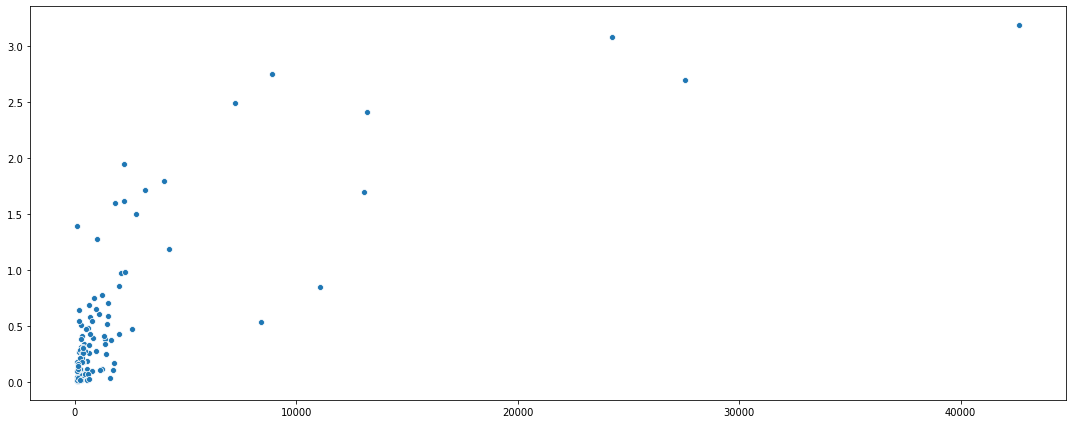

In [61]:
np_words_jacq_sim = np.array(list(words_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_words_jacq_sim)

In [62]:
my_rho = np.corrcoef(np_user_rep, np_words_jacq_sim)
print(my_rho)

[[1.         0.76009036]
 [0.76009036 1.        ]]


In [63]:
print(calculate_order_score(words_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(words_overal_jacq_sim, present_user_rep, corr_coef))

User on correct position: 4
User on wrong position: 109
None
maximal deviation is: 94
94
mean deviation: 18.300884955752213
num of values bellow mean dev: 69
18.300884955752213
order deviation list is: [7, 11, 45, 25, 4, 94, 35, 1, 31, 23, 19, 31, 1, 12, 26, 11, 5, 2, 39, 68, 4, 62, 2, 1, 8, 17, 21, 24, 25, 32, 6, 3, 11, 8, 19, 44, 28, 33, 20, 37, 26, 10, 6, 2, 29, 18, 6, 3, 7, 14, 32, 5, 35, 9, 0, 11, 4, 34, 18, 10, 56, 23, 16, 42, 1, 9, 57, 22, 16, 6, 12, 41, 1, 18, 15, 13, 22, 9, 43, 42, 12, 9, 15, 14, 31, 5, 1, 3, 78, 21, 57, 47, 9, 1, 20, 0, 6, 9, 2, 22, 0, 3, 3, 6, 4, 24, 4, 14, 5, 2, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 7, 'userId48538': 11, 'userId24681': 45, 'userId92366': 25, 'userId282899': -4, 'userId146161': 94, 'userId97556': 35, 'userId125350': -1, 'userId94922': 31, 'userId61731': 23, 'userId54786': 19, 'userId77009': 31, 'userId173159': 1, 'userId48295': -12, 'userId98498': 26, 'userId315606': 11, 'userId6703': -5, 'userId139

Cosine similarity

In [64]:
words_overal_cos_sim = metrics.get_cosine_sim(user_dict_words, merged_book)

In [65]:
words_cos_expert = words_overal_cos_sim.pop('userId1352')

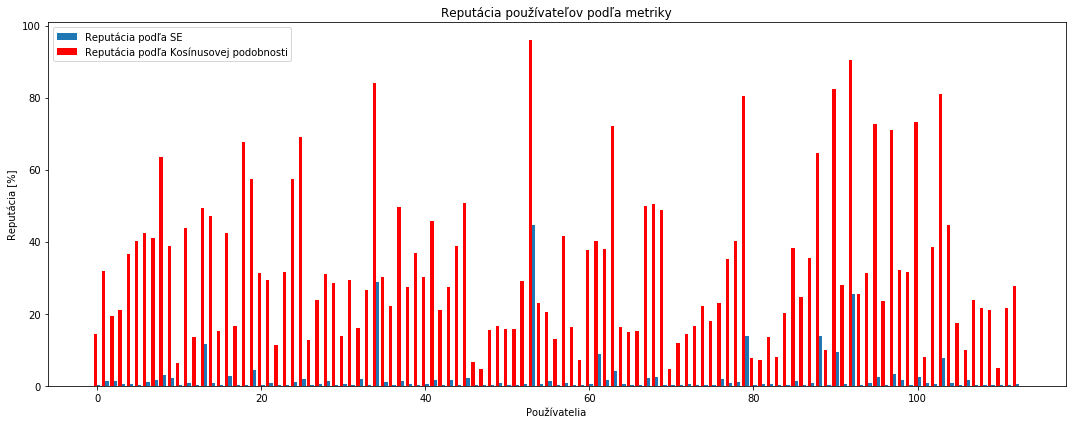

In [66]:
# corr_coef2 = ((expert_user/95315)*100) / words_cos_expert
corr_coef2 = get_corr_coef(expert_user, words_cos_expert)

scaled_user_rep2 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : words_overal_cos_sim[key]*corr_coef2 for key in words_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep2, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

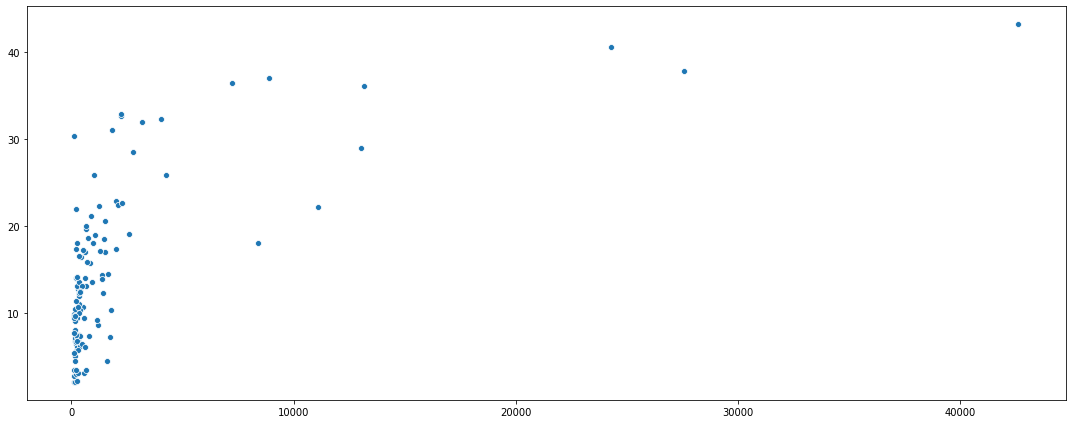

In [67]:
np_words_cos_sim = np.array(list(words_overal_cos_sim.values()))

sb.scatterplot(np_user_rep, np_words_cos_sim)

In [68]:
my_rho = np.corrcoef(np_user_rep, np_words_cos_sim)
print(my_rho)

[[1.         0.63553721]
 [0.63553721 1.        ]]


In [69]:
print(calculate_order_score(words_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(words_overal_cos_sim, present_user_rep, corr_coef2))

User on correct position: 2
User on wrong position: 111
None
maximal deviation is: 96
96
mean deviation: 18.47787610619469
num of values bellow mean dev: 69
18.47787610619469
order deviation list is: [7, 12, 41, 30, 4, 96, 34, 4, 33, 27, 24, 36, 0, 12, 28, 11, 6, 5, 46, 72, 11, 57, 1, 4, 10, 17, 22, 24, 26, 31, 7, 3, 7, 8, 17, 46, 30, 30, 19, 34, 25, 17, 7, 1, 29, 13, 6, 3, 6, 13, 21, 6, 34, 2, 2, 17, 2, 37, 19, 11, 54, 23, 12, 47, 1, 6, 57, 21, 19, 2, 14, 41, 2, 17, 13, 7, 21, 8, 41, 44, 13, 5, 19, 15, 31, 2, 11, 2, 77, 20, 63, 45, 10, 3, 15, 1, 9, 9, 3, 13, 1, 2, 2, 5, 4, 25, 3, 15, 8, 2, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 7, 'userId48538': 12, 'userId24681': 41, 'userId92366': 30, 'userId282899': -4, 'userId146161': 96, 'userId97556': 34, 'userId125350': -4, 'userId94922': 33, 'userId61731': 27, 'userId54786': 24, 'userId77009': 36, 'userId173159': 0, 'userId48295': -12, 'userId98498': 28, 'userId315606': 11, 'userId6703': -6, 'userId139

Euclidean distance

In [70]:
words_overal_euclid_sim = metrics.get_euclid_dis(user_dict_words, merged_book)

In [71]:
words_euclid_expert = words_overal_euclid_sim.pop('userId1352')

In [72]:
words_euclid_expert

1.6046512068907572

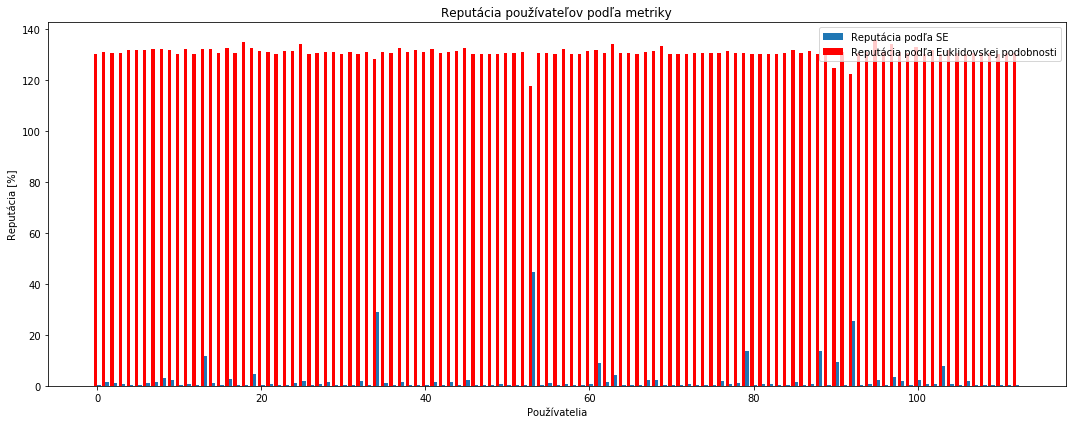

In [73]:
# corr_coef3 = ((expert_user/95315)*100) / words_euclid_expert
corr_coef3 = get_corr_coef(expert_user, words_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : words_overal_euclid_sim[key]*corr_coef3 for key in words_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

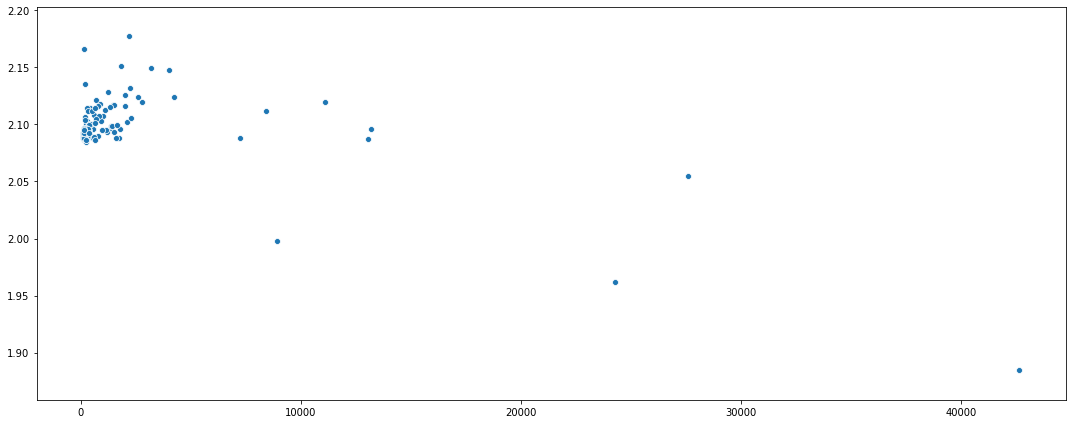

In [74]:
np_words_euclid_sim = np.array(list(words_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_words_euclid_sim)

In [75]:
my_rho = np.corrcoef(np_user_rep, np_words_euclid_sim)
print(my_rho)

[[ 1.        -0.6726142]
 [-0.6726142  1.       ]]


In [76]:
print(calculate_order_score(words_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(words_overal_euclid_sim, present_user_rep, corr_coef3))

User on correct position: 4
User on wrong position: 109
None
maximal deviation is: 112
112
mean deviation: 27.398230088495577
num of values bellow mean dev: 73
27.398230088495577
order deviation list is: [16, 24, 38, 35, 6, 106, 37, 1, 52, 43, 35, 52, 10, 1, 40, 22, 4, 17, 64, 88, 22, 58, 11, 3, 0, 18, 17, 34, 23, 42, 26, 12, 0, 3, 4, 57, 42, 16, 29, 24, 12, 30, 17, 1, 42, 10, 18, 2, 17, 24, 9, 3, 21, 14, 15, 36, 16, 28, 30, 3, 43, 6, 23, 40, 10, 11, 58, 23, 33, 11, 25, 44, 12, 25, 3, 24, 7, 12, 28, 33, 25, 12, 16, 21, 16, 11, 39, 10, 67, 19, 76, 34, 18, 11, 0, 20, 16, 9, 17, 3, 1, 8, 6, 0, 86, 18, 104, 7, 95, 51, 109, 108, 112]
******************************
order deviation dict is: {'userId57681': 16, 'userId48538': 24, 'userId24681': 38, 'userId92366': 35, 'userId282899': 6, 'userId146161': 106, 'userId97556': 37, 'userId125350': -1, 'userId94922': 52, 'userId61731': 43, 'userId54786': 35, 'userId77009': 52, 'userId173159': 10, 'userId48295': -1, 'userId98498': 40, 'userId315606': 2

Combined

In [77]:
combined_words = {key : words_overal_jacq_sim[key] * words_overal_cos_sim[key] * words_overal_euclid_sim[key] for key in words_overal_jacq_sim.keys()}

In [78]:
words_combined_expert = words_cos_expert * words_euclid_expert * words_jacc_expert

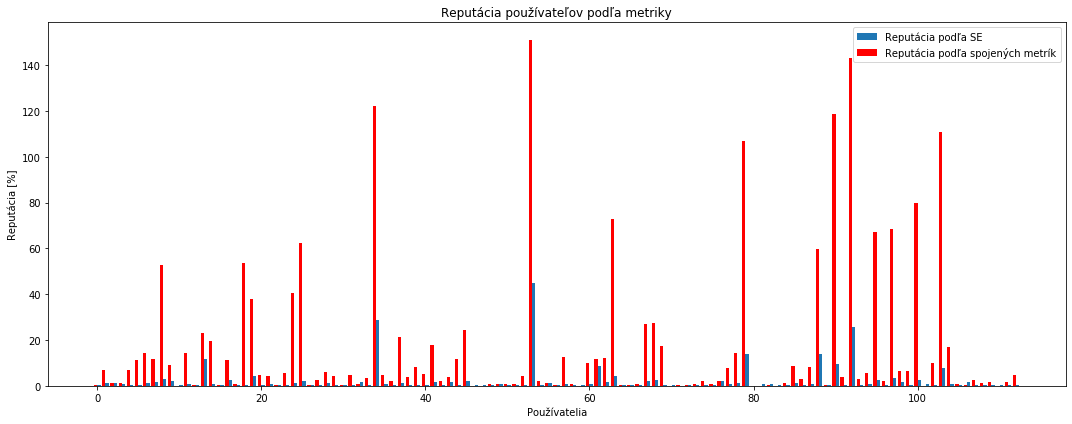

In [79]:
# corr_coef3 = ((expert_user/95315)*100) / words_combined_expert
corr_coef3 = get_corr_coef(expert_user, words_combined_expert)


scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_combined_rep = {key : combined_words[key]*corr_coef3 for key in combined_words}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_combined_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa spojených metrík")

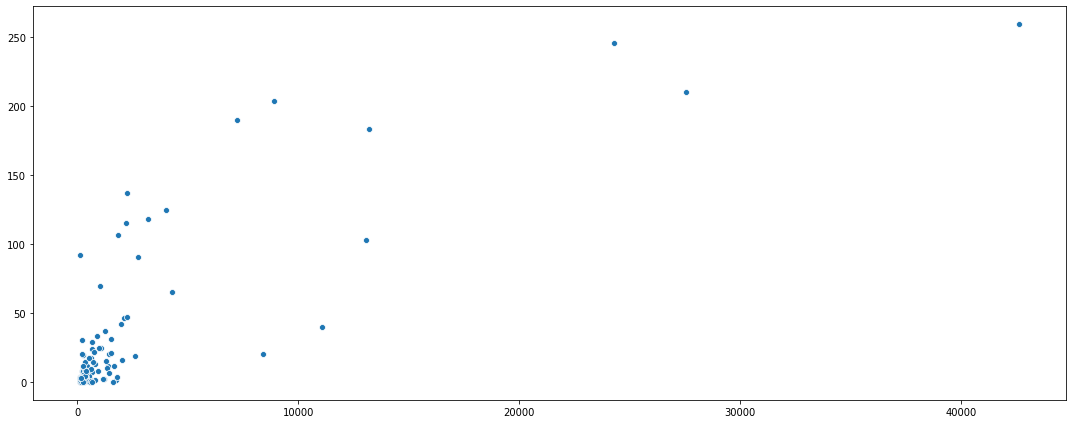

In [80]:
np_words_combined_sim = np.array(list(combined_words.values()))

sb.scatterplot(np_user_rep, np_words_combined_sim)

In [81]:
my_rho = np.corrcoef(np_user_rep, np_words_combined_sim)
print(my_rho)

[[1.         0.80048667]
 [0.80048667 1.        ]]


In [82]:
print(calculate_order_score(combined_words, present_user_rep))
print(calculate_max_deviation(combined_words, present_user_rep))
print(calculate_mean_deviation(combined_words, present_user_rep))
print(calculate_total_deviation(combined_words, present_user_rep, corr_coef3))

User on correct position: 2
User on wrong position: 111
None
maximal deviation is: 95
95
mean deviation: 18.23008849557522
num of values bellow mean dev: 69
18.23008849557522
order deviation list is: [7, 11, 43, 26, 4, 95, 35, 2, 31, 26, 21, 32, 1, 12, 26, 11, 5, 1, 41, 70, 4, 59, 2, 1, 8, 17, 20, 24, 26, 31, 2, 3, 10, 8, 19, 44, 28, 30, 19, 36, 26, 13, 6, 3, 29, 18, 6, 3, 6, 14, 29, 4, 35, 8, 1, 15, 2, 34, 18, 10, 56, 23, 15, 44, 1, 9, 57, 21, 17, 3, 14, 41, 1, 18, 12, 12, 22, 9, 41, 43, 12, 7, 16, 14, 31, 3, 3, 3, 78, 21, 57, 47, 10, 1, 19, 0, 7, 9, 2, 21, 1, 3, 3, 6, 4, 24, 3, 14, 7, 2, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 7, 'userId48538': 11, 'userId24681': 43, 'userId92366': 26, 'userId282899': -4, 'userId146161': 95, 'userId97556': 35, 'userId125350': -2, 'userId94922': 31, 'userId61731': 26, 'userId54786': 21, 'userId77009': 32, 'userId173159': 1, 'userId48295': -12, 'userId98498': 26, 'userId315606': 11, 'userId6703': -5, 'userId1393

### Enriched model (accepted answers) testing #2

In [83]:
acc_ans_dict = loading_models.get_list_from_file(dir_path="D:\Skola\Skola-ing\DP\data\parsed_data\\acm_accepted_answers", num_of_files_to_read=453)
model_processing_utils.join_tuples_and_lemantize(acc_ans_dict)
merged_book = model_processing_utils.merge_models(sections_book_dict)
merged_answers = model_processing_utils.merge_models(acc_ans_dict)

100%|██████████| 453/453 [00:00<00:00, 453790.23it/s]


In [84]:
len(merged_answers)

8760

In [85]:
len(merged_book)

10172

In [86]:
enriched_merged_book = model_processing_utils.merge_into_existing_model(merged_book, merged_answers)

In [87]:
len(enriched_merged_book)

18570

#### Phrases

Jaccard similarity

In [88]:
phrases_overal_jacq_sim = { key : metrics.jaccard_similarity(enriched_merged_book, user_dict[key]) for key in user_dict.keys()}

In [89]:
phrases_overal_jacq_sim['userId3249']

2.88908

In [90]:
phrases_jacc_expert = phrases_overal_jacq_sim.pop('userId1352')

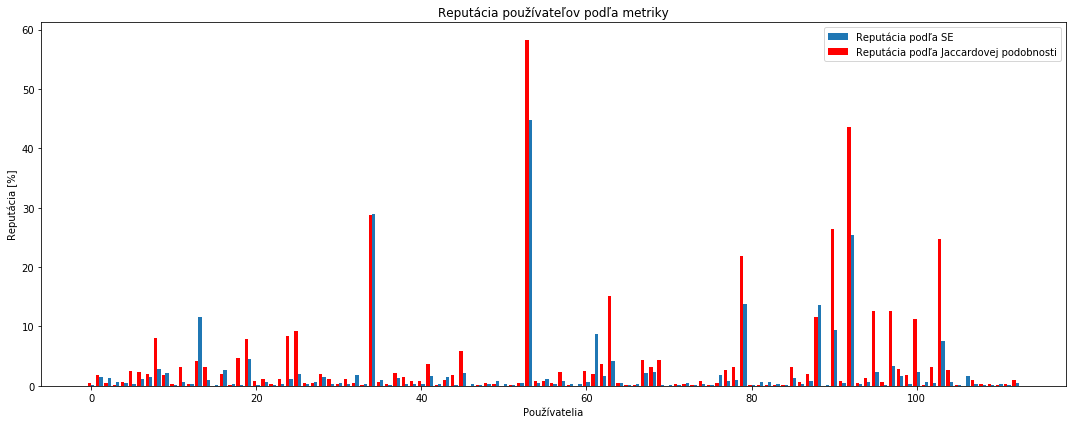

In [91]:
# corr_coef = ((expert_user/95315)*100) / phrases_jacc_expert
corr_coef = get_corr_coef(expert_user, phrases_jacc_expert)

scaled_user_rep = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : phrases_overal_jacq_sim[key]*corr_coef for key in phrases_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

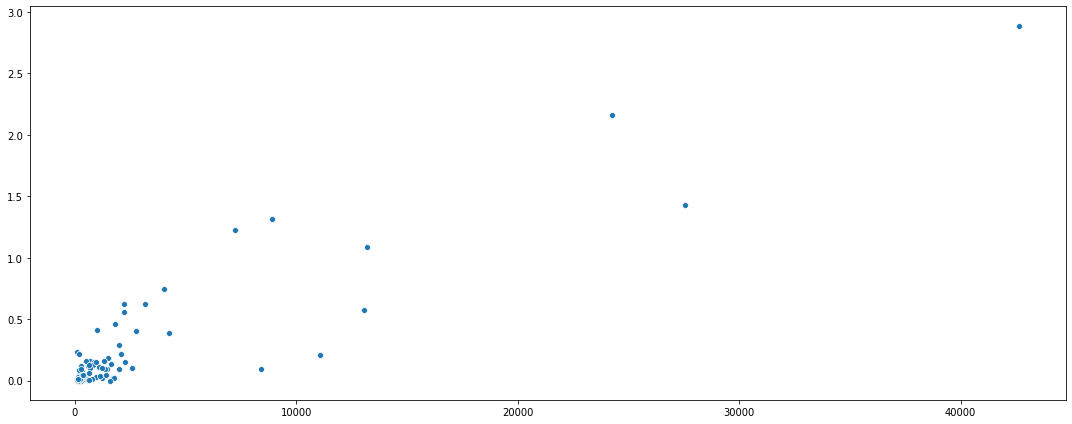

In [92]:
np_user_rep = np.array(list(present_user_rep.values()))
np_phrases_jacq_sim = np.array(list(phrases_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_phrases_jacq_sim)

In [93]:
my_rho = np.corrcoef(np_user_rep, np_phrases_jacq_sim)
print(my_rho)

[[1.         0.90831082]
 [0.90831082 1.        ]]


In [94]:
print(calculate_order_score(phrases_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_jacq_sim, present_user_rep, corr_coef))

User on correct position: 3
User on wrong position: 110
None
maximal deviation is: 91
91
mean deviation: 18.336283185840706
num of values bellow mean dev: 68
18.336283185840706
order deviation list is: [22, 34, 24, 10, 5, 91, 21, 24, 22, 12, 10, 40, 21, 9, 14, 1, 11, 17, 36, 75, 1, 47, 4, 23, 17, 1, 25, 10, 3, 34, 20, 14, 17, 31, 2, 46, 28, 33, 24, 36, 2, 4, 19, 10, 8, 37, 32, 3, 19, 7, 3, 7, 18, 6, 3, 6, 13, 21, 31, 15, 37, 54, 18, 52, 2, 0, 54, 15, 20, 7, 9, 42, 11, 13, 26, 12, 24, 1, 23, 39, 3, 9, 8, 14, 24, 12, 6, 4, 82, 5, 52, 52, 9, 4, 23, 0, 9, 5, 13, 24, 1, 3, 4, 5, 4, 33, 3, 14, 5, 2, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 22, 'userId48538': 34, 'userId24681': 24, 'userId92366': 10, 'userId282899': 5, 'userId146161': 91, 'userId97556': 21, 'userId125350': 24, 'userId94922': 22, 'userId61731': 12, 'userId54786': 10, 'userId77009': 40, 'userId173159': 21, 'userId48295': -9, 'userId98498': 14, 'userId315606': 1, 'userId6703': -11, 'userId

Cosine similarity

In [95]:
phrases_overal_cos_sim = metrics.get_cosine_sim(user_dict, enriched_merged_book)

In [96]:
phrases_cos_expert = phrases_overal_cos_sim.pop('userId1352')

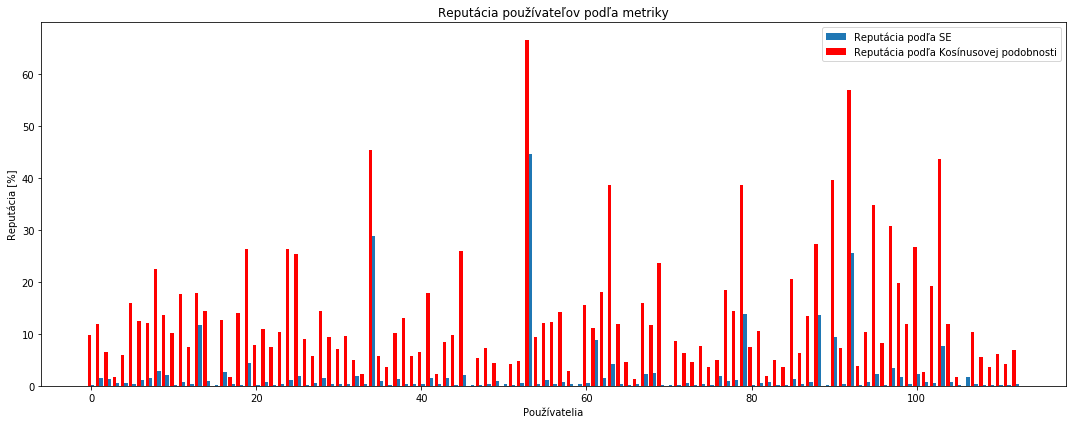

In [97]:
# corr_coef2 = ((expert_user/95315)*100) / phrases_cos_expert
corr_coef2 = get_corr_coef(expert_user, phrases_cos_expert)

scaled_user_rep2 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : phrases_overal_cos_sim[key]*corr_coef2 for key in phrases_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep2, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

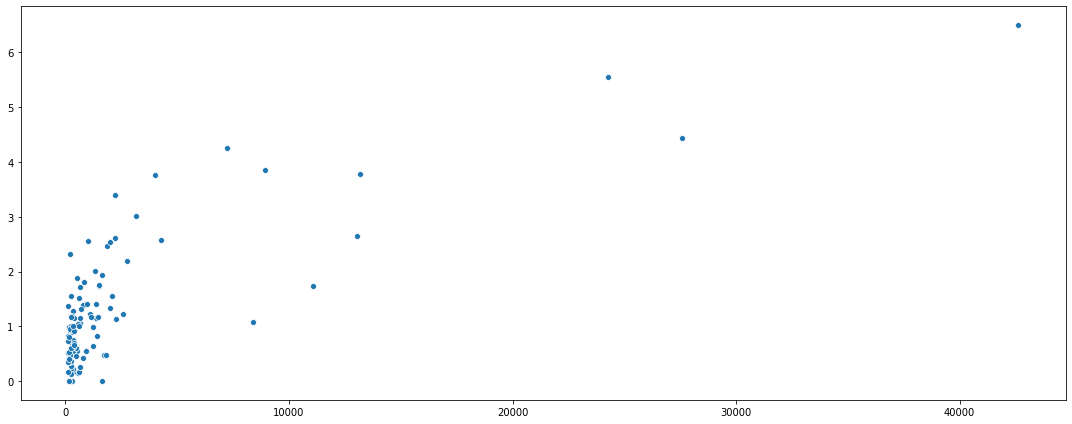

In [98]:
np_cos_sim = np.array(list(phrases_overal_cos_sim.values()))
sb.scatterplot(np_user_rep, np_cos_sim)

In [99]:
my_rho = np.corrcoef(np_user_rep, np_cos_sim)
print(my_rho)

[[1.         0.76796421]
 [0.76796421 1.        ]]


In [100]:
print(calculate_order_score(phrases_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_cos_sim, present_user_rep, corr_coef2))

User on correct position: 2
User on wrong position: 111
None
maximal deviation is: 82
82
mean deviation: 20.4070796460177
num of values bellow mean dev: 70
20.4070796460177
order deviation list is: [47, 51, 16, 6, 26, 75, 13, 52, 23, 8, 6, 39, 34, 9, 8, 6, 11, 17, 31, 78, 5, 37, 2, 34, 29, 4, 25, 7, 8, 27, 23, 16, 19, 31, 11, 52, 27, 34, 16, 36, 34, 2, 20, 5, 10, 35, 34, 9, 29, 9, 20, 4, 10, 12, 10, 20, 30, 20, 35, 26, 4, 53, 23, 52, 3, 0, 52, 2, 20, 9, 11, 48, 20, 9, 42, 8, 24, 2, 5, 40, 20, 14, 2, 15, 33, 13, 5, 2, 82, 5, 62, 64, 6, 6, 15, 9, 9, 5, 31, 23, 4, 3, 4, 2, 5, 39, 2, 17, 5, 2, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 47, 'userId48538': 51, 'userId24681': 16, 'userId92366': 6, 'userId282899': 26, 'userId146161': 75, 'userId97556': 13, 'userId125350': 52, 'userId94922': 23, 'userId61731': 8, 'userId54786': 6, 'userId77009': 39, 'userId173159': 34, 'userId48295': -9, 'userId98498': 8, 'userId315606': 6, 'userId6703': -11, 'userId13937':

Euclidean distance

In [101]:
phrases_overal_euclid_sim = metrics.get_euclid_dis(user_dict, enriched_merged_book)

In [102]:
# normalizing the score 
# phrases_overal_euclid_sim = metrics.min_max_normalize(phrases_overal_euclid_sim)

phrases_euclid_expert = phrases_overal_euclid_sim.pop('userId1352')

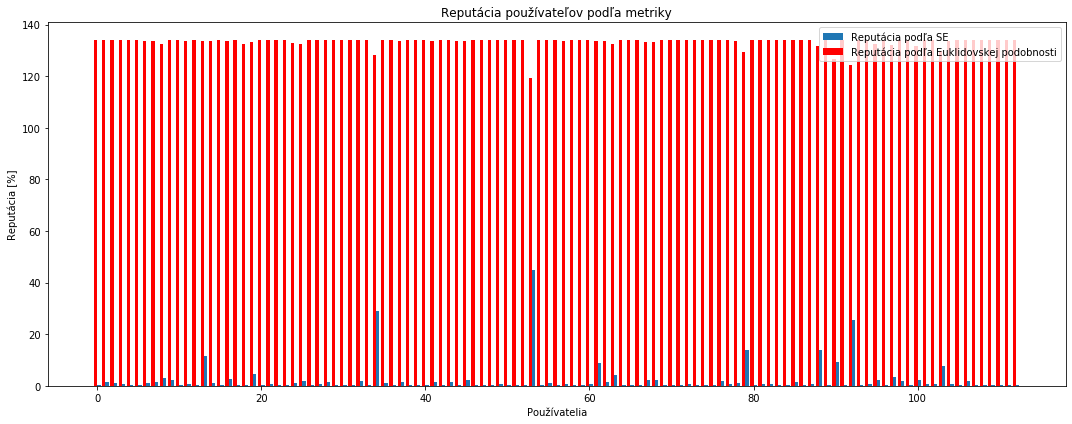

In [103]:
# corr_coef3 = ((expert_user/95315)*100) / phrases_euclid_expert
corr_coef3 = get_corr_coef(expert_user, phrases_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : phrases_overal_euclid_sim[key]*corr_coef3 for key in phrases_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

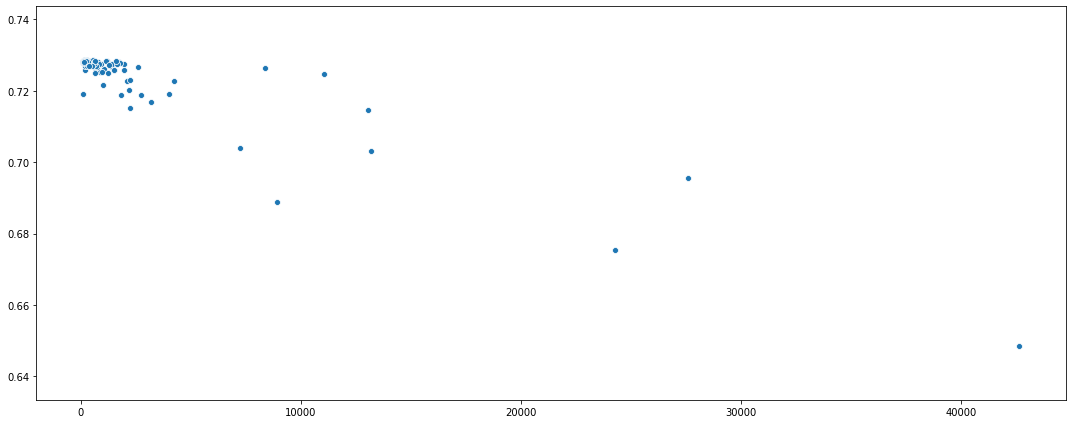

In [104]:
np_euclidean_sim = np.array(list(phrases_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_euclidean_sim)

In [105]:
my_rho = np.corrcoef(np_user_rep, np_euclidean_sim)
print(my_rho)

[[ 1.         -0.91677751]
 [-0.91677751  1.        ]]


In [106]:
print(calculate_order_score(phrases_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_euclid_sim, present_user_rep, corr_coef3))

User on correct position: 0
User on wrong position: 113
None
maximal deviation is: 112
112
mean deviation: 50.56637168141593
num of values bellow mean dev: 57
50.56637168141593
order deviation list is: [109, 105, 62, 76, 103, 7, 62, 103, 78, 75, 73, 66, 89, 91, 60, 73, 78, 70, 48, 15, 72, 3, 68, 73, 78, 73, 67, 25, 77, 21, 37, 42, 27, 48, 66, 5, 21, 1, 6, 64, 71, 37, 30, 22, 3, 35, 12, 13, 13, 7, 58, 20, 47, 18, 7, 2, 10, 34, 20, 4, 52, 15, 25, 19, 16, 3, 29, 48, 39, 30, 38, 4, 17, 52, 23, 53, 62, 50, 19, 6, 60, 38, 33, 50, 30, 54, 60, 64, 1, 33, 20, 22, 82, 68, 49, 79, 83, 90, 81, 69, 91, 93, 91, 88, 99, 77, 104, 89, 102, 105, 109, 108, 112]
******************************
order deviation dict is: {'userId57681': 109, 'userId48538': 105, 'userId24681': 62, 'userId92366': 76, 'userId282899': 103, 'userId146161': 7, 'userId97556': 62, 'userId125350': 103, 'userId94922': 78, 'userId61731': 75, 'userId54786': 73, 'userId77009': 66, 'userId173159': 89, 'userId48295': 91, 'userId98498': 60, 

#### Words

In [107]:
user_dict_words = model_processing_utils.join_phrases_into_words(user_dict, "users")
enriched_merged_book = model_processing_utils.join_phrases_into_words(enriched_merged_book)

100%|██████████| 114/114 [00:02<00:00, 56.55it/s]


In [108]:
len(enriched_merged_book)

37140

Jaccard similarity

In [107]:
words_overal_jacq_sim = { key : metrics.jaccard_similarity(enriched_merged_book, user_dict_words[key]) for key in user_dict_words.keys()}

In [108]:
words_jacc_expert = words_overal_jacq_sim.pop('userId1352')

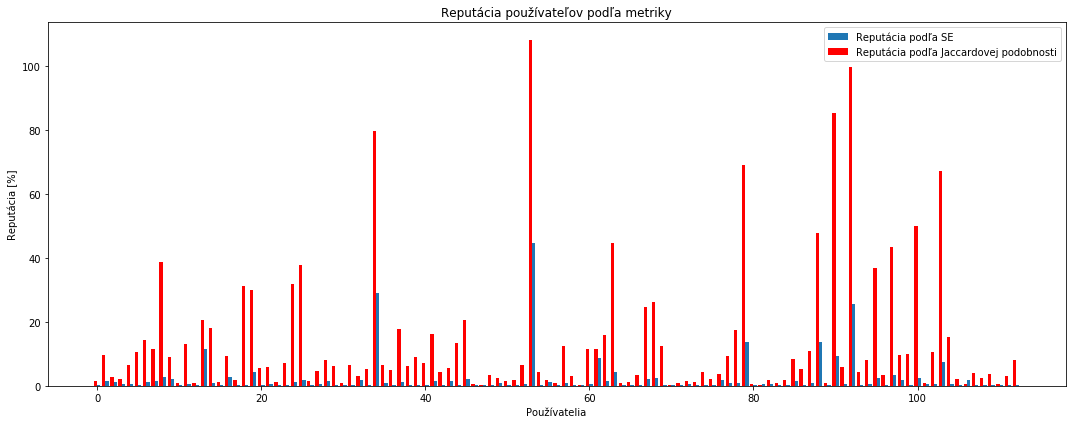

In [109]:
# corr_coef = ((expert_user/95315)*100) / words_jacc_expert
corr_coef = get_corr_coef(expert_user, words_jacc_expert)

scaled_user_rep = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : words_overal_jacq_sim[key]*corr_coef for key in words_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

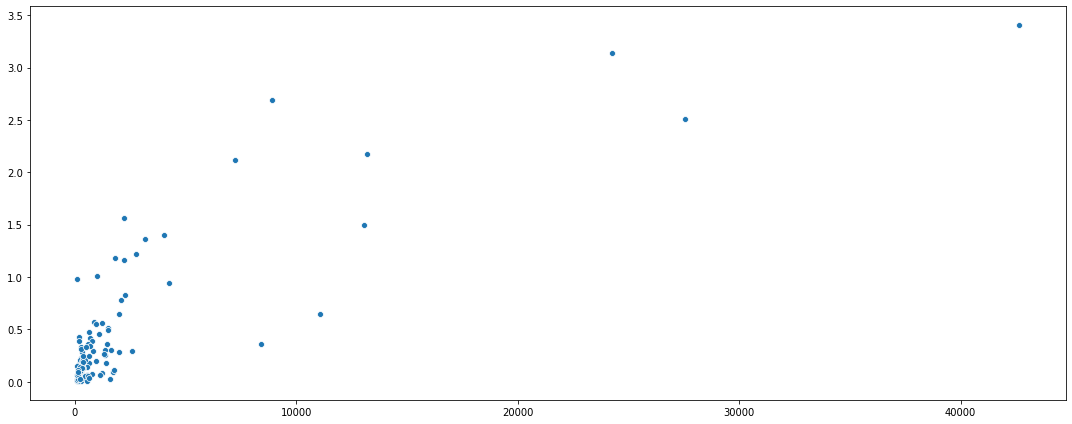

In [110]:
np_words_jacq_sim = np.array(list(words_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_words_jacq_sim)

In [111]:
my_rho = np.corrcoef(np_user_rep, np_words_jacq_sim)
print(my_rho)

[[1.         0.82382577]
 [0.82382577 1.        ]]


In [112]:
print(calculate_order_score(words_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(words_overal_jacq_sim, present_user_rep, corr_coef))

User on correct position: 5
User on wrong position: 108
None
maximal deviation is: 93
93
mean deviation: 18.23008849557522
num of values bellow mean dev: 70
18.23008849557522
order deviation list is: [5, 9, 48, 29, 4, 93, 37, 1, 26, 17, 21, 30, 6, 11, 23, 10, 3, 0, 35, 63, 1, 64, 2, 1, 3, 13, 22, 20, 21, 32, 9, 7, 13, 10, 23, 42, 28, 38, 20, 38, 31, 1, 2, 5, 26, 16, 6, 4, 9, 14, 35, 5, 38, 12, 2, 7, 4, 33, 18, 10, 57, 31, 18, 36, 2, 10, 50, 20, 16, 9, 13, 38, 0, 19, 15, 15, 23, 9, 50, 44, 11, 13, 15, 9, 30, 6, 2, 2, 82, 16, 54, 49, 9, 0, 25, 0, 4, 9, 2, 28, 2, 2, 2, 6, 3, 24, 4, 13, 3, 1, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 5, 'userId48538': 9, 'userId24681': 48, 'userId92366': 29, 'userId282899': -4, 'userId146161': 93, 'userId97556': 37, 'userId125350': 1, 'userId94922': 26, 'userId61731': 17, 'userId54786': 21, 'userId77009': 30, 'userId173159': 6, 'userId48295': -11, 'userId98498': 23, 'userId315606': 10, 'userId6703': -3, 'userId13937':

Cosine similarity

In [113]:
words_overal_cos_sim = metrics.get_cosine_sim(user_dict_words, enriched_merged_book)

In [114]:
words_cos_expert = words_overal_cos_sim.pop('userId1352')

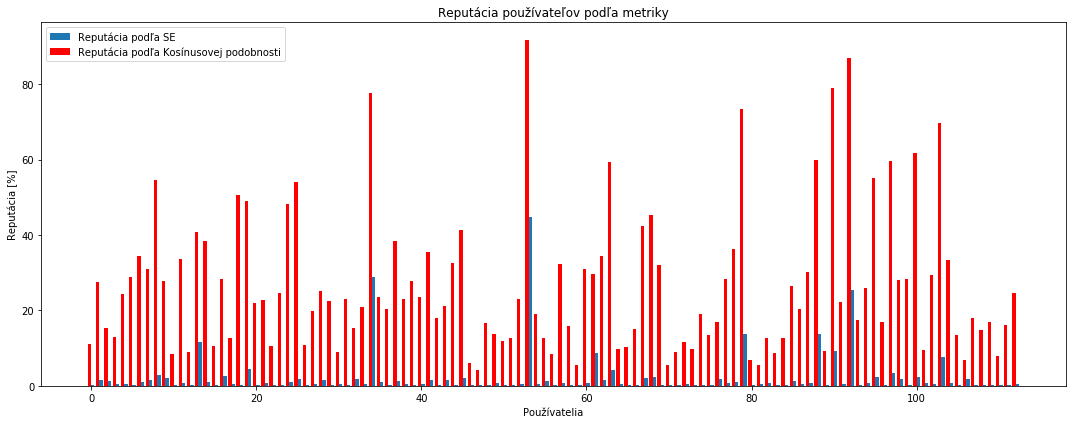

In [115]:
# corr_coef2 = ((expert_user/95315)*100) / words_cos_expert
corr_coef2 = get_corr_coef(expert_user, words_cos_expert)

scaled_user_rep2 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : words_overal_cos_sim[key]*corr_coef2 for key in words_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep2, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

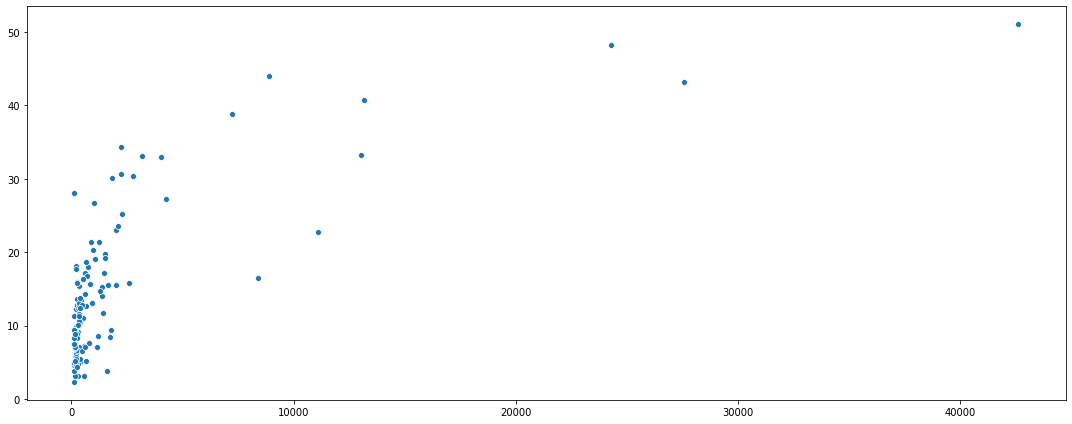

In [116]:
np_words_cos_sim = np.array(list(words_overal_cos_sim.values()))

sb.scatterplot(np_user_rep, np_words_cos_sim)

In [117]:
my_rho = np.corrcoef(np_user_rep, np_words_cos_sim)
print(my_rho)

[[1.         0.70304785]
 [0.70304785 1.        ]]


In [118]:
print(calculate_order_score(words_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(words_overal_cos_sim, present_user_rep, corr_coef2))

User on correct position: 2
User on wrong position: 111
None
maximal deviation is: 94
94
mean deviation: 18.283185840707965
num of values bellow mean dev: 72
18.283185840707965
order deviation list is: [6, 10, 49, 29, 4, 94, 35, 1, 26, 18, 21, 32, 8, 11, 25, 10, 2, 2, 36, 63, 3, 63, 4, 1, 3, 15, 22, 17, 21, 31, 5, 7, 13, 9, 22, 41, 28, 37, 18, 38, 31, 1, 4, 5, 26, 17, 6, 3, 10, 12, 34, 4, 39, 12, 1, 8, 3, 34, 19, 10, 57, 31, 19, 37, 3, 8, 51, 18, 18, 10, 13, 38, 1, 18, 12, 15, 21, 10, 49, 42, 12, 13, 16, 14, 31, 5, 2, 2, 83, 17, 54, 49, 8, 1, 23, 0, 6, 9, 2, 24, 1, 3, 1, 5, 3, 27, 4, 14, 3, 1, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 6, 'userId48538': 10, 'userId24681': 49, 'userId92366': 29, 'userId282899': -4, 'userId146161': 94, 'userId97556': 35, 'userId125350': 1, 'userId94922': 26, 'userId61731': 18, 'userId54786': 21, 'userId77009': 32, 'userId173159': 8, 'userId48295': -11, 'userId98498': 25, 'userId315606': 10, 'userId6703': -2, 'userId1

Euclidean distance

In [119]:
words_overal_euclid_sim = metrics.get_euclid_dis(user_dict_words, enriched_merged_book)

In [120]:
# normalizing the score 
# words_overal_euclid_sim = metrics.min_max_normalize(words_overal_euclid_sim)

words_euclid_expert = words_overal_euclid_sim.pop('userId1352')

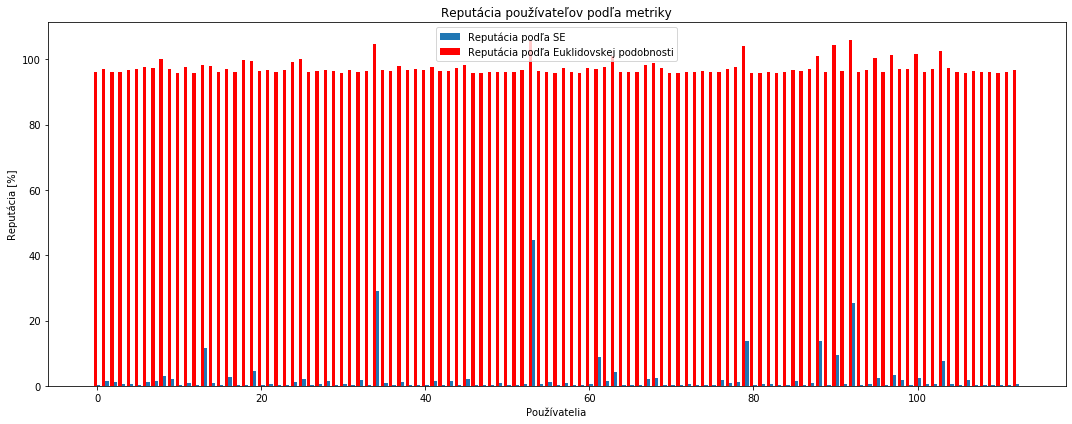

In [121]:
# corr_coef3 = ((expert_user/95315)*100) / words_euclid_expert
corr_coef3 = get_corr_coef(expert_user, words_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : words_overal_euclid_sim[key]*corr_coef3 for key in words_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

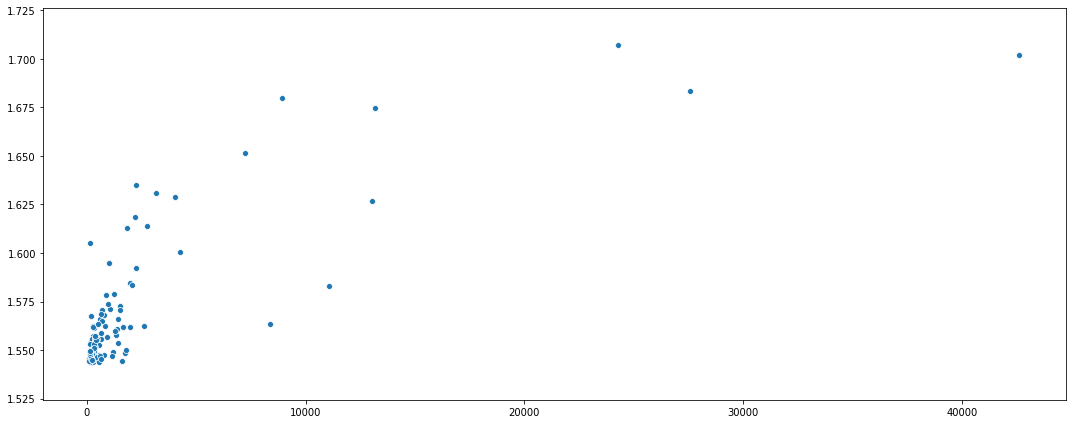

In [122]:
np_words_euclid_sim = np.array(list(words_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_words_euclid_sim)

In [123]:
my_rho = np.corrcoef(np_user_rep, np_words_euclid_sim)
print(my_rho)

[[1.         0.78508101]
 [0.78508101 1.        ]]


In [124]:
print(calculate_order_score(words_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(words_overal_euclid_sim, present_user_rep, corr_coef3))

User on correct position: 0
User on wrong position: 113
None
maximal deviation is: 94
94
mean deviation: 18.47787610619469
num of values bellow mean dev: 70
18.47787610619469
order deviation list is: [6, 12, 49, 30, 4, 94, 35, 1, 28, 20, 22, 33, 8, 10, 25, 11, 2, 2, 36, 63, 3, 62, 4, 2, 2, 15, 25, 16, 21, 29, 4, 7, 13, 9, 23, 39, 29, 36, 17, 37, 31, 1, 4, 5, 26, 20, 6, 3, 11, 12, 34, 4, 40, 10, 2, 9, 4, 34, 20, 10, 56, 31, 19, 35, 3, 8, 51, 18, 18, 10, 14, 40, 3, 18, 12, 15, 21, 11, 51, 42, 12, 13, 16, 14, 31, 5, 1, 2, 83, 17, 55, 49, 8, 2, 23, 1, 6, 9, 2, 23, 1, 4, 2, 5, 3, 28, 3, 14, 5, 1, 2, 1, 1]
******************************
order deviation dict is: {'userId57681': 6, 'userId48538': 12, 'userId24681': 49, 'userId92366': 30, 'userId282899': -4, 'userId146161': 94, 'userId97556': 35, 'userId125350': 1, 'userId94922': 28, 'userId61731': 20, 'userId54786': 22, 'userId77009': 33, 'userId173159': 8, 'userId48295': -10, 'userId98498': 25, 'userId315606': 11, 'userId6703': -2, 'userId139

### Enriched model (adding the most expert user) testing #3

In [109]:
merged_book = model_processing_utils.merge_models(sections_book_dict)
user_dict = loading_models.get_user_dict_from_file(r"D:/Skola/Skola-ing/DP/data/parsed_data/acm_users/answers")

100%|██████████| 181/181 [00:00<00:00, 183.25it/s]


In [110]:
z_user_score_dict1 = loading_models.get_q_a_dict_from_file("D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\z_scores\z_scores2.txt")
z_user_score_list = list(z_user_score_dict1.keys())
user_dict = { key : val for key, val in user_dict.items() if int(key.split("userId")[1]) in z_user_score_list}
z_user_score_dict1 = { key : val for key, val in z_user_score_dict1.items() if f"userId{key}" in list(user_dict.keys())}

In [111]:
model_processing_utils.join_tuples_and_lemantize(user_dict)

100%|██████████| 114/114 [00:34<00:00,  3.27it/s]


In [112]:
len(user_dict)

114

In [113]:
expert_to_enrich = user_dict['userId1352']

In [114]:
len(expert_to_enrich)

19793

In [115]:
len(merged_book)

10172

In [116]:
enriched_merged_book = model_processing_utils.merge_into_existing_model(merged_book, expert_to_enrich)

In [117]:
len(enriched_merged_book)

27960

#### Phrases

Jaccard similarity

In [118]:
present_user_rep = { key : user_rep[key.split('userId')[1]] for key in user_dict.keys()}
len(present_user_rep)

114

In [119]:
phrases_overal_jacq_sim = { key : metrics.jaccard_similarity(enriched_merged_book, user_dict[key]) for key in user_dict.keys()}

In [120]:
phrases_jacc_expert = phrases_overal_jacq_sim.pop('userId1352')
present_user_rep.pop('userId1352')

95315

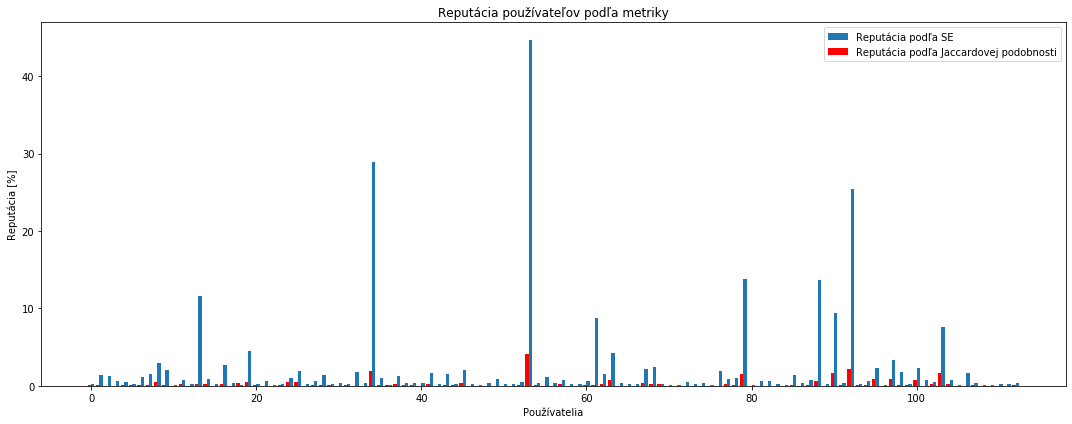

In [121]:
corr_coef = get_corr_coef(expert_user, phrases_jacc_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : phrases_overal_jacq_sim[key]*corr_coef for key in phrases_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

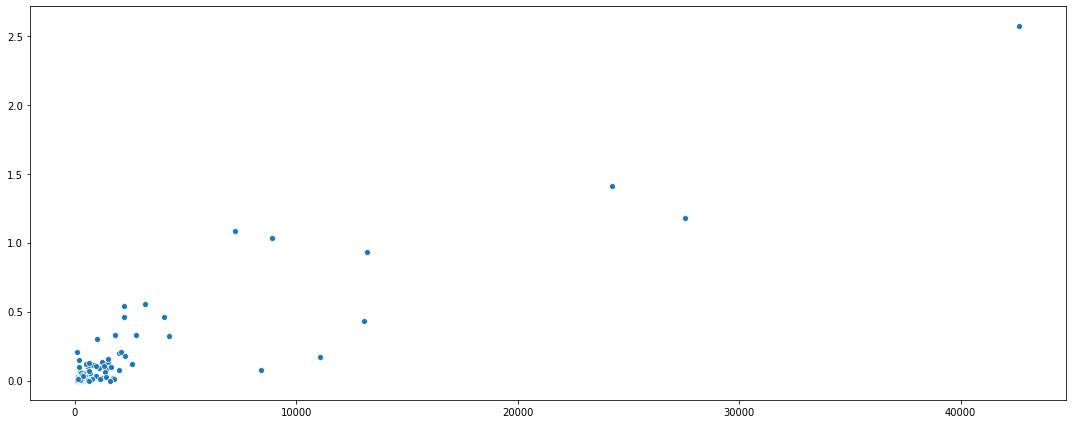

In [122]:
np_user_rep = np.array(list(present_user_rep.values()))
np_phrases_jacq_sim = np.array(list(phrases_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_phrases_jacq_sim)

In [123]:
my_rho = np.corrcoef(np_user_rep, np_phrases_jacq_sim)
print(my_rho)

[[1.         0.91306787]
 [0.91306787 1.        ]]


In [124]:
print(calculate_order_score(phrases_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_jacq_sim, present_user_rep, scale_coef=corr_coef))

User on correct position: 3
User on wrong position: 110
None
maximal deviation is: 91
91
mean deviation: 19.20353982300885
num of values bellow mean dev: 64
19.20353982300885
order deviation list is: [12, 32, 48, 20, 3, 91, 36, 2, 30, 38, 18, 35, 18, 10, 15, 17, 6, 7, 43, 72, 0, 56, 20, 28, 8, 12, 15, 22, 14, 41, 3, 4, 26, 26, 19, 30, 27, 29, 22, 20, 22, 24, 20, 2, 15, 45, 22, 2, 23, 10, 2, 7, 21, 3, 10, 2, 2, 23, 27, 4, 39, 36, 16, 55, 8, 21, 62, 20, 20, 2, 12, 45, 11, 11, 21, 5, 22, 2, 41, 36, 9, 0, 14, 14, 32, 9, 6, 3, 83, 10, 50, 55, 8, 2, 20, 2, 9, 6, 4, 13, 1, 5, 2, 4, 5, 32, 2, 14, 6, 2, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 12, 'userId48538': 32, 'userId24681': 48, 'userId92366': 20, 'userId282899': -3, 'userId146161': 91, 'userId97556': 36, 'userId125350': 2, 'userId94922': 30, 'userId61731': 38, 'userId54786': 18, 'userId77009': 35, 'userId173159': 18, 'userId48295': -10, 'userId98498': 15, 'userId315606': 17, 'userId6703': 6, 'userI

Cosine similarity

In [125]:
phrases_overal_cos_sim = metrics.get_cosine_sim(user_dict, enriched_merged_book)

In [126]:
phrases_cos_expert = phrases_overal_cos_sim.pop('userId1352')

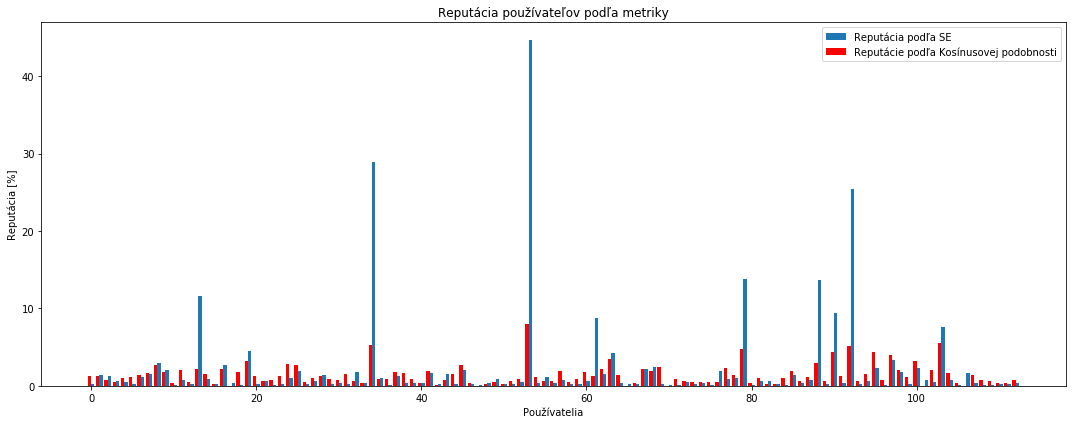

In [127]:
corr_coef2 = get_corr_coef(expert_user, phrases_cos_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : phrases_overal_cos_sim[key]*corr_coef2 for key in phrases_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácie podľa Kosínusovej podobnosti")

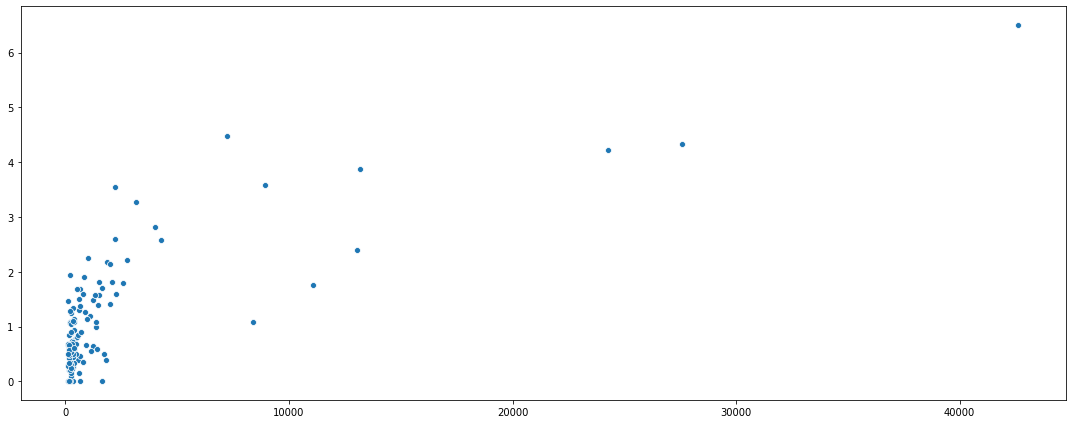

In [128]:
np_cos_sim = np.array(list(phrases_overal_cos_sim.values()))
sb.scatterplot(np_user_rep, np_cos_sim)

In [129]:
my_rho = np.corrcoef(np_user_rep, np_cos_sim)
print(my_rho)

[[1.         0.76207255]
 [0.76207255 1.        ]]


In [130]:
print(calculate_order_score(phrases_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_cos_sim, present_user_rep, scale_coef=corr_coef2))

User on correct position: 1
User on wrong position: 112
None
maximal deviation is: 83
83
mean deviation: 20.123893805309734
num of values bellow mean dev: 69
20.123893805309734
order deviation list is: [17, 49, 45, 13, 3, 76, 27, 8, 33, 48, 17, 35, 31, 10, 6, 19, 16, 8, 46, 77, 3, 54, 20, 44, 2, 15, 14, 11, 15, 44, 12, 2, 26, 25, 8, 23, 27, 22, 15, 12, 9, 30, 27, 15, 8, 45, 32, 10, 29, 30, 20, 10, 12, 9, 12, 1, 7, 22, 30, 4, 4, 37, 21, 56, 12, 35, 62, 11, 21, 9, 16, 50, 23, 1, 26, 4, 24, 5, 39, 34, 2, 4, 14, 21, 42, 6, 7, 3, 83, 1, 54, 66, 6, 4, 14, 1, 10, 6, 11, 7, 1, 4, 2, 1, 7, 40, 1, 16, 7, 1, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 17, 'userId48538': 49, 'userId24681': 45, 'userId92366': 13, 'userId282899': -3, 'userId146161': 76, 'userId97556': 27, 'userId125350': 8, 'userId94922': 33, 'userId61731': 48, 'userId54786': 17, 'userId77009': 35, 'userId173159': 31, 'userId48295': -10, 'userId98498': 6, 'userId315606': 19, 'userId6703': 16, 'us

Euclidean distance

In [131]:
phrases_overal_euclid_sim = metrics.get_euclid_dis(user_dict, enriched_merged_book)

In [132]:
phrases_overal_euclid_sim['userId1352']

1.021752619700508

In [133]:
# normalizing the score 
# phrases_overal_euclid_sim = metrics.min_max_normalize(phrases_overal_euclid_sim)

In [134]:
phrases_euclid_expert = phrases_overal_euclid_sim.pop('userId1352')

In [135]:
phrases_euclid_expert

1.021752619700508

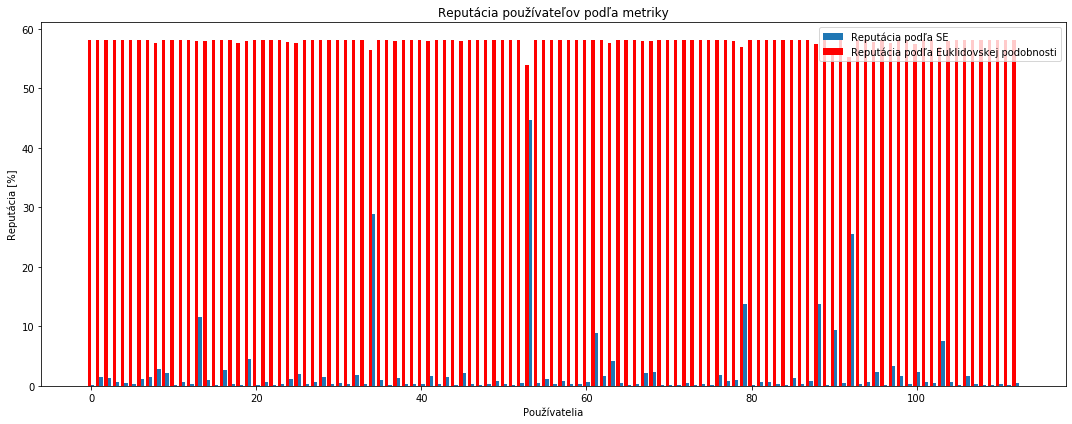

In [136]:
corr_coef3 = get_corr_coef(expert_user, phrases_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : phrases_overal_euclid_sim[key]*corr_coef3 for key in phrases_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

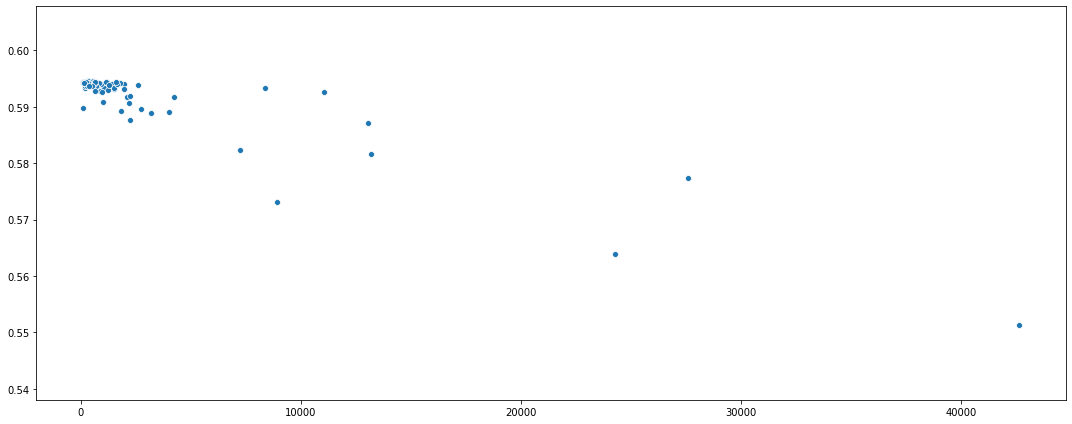

In [137]:
np_euclidean_sim = np.array(list(phrases_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_euclidean_sim)

In [138]:
my_rho = np.corrcoef(np_user_rep, np_euclidean_sim)
print(my_rho)

[[ 1.         -0.91559494]
 [-0.91559494  1.        ]]


In [139]:
print(calculate_order_score(phrases_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_euclid_sim, present_user_rep, scale_coef=corr_coef3))

User on correct position: 1
User on wrong position: 112
None
maximal deviation is: 112
112
mean deviation: 50.584070796460175
num of values bellow mean dev: 56
50.584070796460175
order deviation list is: [106, 108, 67, 78, 99, 7, 60, 94, 79, 87, 73, 67, 90, 92, 58, 77, 91, 73, 53, 15, 74, 4, 64, 85, 67, 70, 73, 22, 72, 29, 35, 44, 20, 49, 63, 5, 25, 6, 6, 71, 64, 29, 34, 17, 3, 32, 8, 12, 15, 12, 61, 22, 46, 18, 2, 0, 6, 36, 19, 8, 52, 18, 22, 17, 7, 18, 22, 46, 39, 36, 32, 3, 10, 53, 26, 56, 62, 50, 7, 5, 58, 39, 37, 51, 38, 49, 60, 63, 1, 36, 22, 27, 82, 70, 43, 79, 83, 90, 81, 56, 89, 93, 93, 88, 99, 77, 104, 89, 102, 105, 109, 108, 112]
******************************
order deviation dict is: {'userId57681': 106, 'userId48538': 108, 'userId24681': 67, 'userId92366': 78, 'userId282899': 99, 'userId146161': 7, 'userId97556': 60, 'userId125350': 94, 'userId94922': 79, 'userId61731': 87, 'userId54786': 73, 'userId77009': 67, 'userId173159': 90, 'userId48295': 92, 'userId98498': 58, 'use

#### Words

In [140]:
user_dict_words = model_processing_utils.join_phrases_into_words(user_dict, "users")
enriched_merged_book = model_processing_utils.join_phrases_into_words(enriched_merged_book)

100%|██████████| 114/114 [00:01<00:00, 60.45it/s]


In [141]:
len(enriched_merged_book)

55920

Jaccard similarity

In [157]:
words_overal_jacq_sim = { key : metrics.jaccard_similarity(enriched_merged_book, user_dict_words[key]) for key in user_dict_words.keys()}

In [158]:
words_jacc_expert = words_overal_jacq_sim.pop('userId1352')

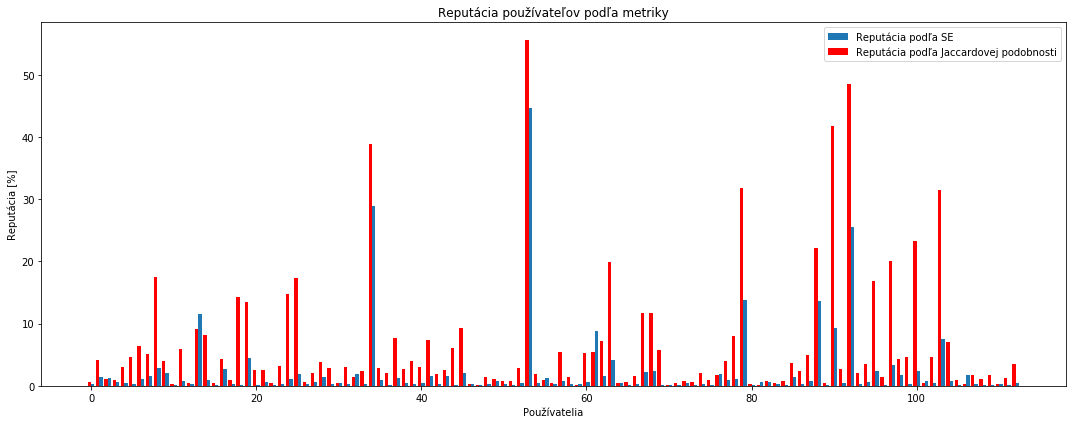

In [159]:
corr_coef = get_corr_coef(expert_user, words_jacc_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : words_overal_jacq_sim[key]*corr_coef for key in words_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

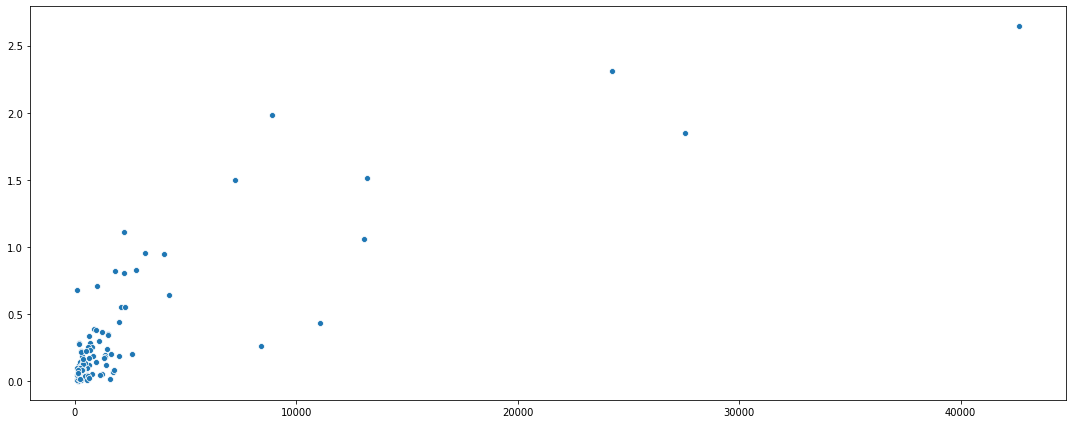

In [160]:
np_words_jacq_sim = np.array(list(words_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_words_jacq_sim)

In [161]:
my_rho = np.corrcoef(np_user_rep, np_words_jacq_sim)
print(my_rho)

[[1.         0.84264316]
 [0.84264316 1.        ]]


In [162]:
print(calculate_order_score(words_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(words_overal_jacq_sim, present_user_rep, scale_coef=corr_coef))

User on correct position: 3
User on wrong position: 110
None
maximal deviation is: 93
93
mean deviation: 18.24778761061947
num of values bellow mean dev: 70
18.24778761061947
order deviation list is: [6, 9, 48, 27, 3, 93, 38, 3, 25, 18, 22, 29, 6, 13, 22, 10, 3, 0, 37, 64, 1, 64, 1, 1, 4, 14, 21, 20, 20, 34, 11, 8, 14, 9, 22, 42, 28, 38, 21, 37, 31, 4, 0, 5, 25, 17, 6, 4, 8, 13, 36, 6, 36, 12, 3, 6, 2, 34, 18, 10, 57, 30, 18, 37, 2, 11, 51, 20, 16, 9, 11, 37, 2, 19, 14, 16, 23, 9, 49, 44, 10, 14, 14, 11, 31, 6, 2, 2, 81, 15, 52, 48, 9, 1, 23, 1, 4, 9, 3, 26, 2, 3, 1, 6, 3, 23, 4, 14, 3, 1, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 6, 'userId48538': 9, 'userId24681': 48, 'userId92366': 27, 'userId282899': -3, 'userId146161': 93, 'userId97556': 38, 'userId125350': -3, 'userId94922': 25, 'userId61731': 18, 'userId54786': 22, 'userId77009': 29, 'userId173159': 6, 'userId48295': -13, 'userId98498': 22, 'userId315606': 10, 'userId6703': -3, 'userId13937

Cosine similarity

In [163]:
words_overal_cos_sim = metrics.get_cosine_sim(user_dict_words, enriched_merged_book)

In [164]:
words_cos_expert = words_overal_cos_sim.pop('userId1352')

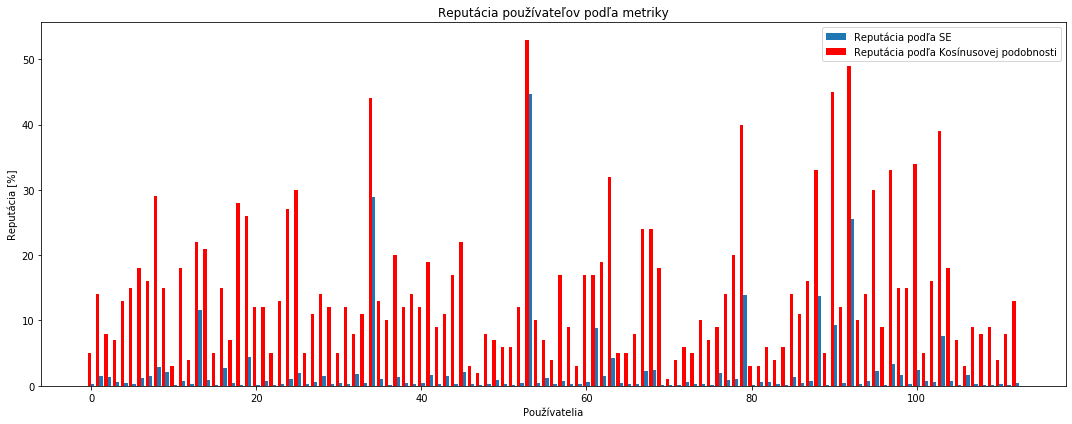

In [165]:
corr_coef2 = get_corr_coef(expert_user, words_cos_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : int(words_overal_cos_sim[key]*corr_coef2) for key in words_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

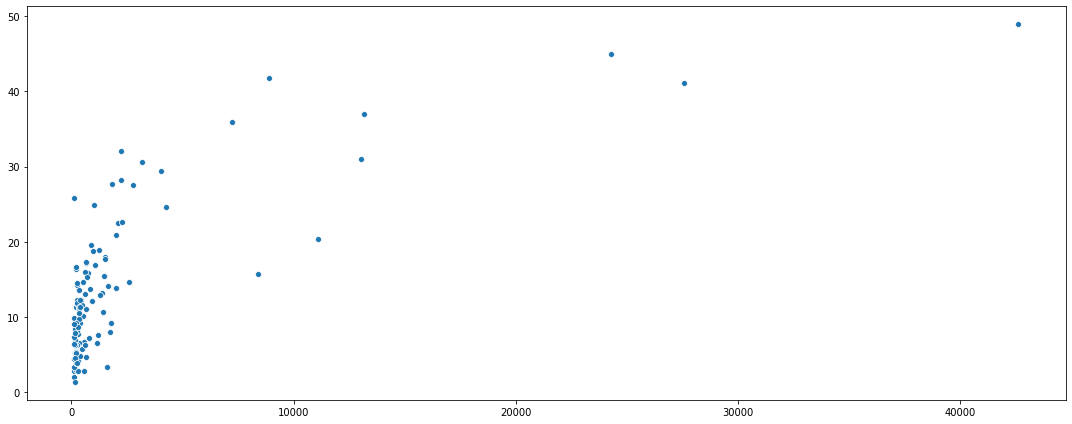

In [166]:
np_words_cos_sim = np.array(list(words_overal_cos_sim.values()))

sb.scatterplot(np_user_rep, np_words_cos_sim)

In [167]:
my_rho = np.corrcoef(np_user_rep, np_words_cos_sim)
print(my_rho)

[[1.         0.71530353]
 [0.71530353 1.        ]]


In [168]:
print(calculate_order_score(words_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(words_overal_cos_sim, present_user_rep, scale_coef=corr_coef2))

User on correct position: 5
User on wrong position: 108
None
maximal deviation is: 94
94
mean deviation: 18.15929203539823
num of values bellow mean dev: 68
18.15929203539823
order deviation list is: [7, 10, 47, 25, 3, 94, 38, 5, 26, 18, 22, 30, 6, 13, 23, 10, 3, 0, 40, 65, 1, 62, 1, 1, 4, 17, 21, 19, 19, 32, 9, 9, 11, 9, 22, 39, 27, 38, 22, 36, 30, 5, 0, 5, 26, 16, 5, 5, 6, 7, 35, 4, 36, 12, 3, 9, 3, 34, 19, 9, 56, 30, 20, 37, 3, 10, 52, 20, 18, 9, 11, 38, 1, 19, 12, 15, 22, 8, 48, 44, 11, 15, 13, 15, 31, 6, 2, 2, 82, 16, 52, 46, 9, 1, 22, 0, 6, 9, 2, 23, 0, 3, 1, 6, 3, 25, 4, 14, 3, 1, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 7, 'userId48538': 10, 'userId24681': 47, 'userId92366': 25, 'userId282899': -3, 'userId146161': 94, 'userId97556': 38, 'userId125350': -5, 'userId94922': 26, 'userId61731': 18, 'userId54786': 22, 'userId77009': 30, 'userId173159': 6, 'userId48295': -13, 'userId98498': 23, 'userId315606': 10, 'userId6703': -3, 'userId13937'

Euclidean distance

In [169]:
words_overal_euclid_sim = metrics.get_euclid_dis(user_dict_words, enriched_merged_book)

In [170]:
# normalizing the score 
# words_overal_euclid_sim = metrics.min_max_normalize(words_overal_euclid_sim)

words_euclid_expert = words_overal_euclid_sim.pop('userId1352')

In [171]:
words_euclid_expert

3.3923533002217634

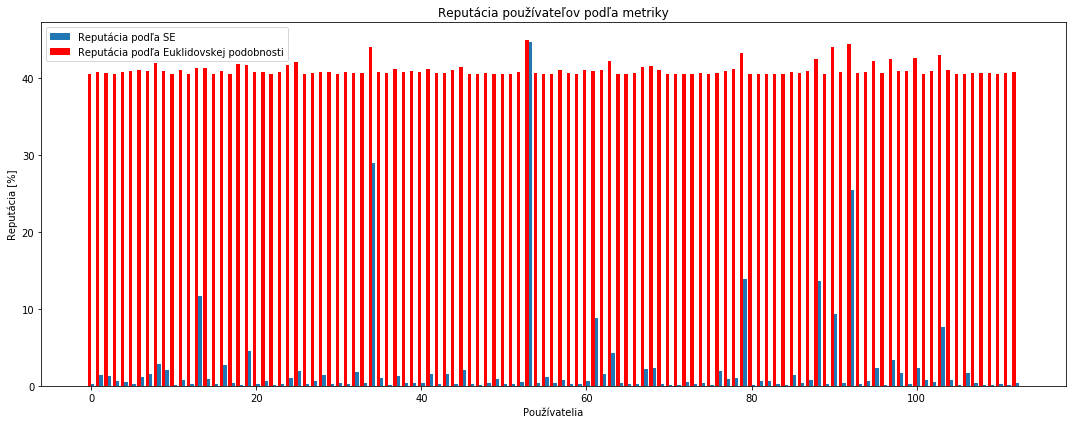

In [172]:
corr_coef3 = get_corr_coef(expert_user, words_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : words_overal_euclid_sim[key]*corr_coef3 for key in words_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

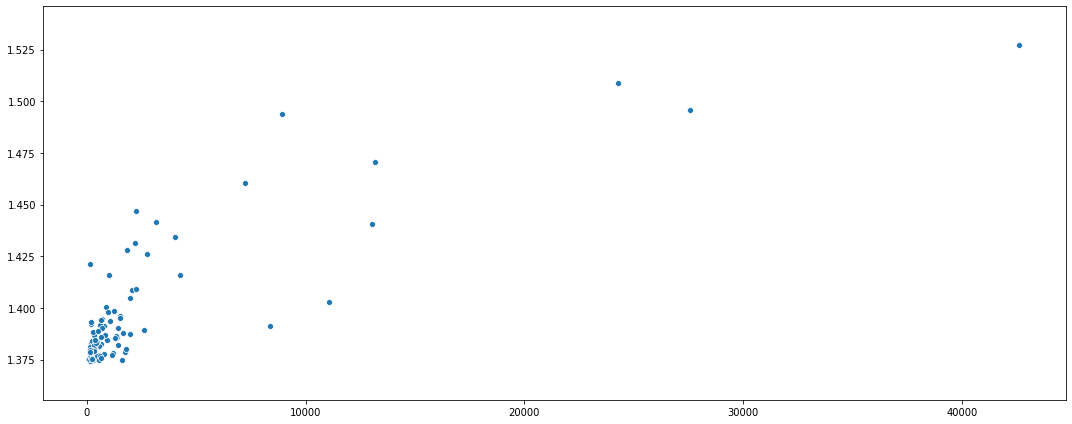

In [173]:
np_words_euclid_sim = np.array(list(words_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_words_euclid_sim)

In [174]:
my_rho = np.corrcoef(np_user_rep, np_words_euclid_sim)
print(my_rho)

[[1.         0.82819804]
 [0.82819804 1.        ]]


In [175]:
print(calculate_order_score(words_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(words_overal_euclid_sim, present_user_rep, scale_coef=corr_coef3))

User on correct position: 6
User on wrong position: 107
None
maximal deviation is: 94
94
mean deviation: 18.15929203539823
num of values bellow mean dev: 69
18.15929203539823
order deviation list is: [7, 11, 47, 25, 3, 94, 39, 5, 26, 18, 22, 30, 6, 13, 24, 10, 3, 0, 40, 65, 1, 62, 0, 3, 3, 17, 23, 17, 19, 32, 9, 9, 11, 9, 23, 38, 28, 38, 22, 35, 30, 5, 0, 5, 26, 16, 5, 6, 6, 7, 34, 5, 37, 9, 3, 10, 3, 34, 18, 9, 55, 30, 20, 37, 4, 10, 52, 19, 19, 10, 11, 38, 1, 19, 11, 15, 21, 8, 48, 44, 11, 15, 13, 16, 32, 7, 2, 2, 82, 15, 53, 44, 9, 1, 22, 0, 6, 9, 2, 22, 0, 4, 1, 5, 3, 25, 3, 14, 4, 1, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 7, 'userId48538': 11, 'userId24681': 47, 'userId92366': 25, 'userId282899': -3, 'userId146161': 94, 'userId97556': 39, 'userId125350': -5, 'userId94922': 26, 'userId61731': 18, 'userId54786': 22, 'userId77009': 30, 'userId173159': 6, 'userId48295': -13, 'userId98498': 24, 'userId315606': 10, 'userId6703': -3, 'userId13937

### Enriched model (accepted answers + adding the most expert user) testing #4

In [142]:
acc_ans_dict = loading_models.get_list_from_file(dir_path="D:\Skola\Skola-ing\DP\data\parsed_data\\acm_accepted_answers", num_of_files_to_read=453)
model_processing_utils.join_tuples_and_lemantize(acc_ans_dict)
merged_book = model_processing_utils.merge_models(sections_book_dict)
merged_answers = model_processing_utils.merge_models(acc_ans_dict)

100%|██████████| 453/453 [00:00<00:00, 450561.94it/s]


In [143]:
len(merged_book)

10172

In [144]:
len(merged_answers)

8760

In [145]:
enriched_merged_book = model_processing_utils.merge_into_existing_model(merged_book, merged_answers)

In [146]:
len(enriched_merged_book)

18570

In [147]:
len(expert_to_enrich)

19793

In [148]:
enriched_merged_book = model_processing_utils.merge_into_existing_model(enriched_merged_book, expert_to_enrich)

In [149]:
len(enriched_merged_book)

35335

#### Phrases

Jaccard similarity

In [184]:
present_user_rep = { key : user_rep[key.split('userId')[1]] for key in user_dict.keys()}
len(present_user_rep)

114

In [185]:
phrases_overal_jacq_sim = { key : metrics.jaccard_similarity(enriched_merged_book, user_dict[key]) for key in user_dict.keys()}

In [186]:
phrases_jacc_expert = phrases_overal_jacq_sim.pop('userId1352')
present_user_rep.pop('userId1352')

95315

In [187]:
phrases_jacc_expert

50.82075

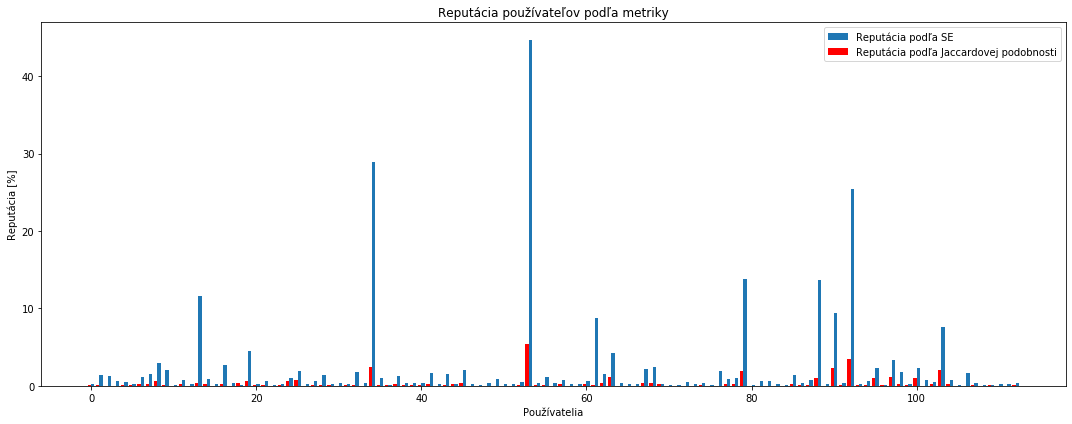

In [188]:
corr_coef = get_corr_coef(expert_user, phrases_jacc_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : phrases_overal_jacq_sim[key]*corr_coef for key in phrases_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

In [189]:
phrases_jacc_expert

50.82075

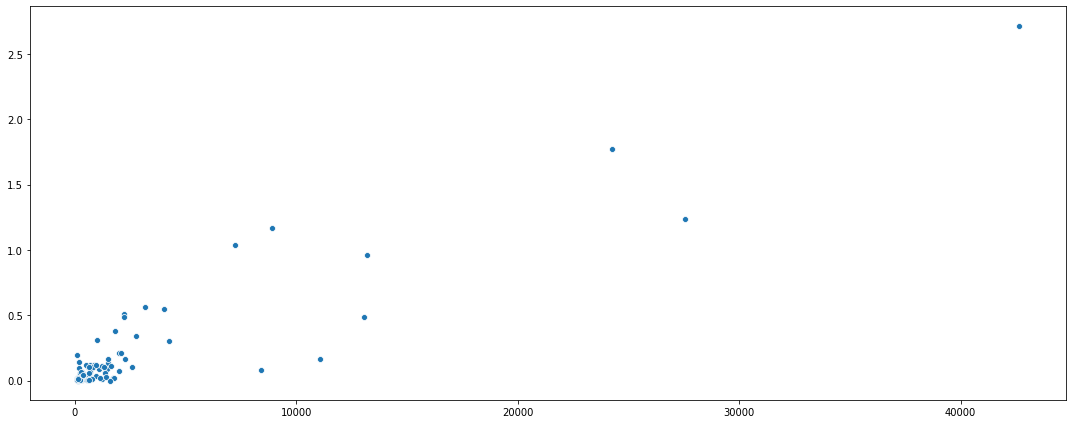

In [190]:
np_user_rep = np.array(list(present_user_rep.values()))
np_phrases_jacq_sim = np.array(list(phrases_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_phrases_jacq_sim)

In [191]:
my_rho = np.corrcoef(np_user_rep, np_phrases_jacq_sim)
print(my_rho)

[[1.         0.91810878]
 [0.91810878 1.        ]]


In [192]:
print(calculate_order_score(phrases_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_jacq_sim, present_user_rep, scale_coef=corr_coef))

User on correct position: 2
User on wrong position: 111
None
maximal deviation is: 90
90
mean deviation: 18.672566371681416
num of values bellow mean dev: 72
18.672566371681416
order deviation list is: [11, 30, 40, 12, 1, 90, 37, 13, 28, 30, 23, 36, 14, 13, 11, 14, 2, 15, 38, 72, 2, 56, 12, 22, 3, 12, 22, 19, 12, 36, 12, 7, 15, 27, 13, 38, 27, 33, 24, 30, 10, 4, 16, 6, 10, 42, 12, 3, 23, 1, 10, 9, 24, 8, 10, 3, 1, 25, 31, 6, 48, 42, 17, 56, 3, 6, 58, 16, 20, 1, 8, 48, 8, 14, 17, 11, 23, 2, 34, 44, 5, 1, 16, 14, 33, 9, 7, 3, 87, 5, 49, 53, 9, 4, 22, 1, 8, 5, 6, 18, 0, 5, 3, 5, 4, 31, 3, 13, 5, 2, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 11, 'userId48538': 30, 'userId24681': 40, 'userId92366': 12, 'userId282899': 1, 'userId146161': 90, 'userId97556': 37, 'userId125350': 13, 'userId94922': 28, 'userId61731': 30, 'userId54786': 23, 'userId77009': 36, 'userId173159': 14, 'userId48295': -13, 'userId98498': 11, 'userId315606': 14, 'userId6703': -2, 'use

Cosine similarity

In [193]:
phrases_overal_cos_sim = metrics.get_cosine_sim(user_dict, enriched_merged_book)

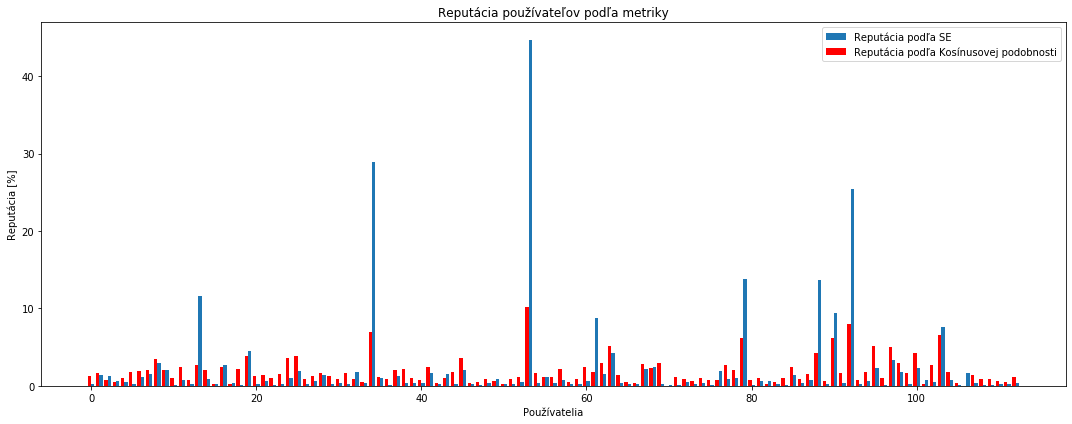

In [194]:
phrases_cos_expert = phrases_overal_cos_sim.pop('userId1352')

corr_coef2 = get_corr_coef(expert_user, phrases_cos_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : phrases_overal_cos_sim[key]*corr_coef2 for key in phrases_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

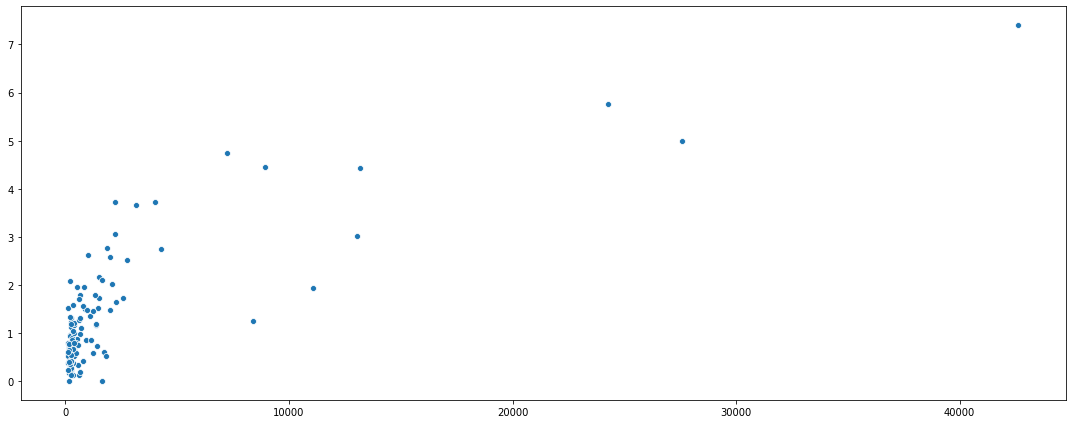

In [195]:
np_cos_sim = np.array(list(phrases_overal_cos_sim.values()))
sb.scatterplot(np_user_rep, np_cos_sim)

In [196]:
my_rho = np.corrcoef(np_user_rep, np_cos_sim)
print(my_rho)

[[1.         0.78667551]
 [0.78667551 1.        ]]


In [197]:
print(calculate_order_score(phrases_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_cos_sim, present_user_rep, scale_coef=corr_coef2))

User on correct position: 3
User on wrong position: 110
None
maximal deviation is: 87
87
mean deviation: 19.75221238938053
num of values bellow mean dev: 70
19.75221238938053
order deviation list is: [26, 50, 29, 6, 10, 76, 26, 36, 29, 37, 12, 37, 30, 13, 3, 14, 3, 12, 39, 75, 1, 53, 11, 35, 12, 12, 19, 0, 8, 40, 20, 15, 24, 29, 9, 38, 27, 30, 18, 5, 14, 8, 19, 2, 4, 43, 31, 8, 35, 26, 10, 13, 14, 4, 14, 8, 6, 27, 33, 4, 15, 49, 23, 60, 7, 6, 60, 5, 20, 7, 12, 53, 20, 6, 21, 2, 23, 2, 26, 51, 4, 8, 16, 18, 40, 5, 10, 0, 87, 6, 55, 67, 9, 5, 16, 2, 9, 6, 14, 13, 3, 3, 4, 3, 5, 35, 2, 17, 6, 2, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 26, 'userId48538': 50, 'userId24681': 29, 'userId92366': 6, 'userId282899': 10, 'userId146161': 76, 'userId97556': 26, 'userId125350': 36, 'userId94922': 29, 'userId61731': 37, 'userId54786': 12, 'userId77009': 37, 'userId173159': 30, 'userId48295': -13, 'userId98498': 3, 'userId315606': 14, 'userId6703': 3, 'userId13

Euclidean distance

In [198]:
phrases_overal_euclid_sim = metrics.get_euclid_dis(user_dict, enriched_merged_book)

In [199]:
# normalizing the score 
# phrases_overal_euclid_sim = metrics.min_max_normalize(phrases_overal_euclid_sim)

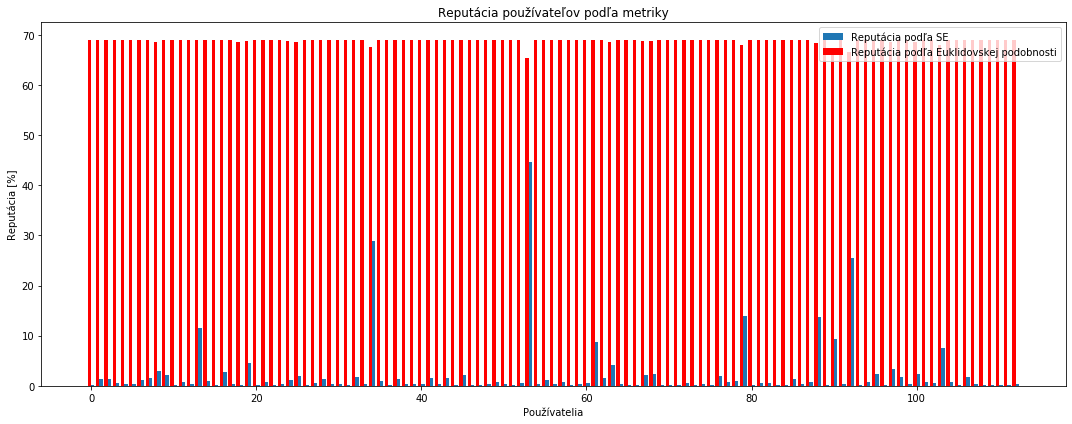

In [200]:
phrases_euclid_expert = phrases_overal_euclid_sim.pop('userId1352')

corr_coef3 = get_corr_coef(expert_user, phrases_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : phrases_overal_euclid_sim[key]*corr_coef3 for key in phrases_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

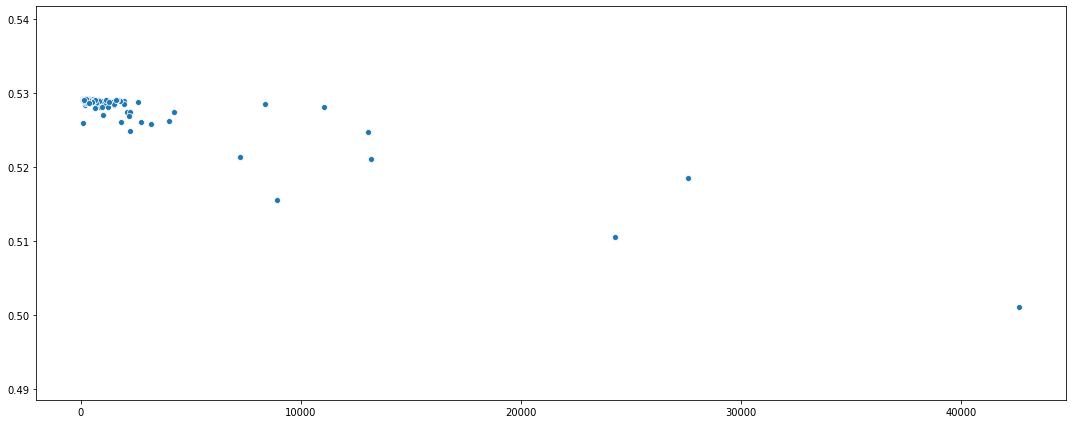

In [201]:
np_euclidean_sim = np.array(list(phrases_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_euclidean_sim)

In [202]:
my_rho = np.corrcoef(np_user_rep, np_euclidean_sim)
print(my_rho)

[[ 1.         -0.91623675]
 [-0.91623675  1.        ]]


In [203]:
print(calculate_order_score(phrases_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_euclid_sim, present_user_rep, scale_coef=corr_coef3))

User on correct position: 0
User on wrong position: 113
None
maximal deviation is: 112
112
mean deviation: 50.21238938053097
num of values bellow mean dev: 56
50.21238938053097
order deviation list is: [106, 108, 60, 76, 101, 4, 59, 100, 80, 80, 74, 69, 92, 87, 56, 76, 85, 69, 48, 19, 74, 3, 65, 80, 74, 70, 70, 19, 74, 26, 31, 38, 19, 48, 63, 1, 23, 2, 5, 69, 70, 36, 32, 17, 5, 30, 6, 9, 25, 16, 61, 31, 47, 21, 3, 5, 8, 36, 16, 8, 52, 15, 21, 15, 10, 7, 24, 49, 39, 38, 36, 1, 8, 52, 25, 55, 62, 52, 14, 4, 58, 36, 38, 53, 37, 48, 58, 64, 3, 18, 22, 28, 81, 67, 41, 79, 83, 90, 83, 59, 90, 93, 90, 86, 99, 78, 104, 88, 102, 105, 109, 108, 112]
******************************
order deviation dict is: {'userId57681': 106, 'userId48538': 108, 'userId24681': 60, 'userId92366': 76, 'userId282899': 101, 'userId146161': 4, 'userId97556': 59, 'userId125350': 100, 'userId94922': 80, 'userId61731': 80, 'userId54786': 74, 'userId77009': 69, 'userId173159': 92, 'userId48295': 87, 'userId98498': 56, 'us

#### Words

In [150]:
user_dict_words = model_processing_utils.join_phrases_into_words(user_dict, "users")
enriched_merged_book = model_processing_utils.join_phrases_into_words(enriched_merged_book)

100%|██████████| 114/114 [00:02<00:00, 48.40it/s]


In [151]:
len(enriched_merged_book)

70670

Jaccard similarity

In [205]:
words_overal_jacq_sim = { key : metrics.jaccard_similarity(enriched_merged_book, user_dict_words[key]) for key in user_dict_words.keys()}

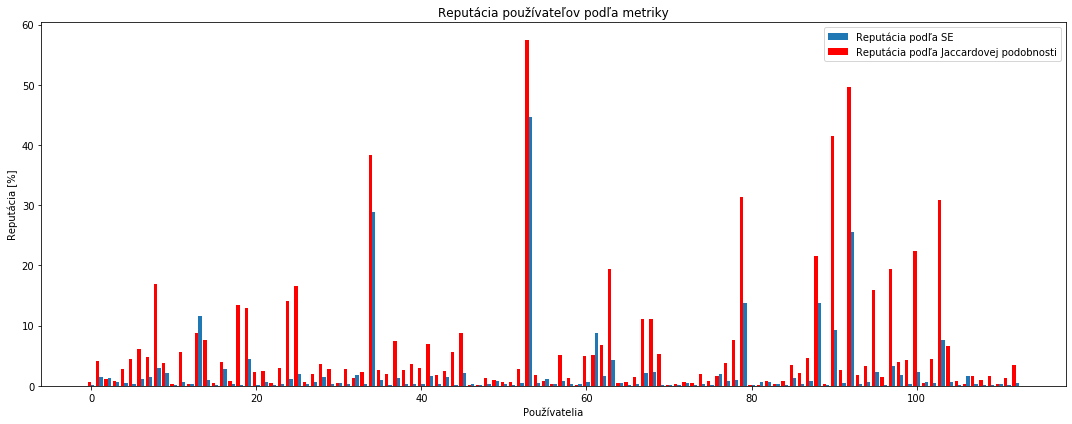

In [206]:
words_jacc_expert = words_overal_jacq_sim.pop('userId1352')

corr_coef = get_corr_coef(expert_user, words_jacc_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : words_overal_jacq_sim[key]*corr_coef for key in words_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

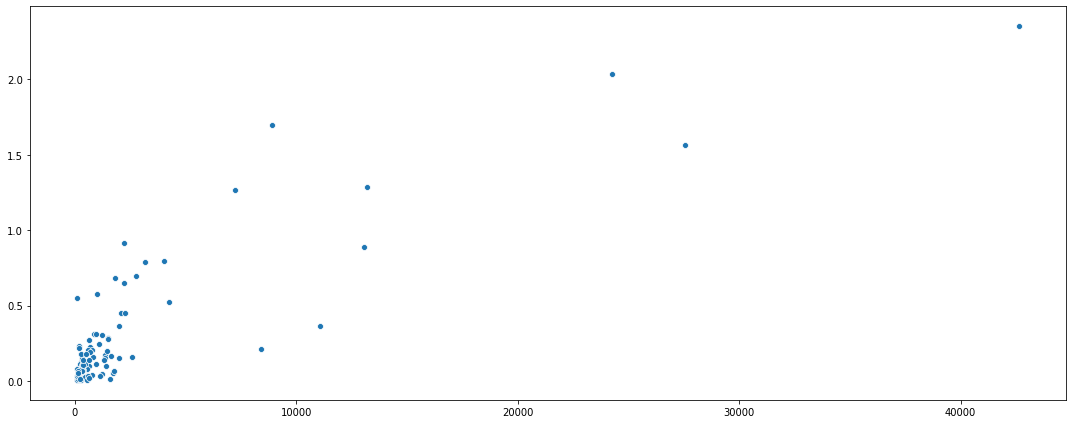

In [207]:
np_words_jacq_sim = np.array(list(words_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_words_jacq_sim)

In [208]:
my_rho = np.corrcoef(np_user_rep, np_words_jacq_sim)
print(my_rho)

[[1.         0.85360405]
 [0.85360405 1.        ]]


In [209]:
print(calculate_order_score(words_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(words_overal_jacq_sim, present_user_rep, scale_coef=corr_coef))

User on correct position: 4
User on wrong position: 109
None
maximal deviation is: 93
93
mean deviation: 18.24778761061947
num of values bellow mean dev: 70
18.24778761061947
order deviation list is: [5, 9, 48, 29, 4, 93, 38, 1, 25, 17, 21, 29, 6, 11, 22, 10, 3, 0, 35, 64, 1, 64, 1, 1, 4, 13, 22, 20, 22, 33, 11, 8, 14, 9, 23, 42, 28, 38, 23, 38, 31, 3, 0, 6, 25, 15, 6, 4, 9, 14, 36, 6, 36, 13, 2, 4, 4, 34, 18, 11, 57, 32, 18, 36, 1, 10, 51, 20, 16, 9, 11, 37, 1, 19, 16, 16, 23, 9, 50, 44, 10, 14, 14, 9, 30, 6, 2, 2, 81, 16, 53, 48, 9, 1, 24, 0, 4, 9, 2, 27, 2, 2, 2, 6, 3, 23, 4, 14, 3, 1, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 5, 'userId48538': 9, 'userId24681': 48, 'userId92366': 29, 'userId282899': -4, 'userId146161': 93, 'userId97556': 38, 'userId125350': 1, 'userId94922': 25, 'userId61731': 17, 'userId54786': 21, 'userId77009': 29, 'userId173159': 6, 'userId48295': -11, 'userId98498': 22, 'userId315606': 10, 'userId6703': -3, 'userId13937':

Cosine similarity

In [210]:
words_overal_cos_sim = metrics.get_cosine_sim(user_dict_words, enriched_merged_book)

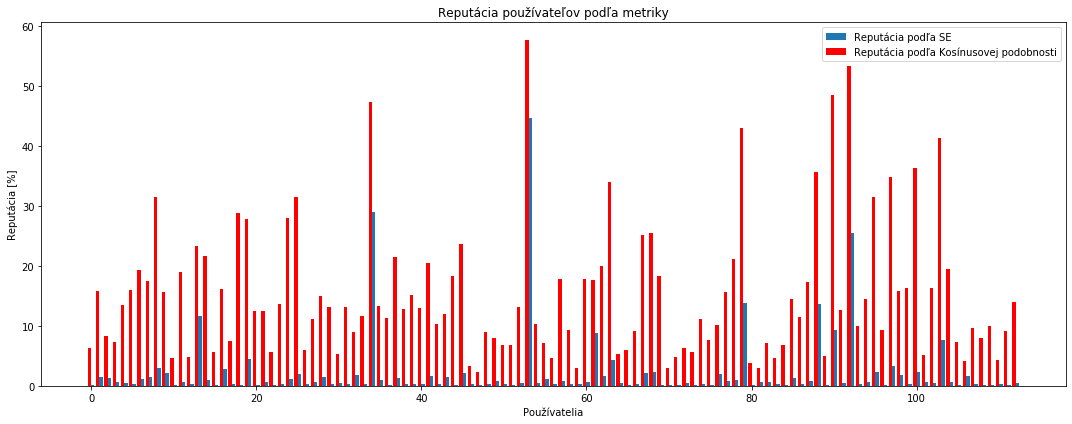

In [211]:
words_cos_expert = words_overal_cos_sim.pop('userId1352')

corr_coef2 = get_corr_coef(expert_user, words_cos_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : words_overal_cos_sim[key]*corr_coef2 for key in words_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

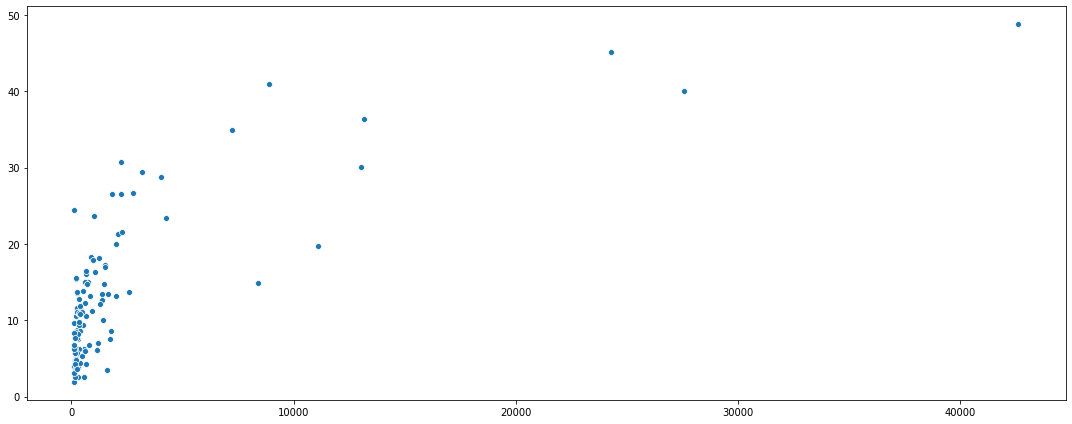

In [212]:
np_words_cos_sim = np.array(list(words_overal_cos_sim.values()))

sb.scatterplot(np_user_rep, np_words_cos_sim)

In [213]:
my_rho = np.corrcoef(np_user_rep, np_words_cos_sim)
print(my_rho)

[[1.         0.72968232]
 [0.72968232 1.        ]]


In [214]:
print(calculate_order_score(words_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(words_overal_cos_sim, present_user_rep, scale_coef=corr_coef2))

User on correct position: 4
User on wrong position: 109
None
maximal deviation is: 94
94
mean deviation: 18.23008849557522
num of values bellow mean dev: 69
18.23008849557522
order deviation list is: [5, 10, 48, 27, 4, 94, 37, 1, 26, 17, 22, 30, 6, 11, 24, 10, 3, 0, 36, 65, 1, 62, 1, 1, 4, 15, 22, 17, 21, 31, 9, 9, 15, 9, 22, 39, 28, 39, 23, 38, 31, 4, 0, 6, 25, 14, 6, 4, 9, 9, 35, 5, 36, 12, 2, 8, 3, 34, 19, 11, 57, 32, 20, 36, 3, 10, 52, 20, 17, 9, 11, 38, 1, 19, 12, 15, 22, 9, 50, 44, 11, 15, 14, 11, 31, 6, 2, 2, 82, 16, 54, 46, 9, 1, 24, 0, 4, 9, 2, 24, 2, 3, 1, 6, 3, 25, 4, 14, 3, 1, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 5, 'userId48538': 10, 'userId24681': 48, 'userId92366': 27, 'userId282899': -4, 'userId146161': 94, 'userId97556': 37, 'userId125350': 1, 'userId94922': 26, 'userId61731': 17, 'userId54786': 22, 'userId77009': 30, 'userId173159': 6, 'userId48295': -11, 'userId98498': 24, 'userId315606': 10, 'userId6703': -3, 'userId13937'

Euclidean distance

In [215]:
words_overal_euclid_sim = metrics.get_euclid_dis(user_dict_words, enriched_merged_book)

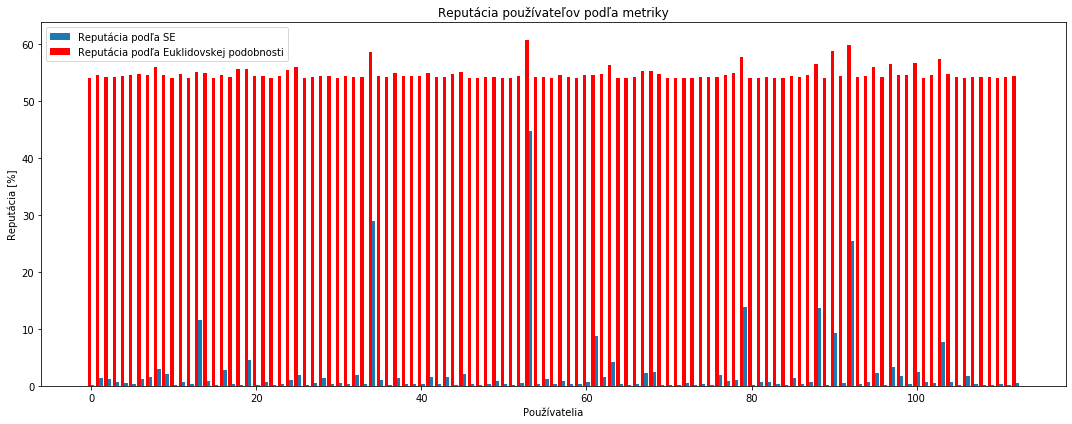

In [216]:
words_euclid_expert = words_overal_euclid_sim.pop('userId1352')

corr_coef3 = get_corr_coef(expert_user, words_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : words_overal_euclid_sim[key]*corr_coef3 for key in words_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

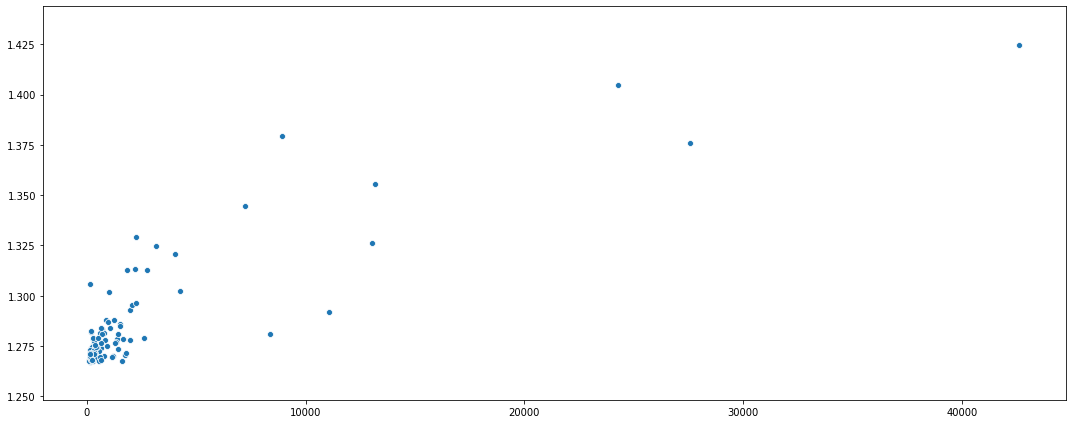

In [217]:
np_words_euclid_sim = np.array(list(words_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_words_euclid_sim)

In [218]:
my_rho = np.corrcoef(np_user_rep, np_words_euclid_sim)
print(my_rho)

[[1.         0.85761449]
 [0.85761449 1.        ]]


In [219]:
print(calculate_order_score(words_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(words_overal_euclid_sim, present_user_rep, scale_coef=corr_coef3))

User on correct position: 5
User on wrong position: 108
None
maximal deviation is: 94
94
mean deviation: 18.194690265486727
num of values bellow mean dev: 69
18.194690265486727
order deviation list is: [5, 11, 48, 27, 4, 94, 38, 1, 26, 17, 22, 30, 6, 10, 25, 10, 3, 0, 36, 65, 1, 62, 1, 1, 4, 15, 25, 16, 21, 30, 8, 9, 13, 9, 23, 38, 28, 39, 23, 37, 31, 4, 0, 6, 25, 14, 6, 4, 8, 9, 34, 5, 37, 12, 3, 8, 4, 34, 19, 11, 56, 32, 20, 35, 3, 10, 52, 20, 17, 10, 11, 38, 1, 19, 12, 15, 21, 9, 51, 44, 11, 15, 14, 11, 31, 7, 2, 2, 82, 15, 54, 44, 9, 1, 24, 0, 6, 9, 2, 24, 0, 3, 1, 5, 3, 25, 4, 14, 3, 1, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 5, 'userId48538': 11, 'userId24681': 48, 'userId92366': 27, 'userId282899': -4, 'userId146161': 94, 'userId97556': 38, 'userId125350': 1, 'userId94922': 26, 'userId61731': 17, 'userId54786': 22, 'userId77009': 30, 'userId173159': 6, 'userId48295': -10, 'userId98498': 25, 'userId315606': 10, 'userId6703': -3, 'userId139

### Model from user intersections

In [220]:
from parsing.model_evaluation import loading_models, metrics, ploting, model_processing_utils

In [221]:
sections_book_dict = loading_models.get_list_from_file(dir_path="D:/Skola/Skola-ing/DP/data/parsed_data/acm_books/jls8/acm_chapters", num_of_files_to_read="all")
user_dict = loading_models.get_user_dict_from_file(r"D:/Skola/Skola-ing/DP/data/parsed_data/acm_users/answers")
user_rep = loading_models.get_user_reputation_dict_from_file(r"D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\\reputation\user_reputation.txt")

100%|██████████| 181/181 [00:00<00:00, 187.65it/s]


In [222]:
z_user_score_dict1 = loading_models.get_q_a_dict_from_file("D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\z_scores\z_scores2.txt")
z_user_score_list = list(z_user_score_dict1.keys())
user_dict = { key : val for key, val in user_dict.items() if int(key.split("userId")[1]) in z_user_score_list}
z_user_score_dict1 = { key : val for key, val in z_user_score_dict1.items() if f"userId{key}" in list(user_dict.keys())}

In [223]:
model_processing_utils.join_tuples_and_lemantize(user_dict)
model_processing_utils.join_tuples_and_lemantize(sections_book_dict)
merged_book = model_processing_utils.merge_models(sections_book_dict)
merged_users = model_processing_utils.merge_models(user_dict)

present_user_rep = { key : user_rep[key.split('userId')[1]] for key in user_dict.keys()}
len(present_user_rep)

100%|██████████| 114/114 [00:00<00:00, 109567.06it/s]


114

Comparing the intersection between the merged_book and the merged_user model

In [224]:
metrics.jaccard_similarity(merged_book, merged_users)

2.45841

Getting the intersection model between merged_book and the merged_user model

In [225]:
intersection_model = metrics.get_model_intersection(merged_book, merged_users)

In [226]:
len(intersection_model)

1333

In [227]:
phrases_overal_jacq_sim = { key : metrics.jaccard_similarity(intersection_model, user_dict[key]) for key in user_dict.keys()}

In [228]:
phrases_jacc_expert = phrases_overal_jacq_sim['userId1352']
expert_user = present_user_rep['userId1352']

In [229]:
get_corr_coef = lambda user_expert, metric_expert: ((user_expert/95315)*100)/metric_expert

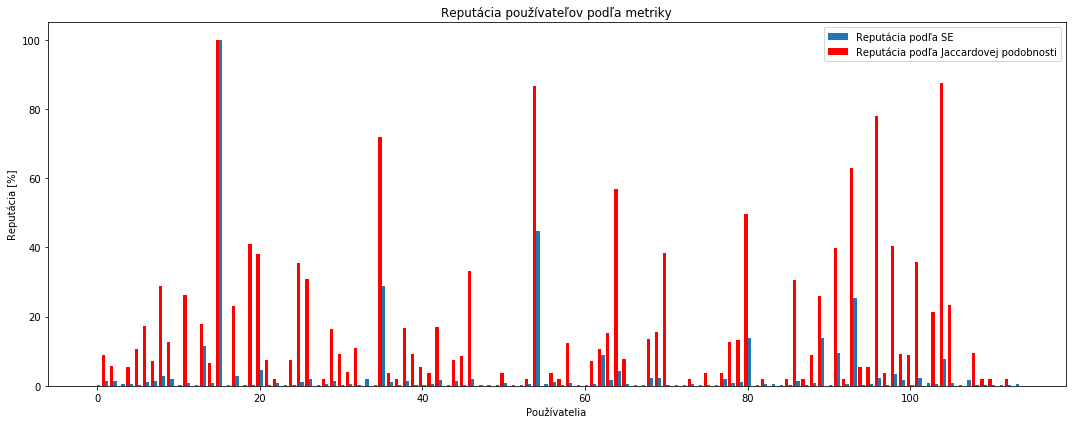

In [230]:
corr_coef = get_corr_coef(expert_user, phrases_jacc_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : phrases_overal_jacq_sim[key]*corr_coef for key in phrases_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

## Model evaluation - JavaNotesForProfessionals

### Loading the models

In [170]:
sections_book_dict = loading_models.get_list_from_file(dir_path="D:/Skola/Skola-ing/DP/data/parsed_data/acm_books/java_notes_for_profesionals/acm_sub_sections", num_of_files_to_read="all")
user_dict = loading_models.get_user_dict_from_file(r"D:/Skola/Skola-ing/DP/data/parsed_data/acm_users/answers")
user_rep = loading_models.get_user_reputation_dict_from_file(r"D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\\reputation\user_reputation.txt")

100%|██████████| 181/181 [00:00<00:00, 204.28it/s]


In [171]:
z_user_score_dict1 = loading_models.get_q_a_dict_from_file("D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\z_scores\z_scores2.txt")
z_user_score_list = list(z_user_score_dict1.keys())
user_dict = { key : val for key, val in user_dict.items() if int(key.split("userId")[1]) in z_user_score_list}
z_user_score_dict1 = { key : val for key, val in z_user_score_dict1.items() if f"userId{key}" in list(user_dict.keys())}

In [172]:
print(f"num of user models: {len(user_dict)}, num of user reps: {len(user_rep)}")

num of user models: 114, num of user reps: 13085


Looking at the book model

In [173]:
%%capture
sections_book_dict

### Basic model testing #5

#### Phrases

Jaccard similarity

In [174]:
model_processing_utils.join_tuples_and_lemantize(user_dict)
model_processing_utils.join_tuples_and_lemantize(sections_book_dict)
merged_book = model_processing_utils.merge_models(sections_book_dict)

present_user_rep = { key : user_rep[key.split('userId')[1]] for key in user_dict.keys()}
len(present_user_rep)

100%|██████████| 630/630 [00:00<00:00, 630195.93it/s]


114

Merged book:

In [175]:
# %%capture
len(merged_book)

10554

In [176]:
phrases_overal_jacq_sim = { key : metrics.jaccard_similarity(merged_book, user_dict[key]) for key in user_dict.keys()}

In [177]:
phrases_overal_jacq_sim['userId1352']

3.77171

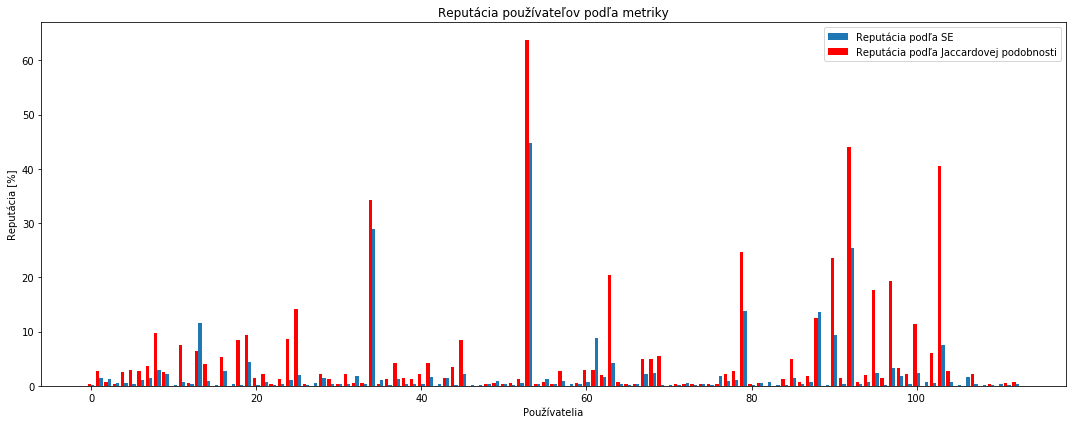

In [178]:
phrases_jacc_expert = phrases_overal_jacq_sim.pop('userId1352')
present_user_rep.pop('userId1352')

corr_coef = get_corr_coef(expert_user, phrases_jacc_expert)

scaled_user_rep = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : phrases_overal_jacq_sim[key]*corr_coef for key in phrases_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

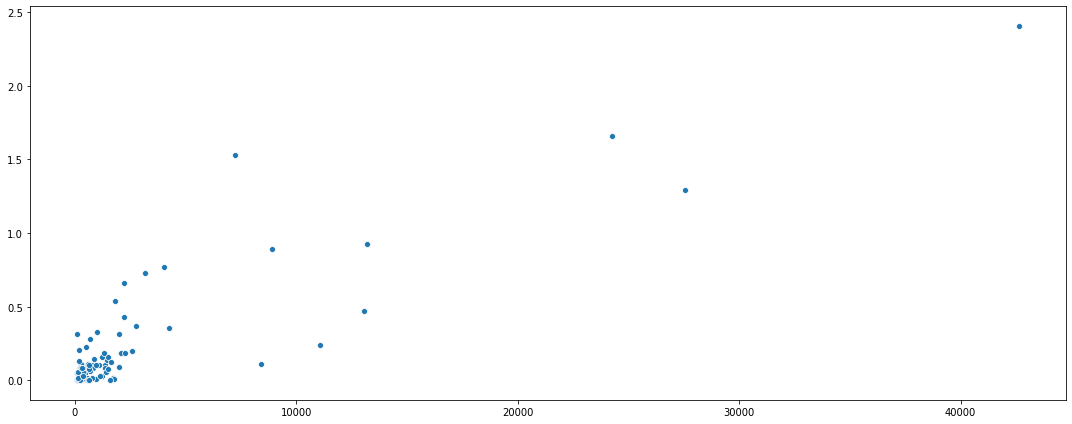

In [179]:
np_user_rep = np.array(list(present_user_rep.values()))
np_phrases_jacq_sim = np.array(list(phrases_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_phrases_jacq_sim)

In [180]:
my_rho = np.corrcoef(np_user_rep, np_phrases_jacq_sim)
print(my_rho)

[[1.        0.8756224]
 [0.8756224 1.       ]]


In [181]:
print(calculate_order_score(phrases_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_jacq_sim, present_user_rep, corr_coef))

User on correct position: 7
User on wrong position: 106
None
maximal deviation is: 91
91
mean deviation: 19.36283185840708
num of values bellow mean dev: 72
19.36283185840708
order deviation list is: [36, 33, 53, 10, 2, 91, 15, 7, 7, 47, 18, 50, 17, 5, 25, 26, 5, 16, 42, 73, 15, 62, 11, 1, 6, 15, 21, 19, 12, 40, 7, 24, 28, 7, 8, 46, 17, 28, 14, 4, 8, 19, 29, 25, 7, 43, 9, 0, 11, 19, 0, 32, 21, 8, 3, 18, 2, 30, 35, 56, 16, 36, 18, 54, 0, 5, 54, 7, 27, 7, 7, 31, 6, 12, 57, 0, 22, 1, 29, 31, 6, 9, 15, 5, 26, 1, 23, 0, 74, 7, 52, 71, 11, 4, 22, 7, 8, 4, 9, 8, 0, 4, 4, 4, 6, 26, 1, 13, 6, 1, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 36, 'userId48538': 33, 'userId24681': 53, 'userId92366': 10, 'userId282899': 2, 'userId146161': 91, 'userId97556': 15, 'userId125350': -7, 'userId94922': 7, 'userId61731': 47, 'userId54786': 18, 'userId77009': 50, 'userId173159': 17, 'userId48295': -5, 'userId98498': 25, 'userId315606': 26, 'userId6703': -5, 'userId13937': 

Checking if our model isnt biased by the size of user models

In [182]:
df = get_sorted_file_list_by_size(phrases_overal_jacq_sim, "D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\\answers")

In [183]:
df.head(20)

,UserID,Metric score,file_size
53,userId3249,2.40674,192201
92,userId7167,1.65846,110915
90,userId7080,0.89083,79009
34,userId2314,1.29163,70386
103,userId90992,1.52840,54876
79,userId5692,0.92826,51428
100,userId8500,0.42825,26354
88,userId66,0.47079,26119
97,userId79256,0.73205,25411
63,userId39690,0.77230,22454


Doesnt look like it - first 3 positions match but the rest not 

Cosine similarity

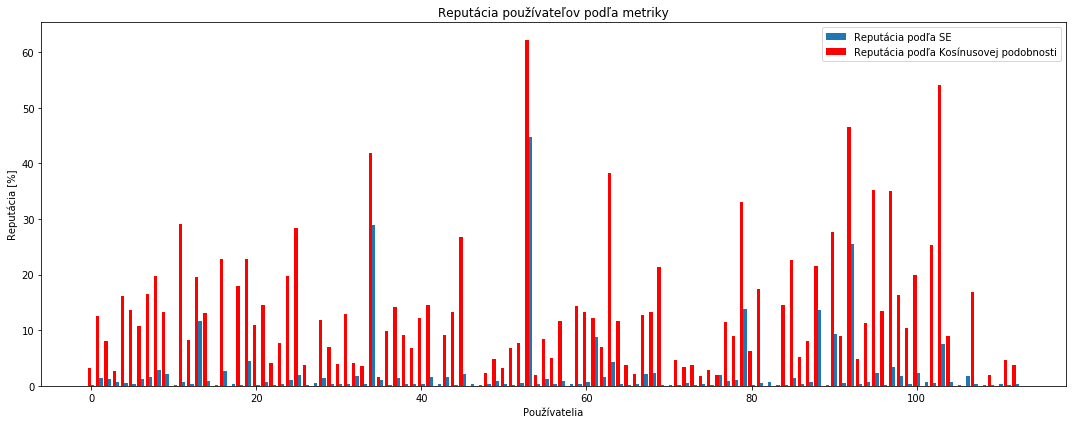

In [184]:
phrases_overal_cos_sim = metrics.get_cosine_sim(user_dict, merged_book)

phrases_cos_expert = phrases_overal_cos_sim.pop('userId1352')

corr_coef2 = get_corr_coef(expert_user, phrases_cos_expert)

scaled_user_rep2 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : phrases_overal_cos_sim[key]*corr_coef2 for key in phrases_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep2, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

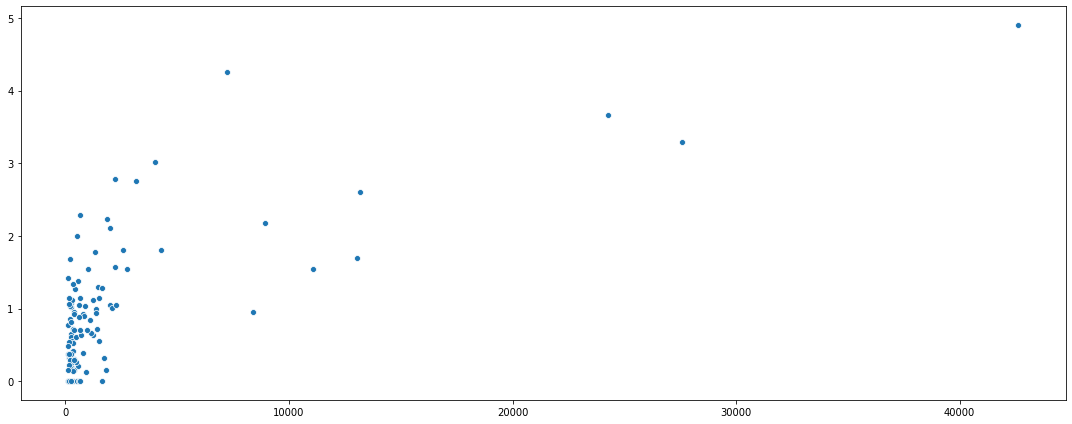

In [185]:
np_cos_sim = np.array(list(phrases_overal_cos_sim.values()))
sb.scatterplot(np_user_rep, np_cos_sim)

In [186]:
my_rho = np.corrcoef(np_user_rep, np_cos_sim)
print(my_rho)

[[1.         0.69511859]
 [0.69511859 1.        ]]


In [187]:
# calculate_order_score(phrases_overal_cos_sim, present_user_rep)
print(calculate_order_score(phrases_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_cos_sim, present_user_rep, corr_coef2))

User on correct position: 6
User on wrong position: 107
None
maximal deviation is: 85
85
mean deviation: 21.876106194690266
num of values bellow mean dev: 70
21.876106194690266
order deviation list is: [43, 36, 57, 10, 2, 85, 15, 7, 7, 73, 15, 67, 23, 5, 24, 30, 5, 16, 44, 76, 12, 53, 9, 3, 6, 15, 21, 12, 12, 43, 8, 24, 28, 6, 18, 44, 12, 23, 8, 42, 1, 18, 46, 25, 0, 43, 17, 5, 9, 19, 15, 32, 18, 20, 1, 30, 7, 29, 42, 56, 29, 37, 15, 54, 1, 19, 54, 13, 36, 18, 4, 31, 8, 0, 57, 19, 16, 16, 25, 29, 0, 16, 15, 13, 26, 2, 39, 4, 74, 3, 54, 71, 11, 8, 19, 24, 11, 3, 22, 0, 7, 5, 6, 5, 7, 36, 4, 16, 12, 4, 0, 2, 0]
******************************
order deviation dict is: {'userId57681': 43, 'userId48538': 36, 'userId24681': 57, 'userId92366': 10, 'userId282899': 2, 'userId146161': 85, 'userId97556': 15, 'userId125350': -7, 'userId94922': 7, 'userId61731': 73, 'userId54786': 15, 'userId77009': 67, 'userId173159': 23, 'userId48295': -5, 'userId98498': 24, 'userId315606': 30, 'userId6703': -5, '

Euclidean distance

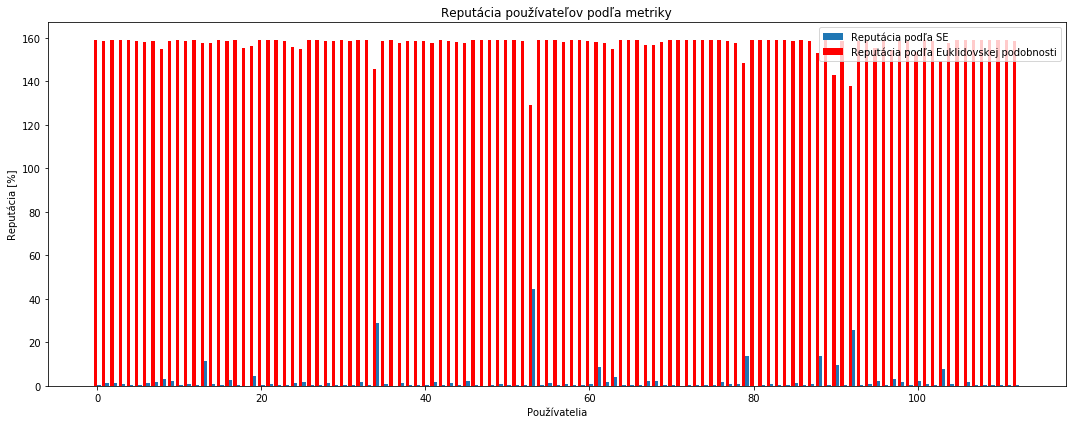

In [188]:
phrases_overal_euclid_sim = metrics.get_euclid_dis(user_dict, merged_book)

# normalizing the score 
# phrases_overal_euclid_sim = metrics.min_max_normalize(phrases_overal_euclid_sim)

phrases_euclid_expert = phrases_overal_euclid_sim.pop('userId1352')

corr_coef3 = get_corr_coef(expert_user, phrases_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : phrases_overal_euclid_sim[key]*corr_coef3 for key in phrases_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

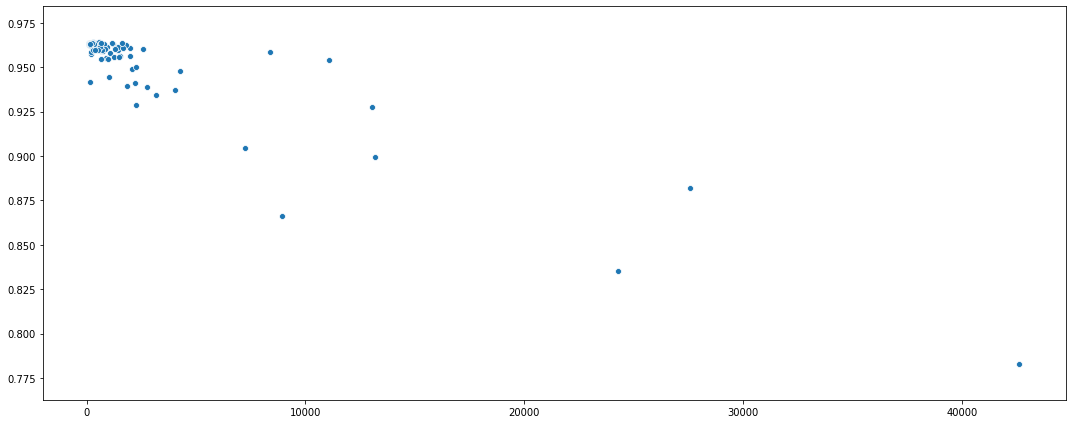

In [189]:
np_euclidean_sim = np.array(list(phrases_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_euclidean_sim)

In [190]:
my_rho = np.corrcoef(np_user_rep, np_euclidean_sim)
print(my_rho)

[[ 1.         -0.91253338]
 [-0.91253338  1.        ]]


In [191]:
print(calculate_order_score(phrases_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_euclid_sim, present_user_rep, corr_coef3))

User on correct position: 1
User on wrong position: 112
None
maximal deviation is: 112
112
mean deviation: 50.584070796460175
num of values bellow mean dev: 56
50.584070796460175
order deviation list is: [110, 104, 69, 75, 104, 8, 61, 96, 74, 87, 73, 69, 87, 96, 61, 76, 85, 72, 50, 10, 73, 5, 70, 62, 66, 69, 74, 27, 74, 23, 40, 41, 29, 53, 70, 2, 17, 2, 8, 72, 66, 32, 32, 15, 1, 34, 16, 13, 7, 1, 57, 14, 43, 15, 3, 9, 1, 31, 19, 0, 52, 16, 30, 18, 14, 2, 31, 48, 37, 36, 40, 5, 30, 52, 25, 55, 62, 50, 9, 5, 58, 40, 37, 47, 28, 51, 63, 62, 10, 45, 21, 25, 81, 69, 47, 79, 84, 90, 81, 59, 90, 93, 93, 88, 99, 77, 104, 89, 102, 105, 109, 108, 112]
******************************
order deviation dict is: {'userId57681': 110, 'userId48538': 104, 'userId24681': 69, 'userId92366': 75, 'userId282899': 104, 'userId146161': 8, 'userId97556': 61, 'userId125350': 96, 'userId94922': 74, 'userId61731': 87, 'userId54786': 73, 'userId77009': 69, 'userId173159': 87, 'userId48295': 96, 'userId98498': 61, 'u

#### Words

In [192]:
user_dict_words = model_processing_utils.join_phrases_into_words(user_dict, "users")
merged_book = model_processing_utils.join_phrases_into_words(merged_book)

100%|██████████| 114/114 [00:01<00:00, 58.17it/s]


In [193]:
len(user_dict_words['userId11200'])

252

In [194]:
len(merged_book)

21108

Jaccard similarity

In [195]:
words_overal_jacq_sim = { key : metrics.jaccard_similarity(merged_book, user_dict_words[key]) for key in user_dict_words.keys()}

In [196]:
words_overal_jacq_sim['userId1352']

2.89211

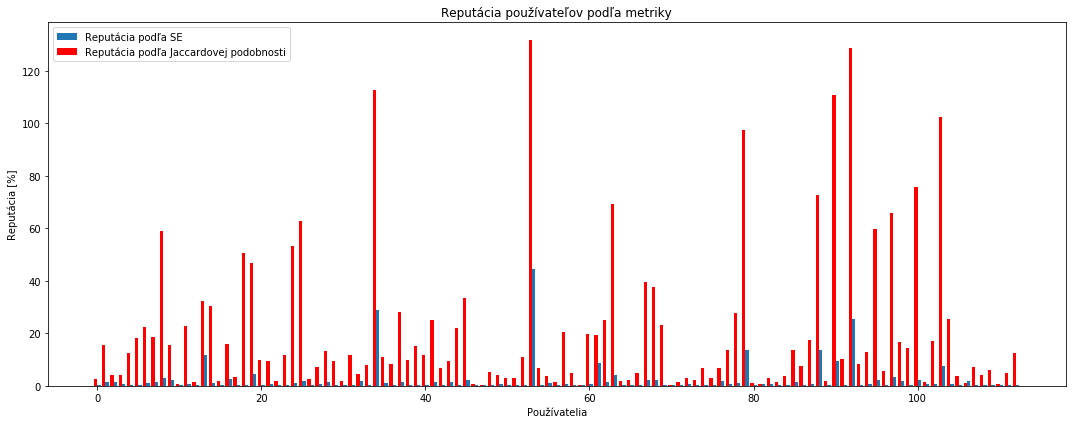

In [197]:
words_jacc_expert = words_overal_jacq_sim.pop('userId1352')

corr_coef = get_corr_coef(expert_user, words_jacc_expert)

scaled_user_rep = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : words_overal_jacq_sim[key]*corr_coef for key in words_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

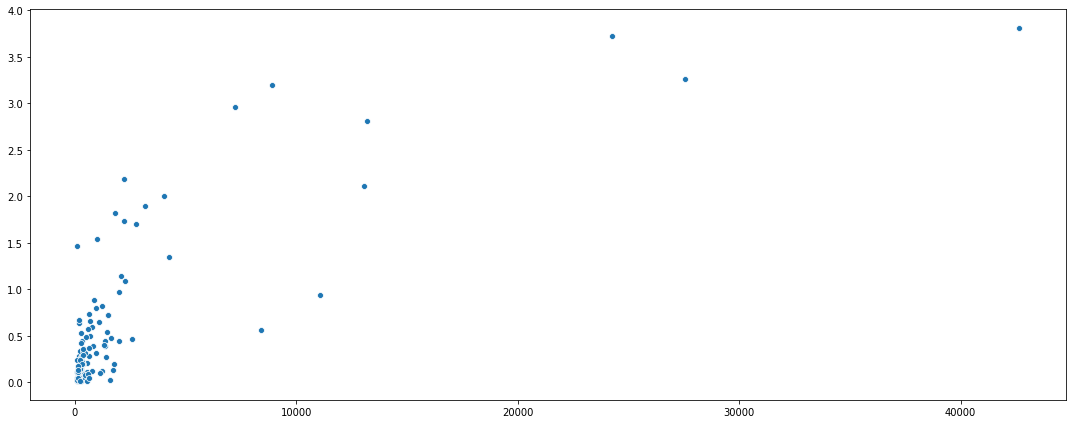

In [198]:
np_words_jacq_sim = np.array(list(words_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_words_jacq_sim)

In [199]:
my_rho = np.corrcoef(np_user_rep, np_words_jacq_sim)
print(my_rho)

[[1.         0.77786543]
 [0.77786543 1.        ]]


In [200]:
print(calculate_order_score(words_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(words_overal_jacq_sim, present_user_rep, corr_coef))

User on correct position: 3
User on wrong position: 110
None
maximal deviation is: 93
93
mean deviation: 18.106194690265486
num of values bellow mean dev: 70
18.106194690265486
order deviation list is: [8, 11, 49, 28, 4, 93, 36, 2, 25, 21, 15, 30, 3, 11, 23, 8, 0, 3, 39, 67, 1, 62, 2, 1, 3, 16, 20, 25, 25, 33, 9, 7, 11, 7, 24, 43, 27, 33, 15, 38, 27, 1, 5, 2, 27, 17, 4, 2, 8, 12, 33, 7, 34, 11, 4, 10, 4, 33, 18, 11, 56, 29, 19, 36, 2, 10, 55, 22, 17, 8, 12, 37, 4, 19, 15, 15, 23, 7, 49, 44, 11, 12, 15, 11, 30, 6, 1, 1, 81, 14, 54, 45, 10, 1, 21, 1, 5, 9, 3, 25, 0, 2, 2, 6, 4, 25, 3, 14, 3, 2, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 8, 'userId48538': 11, 'userId24681': 49, 'userId92366': 28, 'userId282899': -4, 'userId146161': 93, 'userId97556': 36, 'userId125350': -2, 'userId94922': 25, 'userId61731': 21, 'userId54786': 15, 'userId77009': 30, 'userId173159': 3, 'userId48295': -11, 'userId98498': 23, 'userId315606': 8, 'userId6703': 0, 'userId139

Cosine similarity

In [201]:
words_overal_cos_sim = metrics.get_cosine_sim(user_dict_words, merged_book)

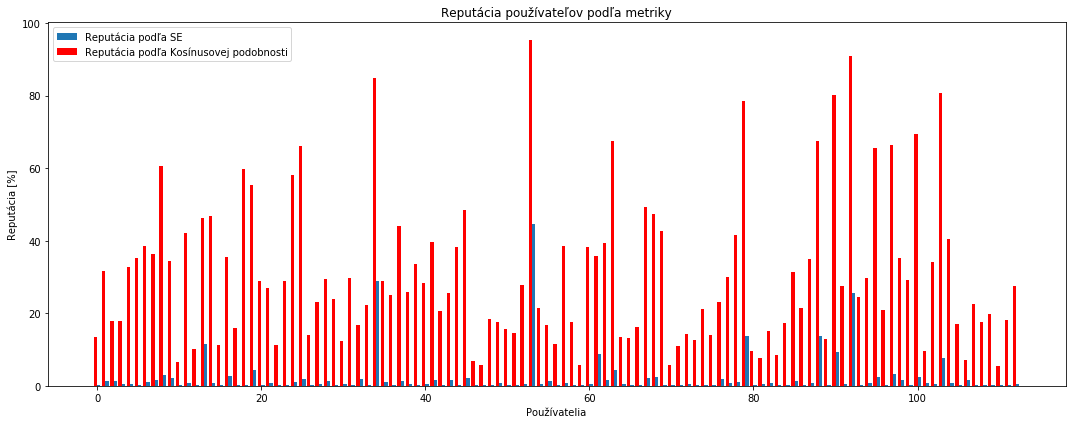

In [202]:
words_cos_expert = words_overal_cos_sim.pop('userId1352')

corr_coef2 = get_corr_coef(expert_user, words_cos_expert)

scaled_user_rep2 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : words_overal_cos_sim[key]*corr_coef2 for key in words_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep2, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

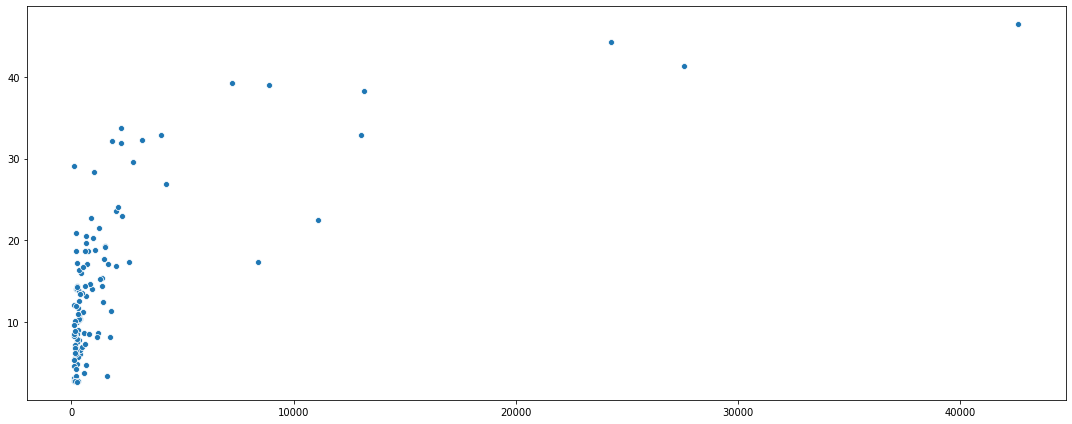

In [203]:
np_words_cos_sim = np.array(list(words_overal_cos_sim.values()))

sb.scatterplot(np_user_rep, np_words_cos_sim)

In [204]:
my_rho = np.corrcoef(np_user_rep, np_words_cos_sim)
print(my_rho)

[[1.         0.66412022]
 [0.66412022 1.        ]]


In [205]:
print(calculate_order_score(words_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(words_overal_cos_sim, present_user_rep, corr_coef2))

User on correct position: 2
User on wrong position: 111
None
maximal deviation is: 94
94
mean deviation: 17.946902654867255
num of values bellow mean dev: 69
17.946902654867255
order deviation list is: [9, 11, 51, 29, 3, 94, 35, 3, 28, 24, 12, 32, 2, 10, 25, 10, 2, 4, 43, 71, 3, 60, 3, 2, 1, 17, 21, 25, 28, 37, 1, 4, 10, 6, 23, 42, 26, 27, 13, 37, 25, 1, 6, 1, 28, 17, 1, 1, 7, 11, 30, 6, 36, 5, 3, 16, 3, 33, 15, 10, 53, 23, 20, 37, 3, 9, 56, 20, 21, 6, 13, 37, 4, 20, 11, 13, 22, 7, 48, 42, 11, 12, 17, 13, 30, 5, 1, 1, 82, 13, 59, 41, 10, 2, 20, 1, 5, 9, 4, 21, 0, 2, 3, 6, 5, 26, 2, 15, 4, 2, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 9, 'userId48538': 11, 'userId24681': 51, 'userId92366': 29, 'userId282899': -3, 'userId146161': 94, 'userId97556': 35, 'userId125350': -3, 'userId94922': 28, 'userId61731': 24, 'userId54786': 12, 'userId77009': 32, 'userId173159': 2, 'userId48295': -10, 'userId98498': 25, 'userId315606': 10, 'userId6703': 2, 'userId139

Euclidean distance

In [206]:
words_overal_euclid_sim = metrics.get_euclid_dis(user_dict_words, merged_book)

In [207]:
# normalizing the score 
# words_overal_euclid_sim = metrics.min_max_normalize(words_overal_euclid_sim)

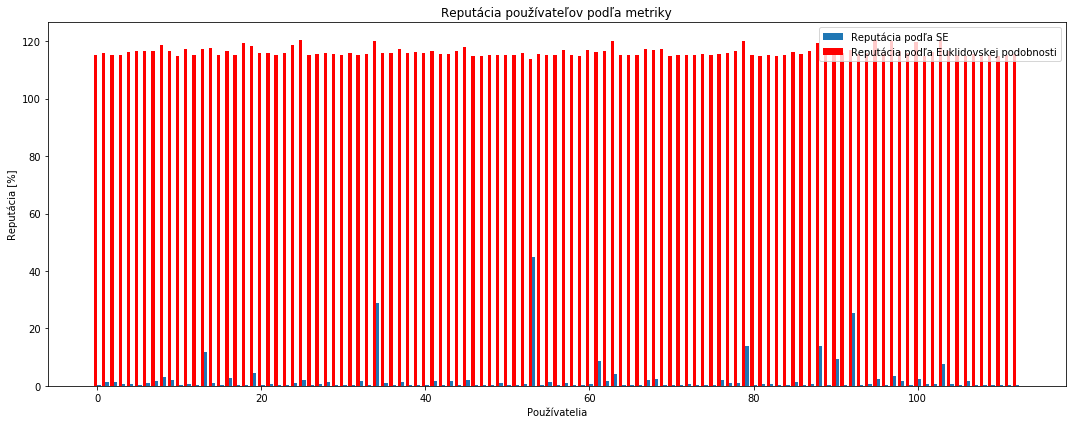

In [208]:
words_euclid_expert = words_overal_euclid_sim.pop('userId1352')

corr_coef3 = get_corr_coef(expert_user, words_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : words_overal_euclid_sim[key]*corr_coef3 for key in words_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

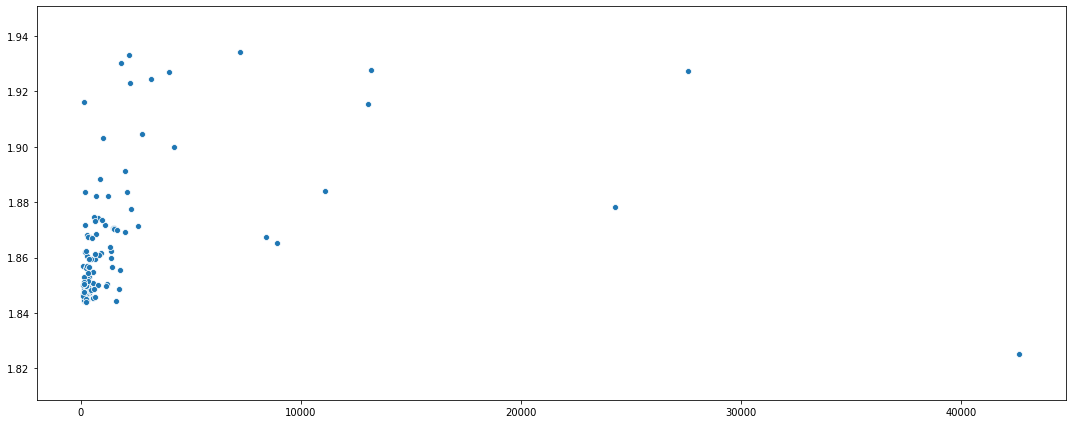

In [209]:
np_words_euclid_sim = np.array(list(words_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_words_euclid_sim)

In [210]:
my_rho = np.corrcoef(np_user_rep, np_words_euclid_sim)
print(my_rho)

[[1.        0.2460316]
 [0.2460316 1.       ]]


In [211]:
print(calculate_order_score(words_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(words_overal_euclid_sim, present_user_rep, corr_coef3))

User on correct position: 3
User on wrong position: 110
None
maximal deviation is: 112
112
mean deviation: 20.24778761061947
num of values bellow mean dev: 71
20.24778761061947
order deviation list is: [12, 14, 54, 32, 1, 99, 36, 5, 31, 29, 12, 37, 2, 6, 26, 13, 7, 4, 50, 77, 1, 64, 1, 3, 1, 17, 22, 26, 27, 41, 13, 1, 11, 2, 23, 42, 28, 21, 11, 33, 24, 4, 8, 2, 31, 15, 0, 3, 9, 11, 26, 4, 34, 2, 8, 19, 5, 31, 15, 8, 51, 20, 28, 34, 2, 6, 56, 20, 25, 9, 19, 37, 7, 25, 7, 13, 25, 9, 45, 43, 14, 10, 19, 14, 30, 3, 5, 4, 85, 9, 63, 39, 18, 6, 15, 0, 15, 8, 7, 15, 2, 5, 5, 3, 8, 29, 34, 10, 5, 0, 18, 3, 112]
******************************
order deviation dict is: {'userId57681': 12, 'userId48538': 14, 'userId24681': 54, 'userId92366': 32, 'userId282899': 1, 'userId146161': 99, 'userId97556': 36, 'userId125350': -5, 'userId94922': 31, 'userId61731': 29, 'userId54786': 12, 'userId77009': 37, 'userId173159': 2, 'userId48295': -6, 'userId98498': 26, 'userId315606': 13, 'userId6703': 7, 'userId1

### Enriched model (accepted answers) testing #6

In [212]:
acc_ans_dict = loading_models.get_list_from_file(dir_path="D:\Skola\Skola-ing\DP\data\parsed_data\\acm_accepted_answers", num_of_files_to_read=453)
model_processing_utils.join_tuples_and_lemantize(acc_ans_dict)
merged_book = model_processing_utils.merge_models(sections_book_dict)
merged_answers = model_processing_utils.merge_models(acc_ans_dict)

100%|██████████| 453/453 [00:00<00:00, 452170.33it/s]


In [213]:
len(merged_answers)

8760

In [214]:
len(merged_book)

10554

In [215]:
enriched_merged_book = model_processing_utils.merge_into_existing_model(merged_book, merged_answers)

In [216]:
len(enriched_merged_book)

18657

#### Phrases

Jaccard similarity

In [217]:
phrases_overal_jacq_sim = { key : metrics.jaccard_similarity(enriched_merged_book, user_dict[key]) for key in user_dict.keys()}

In [218]:
phrases_overal_jacq_sim['userId1352']

5.44936

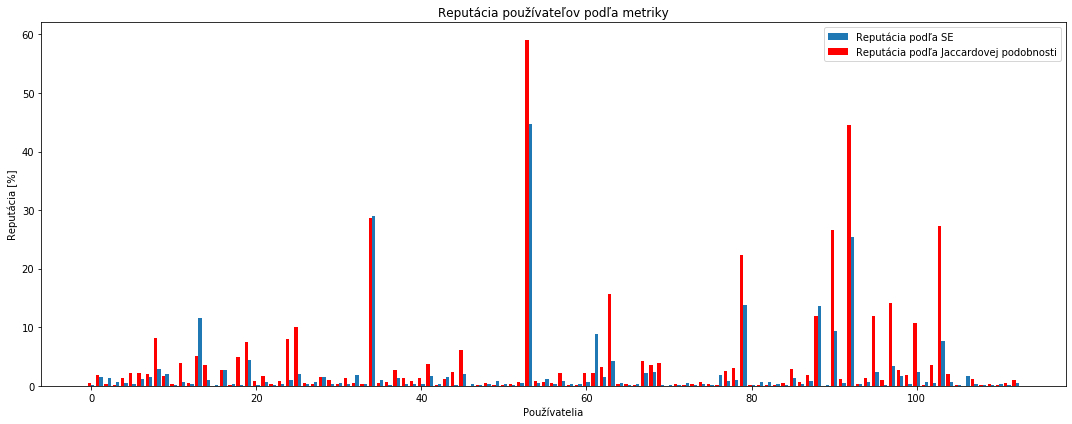

In [219]:
phrases_jacc_expert = phrases_overal_jacq_sim.pop('userId1352')

corr_coef = get_corr_coef(expert_user, phrases_jacc_expert)

scaled_user_rep = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : phrases_overal_jacq_sim[key]*corr_coef for key in phrases_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

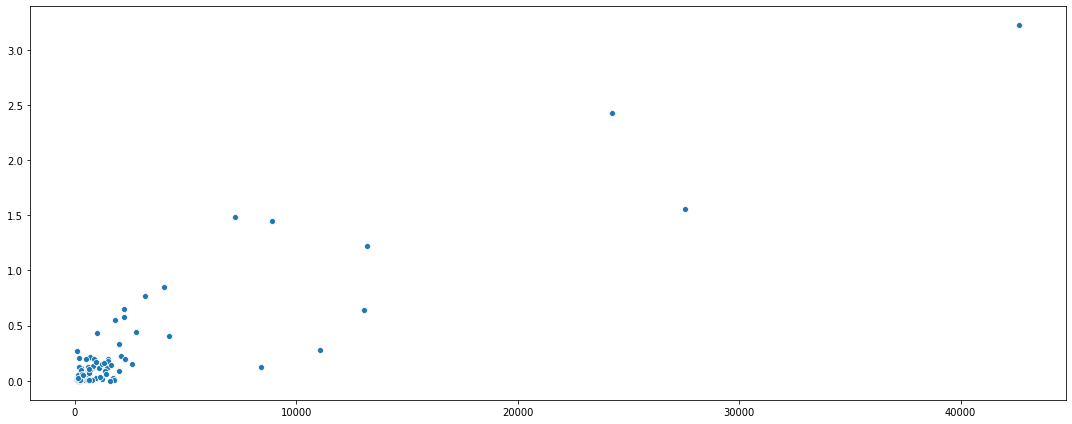

In [220]:
np_user_rep = np.array(list(present_user_rep.values()))
np_phrases_jacq_sim = np.array(list(phrases_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_phrases_jacq_sim)

In [221]:
my_rho = np.corrcoef(np_user_rep, np_phrases_jacq_sim)
print(my_rho)

[[1.         0.90544661]
 [0.90544661 1.        ]]


In [222]:
print(calculate_order_score(phrases_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_jacq_sim, present_user_rep, corr_coef))

User on correct position: 2
User on wrong position: 111
None
maximal deviation is: 90
90
mean deviation: 19.309734513274336
num of values bellow mean dev: 71
19.309734513274336
order deviation list is: [20, 34, 45, 4, 5, 90, 19, 27, 10, 36, 23, 47, 15, 11, 24, 14, 13, 17, 34, 73, 12, 59, 9, 23, 16, 3, 25, 3, 5, 34, 24, 17, 19, 23, 5, 42, 18, 35, 19, 20, 1, 3, 18, 8, 9, 37, 9, 3, 18, 13, 20, 4, 24, 3, 5, 9, 7, 40, 32, 23, 39, 56, 17, 52, 1, 4, 54, 6, 25, 1, 6, 55, 9, 16, 32, 11, 23, 2, 30, 53, 3, 4, 15, 12, 23, 11, 1, 4, 84, 7, 47, 76, 9, 4, 26, 1, 8, 5, 10, 15, 0, 4, 4, 5, 5, 27, 2, 11, 5, 2, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 20, 'userId48538': 34, 'userId24681': 45, 'userId92366': 4, 'userId282899': 5, 'userId146161': 90, 'userId97556': 19, 'userId125350': 27, 'userId94922': 10, 'userId61731': 36, 'userId54786': 23, 'userId77009': 47, 'userId173159': 15, 'userId48295': -11, 'userId98498': 24, 'userId315606': 14, 'userId6703': -13, 'userId

Cosine similarity

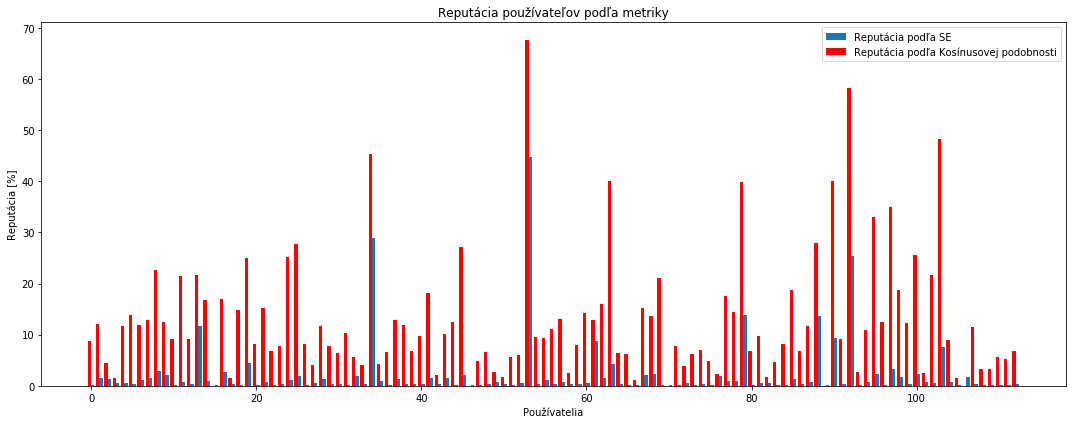

In [223]:
phrases_overal_cos_sim = metrics.get_cosine_sim(user_dict, enriched_merged_book)

phrases_cos_expert = phrases_overal_cos_sim.pop('userId1352')

corr_coef2 = get_corr_coef(expert_user, phrases_cos_expert)

scaled_user_rep2 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : phrases_overal_cos_sim[key]*corr_coef2 for key in phrases_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep2, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

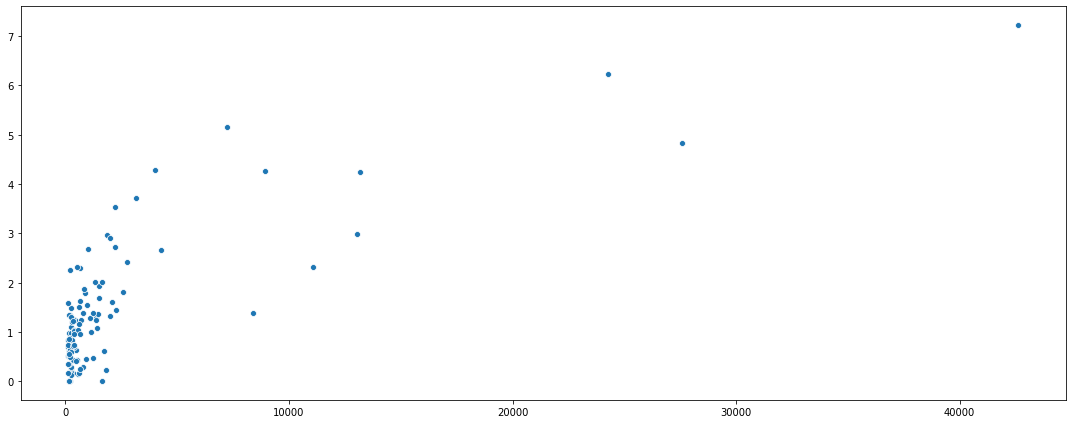

In [224]:
np_cos_sim = np.array(list(phrases_overal_cos_sim.values()))
sb.scatterplot(np_user_rep, np_cos_sim)

In [225]:
my_rho = np.corrcoef(np_user_rep, np_cos_sim)
print(my_rho)

[[1.         0.77026142]
 [0.77026142 1.        ]]


In [226]:
# calculate_order_score(phrases_overal_cos_sim, present_user_rep)
print(calculate_order_score(phrases_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_cos_sim, present_user_rep, corr_coef2))

User on correct position: 4
User on wrong position: 109
None
maximal deviation is: 84
84
mean deviation: 20.849557522123895
num of values bellow mean dev: 69
20.849557522123895
order deviation list is: [41, 45, 34, 4, 21, 78, 12, 48, 9, 39, 16, 62, 28, 11, 13, 14, 13, 17, 31, 74, 13, 53, 10, 28, 26, 1, 25, 12, 0, 32, 25, 17, 21, 23, 20, 45, 8, 34, 7, 8, 23, 4, 22, 0, 6, 37, 26, 8, 20, 10, 15, 6, 18, 11, 1, 10, 25, 38, 37, 38, 2, 55, 19, 54, 2, 20, 53, 15, 26, 3, 8, 55, 17, 14, 52, 7, 23, 8, 22, 56, 3, 10, 15, 13, 24, 10, 0, 3, 84, 3, 60, 79, 10, 8, 22, 11, 8, 3, 19, 11, 3, 4, 6, 5, 6, 29, 1, 11, 5, 3, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 41, 'userId48538': 45, 'userId24681': 34, 'userId92366': 4, 'userId282899': 21, 'userId146161': 78, 'userId97556': 12, 'userId125350': 48, 'userId94922': 9, 'userId61731': 39, 'userId54786': 16, 'userId77009': 62, 'userId173159': 28, 'userId48295': -11, 'userId98498': 13, 'userId315606': 14, 'userId6703': -13

Euclidean distance

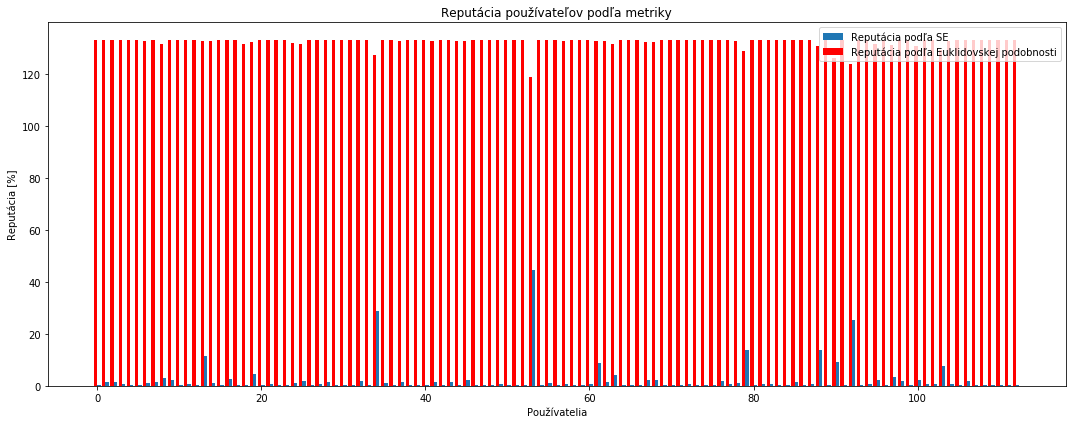

In [227]:
phrases_overal_euclid_sim = metrics.get_euclid_dis(user_dict, enriched_merged_book)

# normalizing the score 
# phrases_overal_euclid_sim = metrics.min_max_normalize(phrases_overal_euclid_sim)

phrases_euclid_expert = phrases_overal_euclid_sim.pop('userId1352')

corr_coef3 = get_corr_coef(expert_user, phrases_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : phrases_overal_euclid_sim[key]*corr_coef3 for key in phrases_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

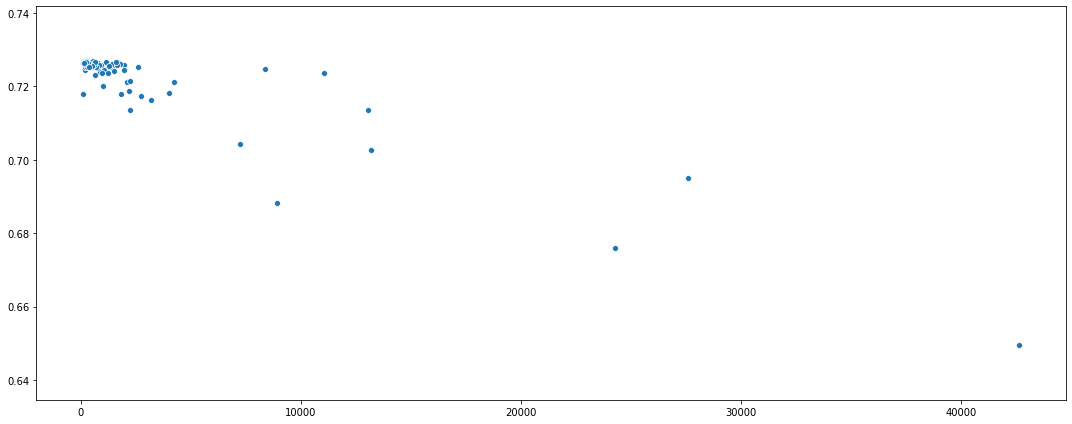

In [228]:
np_euclidean_sim = np.array(list(phrases_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_euclidean_sim)

In [229]:
my_rho = np.corrcoef(np_user_rep, np_euclidean_sim)
print(my_rho)

[[ 1.         -0.91697613]
 [-0.91697613  1.        ]]


In [230]:
print(calculate_order_score(phrases_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_euclid_sim, present_user_rep, corr_coef3))

User on correct position: 1
User on wrong position: 112
None
maximal deviation is: 112
112
mean deviation: 50.424778761061944
num of values bellow mean dev: 58
50.424778761061944
order deviation list is: [108, 105, 66, 75, 103, 6, 60, 102, 75, 79, 74, 74, 89, 90, 61, 75, 77, 69, 49, 13, 77, 4, 74, 72, 78, 73, 66, 20, 76, 22, 35, 40, 25, 49, 71, 3, 17, 0, 5, 71, 71, 36, 32, 20, 4, 34, 12, 14, 11, 5, 50, 21, 47, 19, 2, 7, 7, 30, 17, 1, 52, 15, 27, 18, 14, 5, 28, 49, 37, 33, 41, 2, 18, 51, 28, 55, 62, 50, 13, 1, 59, 39, 37, 50, 28, 55, 63, 63, 1, 34, 21, 27, 82, 67, 46, 80, 83, 90, 81, 60, 91, 93, 90, 87, 99, 77, 104, 88, 102, 105, 109, 108, 112]
******************************
order deviation dict is: {'userId57681': 108, 'userId48538': 105, 'userId24681': 66, 'userId92366': 75, 'userId282899': 103, 'userId146161': 6, 'userId97556': 60, 'userId125350': 102, 'userId94922': 75, 'userId61731': 79, 'userId54786': 74, 'userId77009': 74, 'userId173159': 89, 'userId48295': 90, 'userId98498': 61,

#### Words

In [231]:
user_dict_words = model_processing_utils.join_phrases_into_words(user_dict, "users")
enriched_merged_book = model_processing_utils.join_phrases_into_words(enriched_merged_book)

100%|██████████| 114/114 [00:01<00:00, 59.83it/s]


In [232]:
len(enriched_merged_book)

37314

Jaccard similarity

In [233]:
words_overal_jacq_sim = { key : metrics.jaccard_similarity(enriched_merged_book, user_dict_words[key]) for key in user_dict_words.keys()}

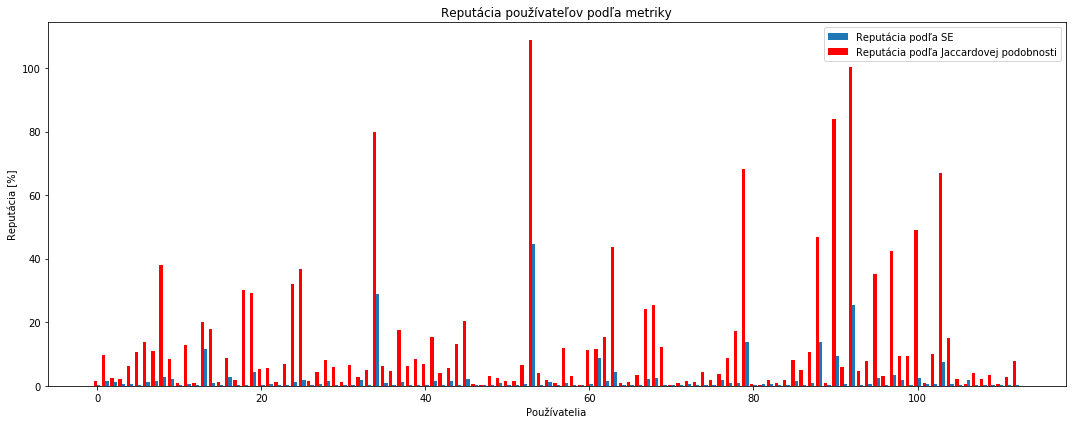

In [234]:
words_jacc_expert = words_overal_jacq_sim.pop('userId1352')

corr_coef = get_corr_coef(expert_user, words_jacc_expert)

scaled_user_rep = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : words_overal_jacq_sim[key]*corr_coef for key in words_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

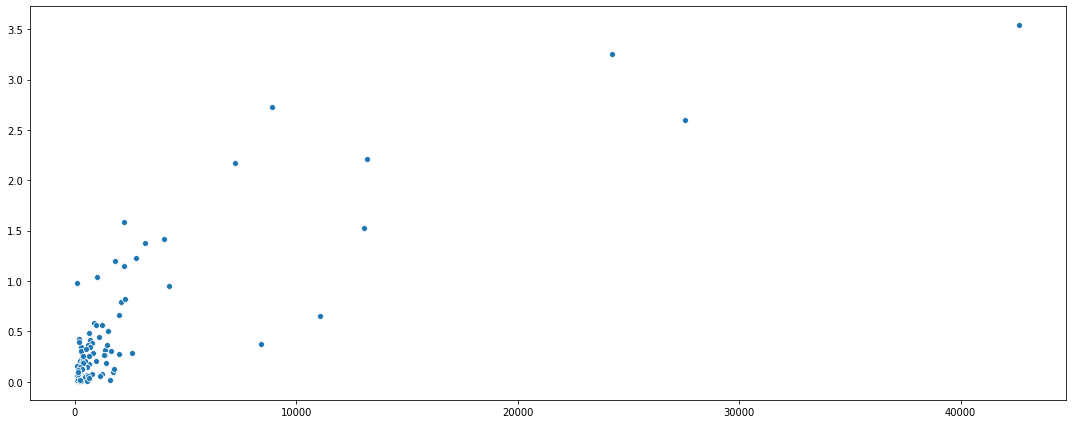

In [235]:
np_words_jacq_sim = np.array(list(words_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_words_jacq_sim)

In [236]:
my_rho = np.corrcoef(np_user_rep, np_words_jacq_sim)
print(my_rho)

[[1.         0.82985154]
 [0.82985154 1.        ]]


In [237]:
print(calculate_order_score(words_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(words_overal_jacq_sim, present_user_rep, corr_coef))

User on correct position: 2
User on wrong position: 111
None
maximal deviation is: 93
93
mean deviation: 18.300884955752213
num of values bellow mean dev: 68
18.300884955752213
order deviation list is: [5, 9, 48, 29, 4, 93, 36, 1, 25, 20, 20, 29, 7, 11, 23, 10, 3, 1, 35, 64, 3, 64, 2, 1, 3, 13, 22, 22, 21, 32, 11, 7, 13, 10, 23, 42, 28, 37, 19, 38, 31, 2, 2, 4, 26, 19, 6, 4, 10, 14, 36, 5, 36, 12, 2, 5, 6, 33, 18, 11, 57, 30, 18, 36, 2, 11, 51, 20, 16, 9, 12, 37, 1, 19, 15, 15, 23, 9, 50, 44, 11, 14, 14, 8, 29, 6, 3, 1, 82, 16, 54, 48, 9, 1, 25, 0, 4, 9, 2, 27, 2, 2, 2, 6, 3, 24, 4, 14, 3, 1, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 5, 'userId48538': 9, 'userId24681': 48, 'userId92366': 29, 'userId282899': -4, 'userId146161': 93, 'userId97556': 36, 'userId125350': 1, 'userId94922': 25, 'userId61731': 20, 'userId54786': 20, 'userId77009': 29, 'userId173159': 7, 'userId48295': -11, 'userId98498': 23, 'userId315606': 10, 'userId6703': -3, 'userId139

Cosine similarity

In [238]:
words_overal_cos_sim = metrics.get_cosine_sim(user_dict_words, enriched_merged_book)

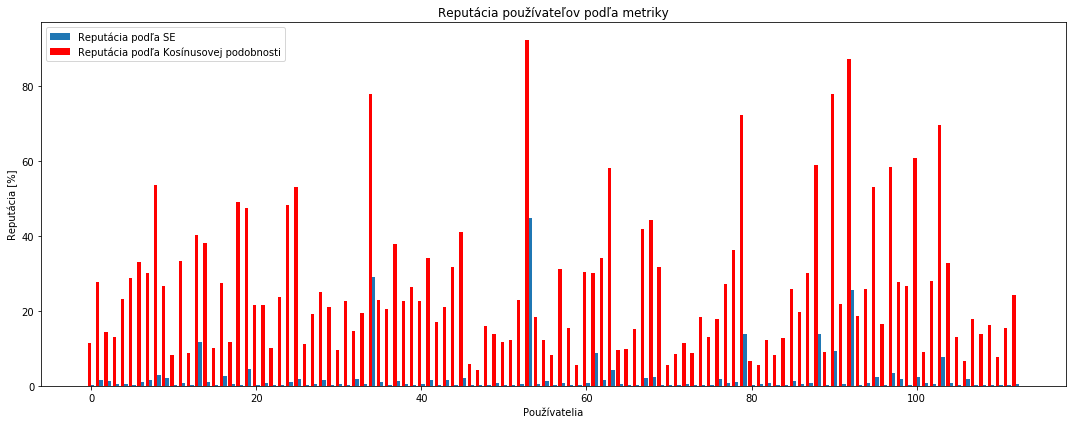

In [239]:
words_cos_expert = words_overal_cos_sim.pop('userId1352')

corr_coef2 = get_corr_coef(expert_user, words_cos_expert)

scaled_user_rep2 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : words_overal_cos_sim[key]*corr_coef2 for key in words_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep2, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

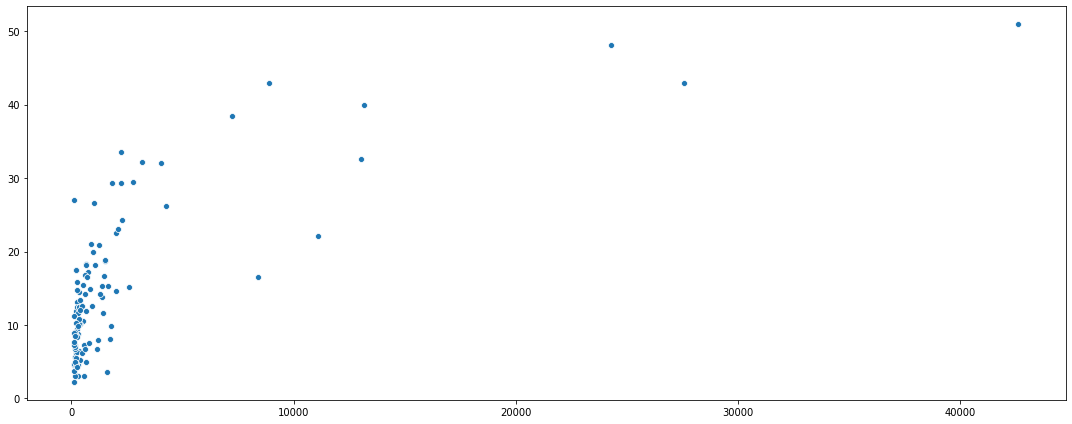

In [240]:
np_words_cos_sim = np.array(list(words_overal_cos_sim.values()))

sb.scatterplot(np_user_rep, np_words_cos_sim)

In [241]:
my_rho = np.corrcoef(np_user_rep, np_words_cos_sim)
print(my_rho)

[[1.         0.71290293]
 [0.71290293 1.        ]]


In [242]:
# calculate_order_score(words_overal_cos_sim, present_user_rep)
print(calculate_order_score(words_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(words_overal_cos_sim, present_user_rep, corr_coef2))

User on correct position: 3
User on wrong position: 110
None
maximal deviation is: 94
94
mean deviation: 18.24778761061947
num of values bellow mean dev: 68
18.24778761061947
order deviation list is: [6, 10, 50, 29, 4, 94, 35, 1, 26, 20, 20, 31, 8, 11, 25, 11, 2, 2, 37, 64, 7, 63, 4, 1, 3, 15, 22, 21, 21, 30, 7, 7, 11, 9, 22, 42, 28, 34, 15, 38, 31, 1, 2, 4, 25, 20, 4, 4, 10, 11, 34, 5, 35, 12, 3, 8, 6, 34, 18, 10, 57, 30, 19, 36, 3, 9, 51, 18, 19, 10, 12, 38, 0, 19, 13, 15, 22, 9, 50, 44, 11, 13, 16, 9, 30, 5, 3, 1, 83, 14, 54, 46, 8, 1, 24, 0, 5, 9, 2, 26, 2, 3, 1, 6, 3, 27, 3, 14, 3, 1, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 6, 'userId48538': 10, 'userId24681': 50, 'userId92366': 29, 'userId282899': -4, 'userId146161': 94, 'userId97556': 35, 'userId125350': 1, 'userId94922': 26, 'userId61731': 20, 'userId54786': 20, 'userId77009': 31, 'userId173159': 8, 'userId48295': -11, 'userId98498': 25, 'userId315606': 11, 'userId6703': -2, 'userId13937

Euclidean distance

In [243]:
words_overal_euclid_sim = metrics.get_euclid_dis(user_dict_words, enriched_merged_book)

In [244]:
# normalizing the score 
# words_overal_euclid_sim = metrics.min_max_normalize(words_overal_euclid_sim)

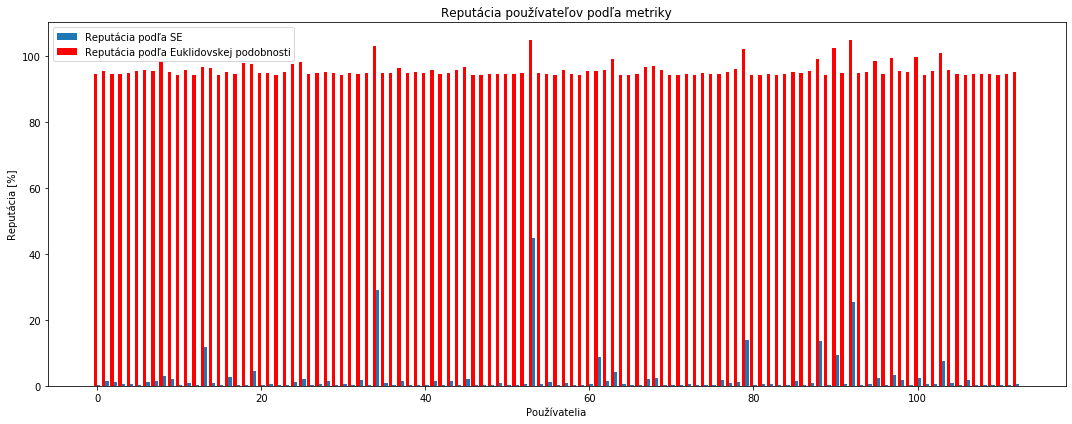

In [245]:
words_euclid_expert = words_overal_euclid_sim.pop('userId1352')

corr_coef3 = get_corr_coef(expert_user, words_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : words_overal_euclid_sim[key]*corr_coef3 for key in words_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

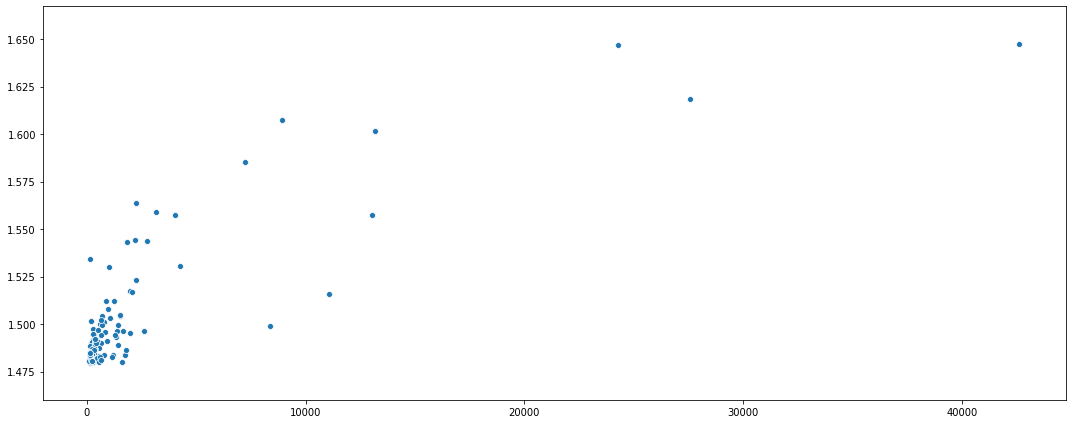

In [246]:
np_words_euclid_sim = np.array(list(words_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_words_euclid_sim)

In [247]:
my_rho = np.corrcoef(np_user_rep, np_words_euclid_sim)
print(my_rho)

[[1.         0.81761702]
 [0.81761702 1.        ]]


In [248]:
print(calculate_order_score(words_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(words_overal_euclid_sim, present_user_rep, corr_coef3))

User on correct position: 2
User on wrong position: 111
None
maximal deviation is: 94
94
mean deviation: 18.31858407079646
num of values bellow mean dev: 68
18.31858407079646
order deviation list is: [6, 11, 50, 29, 4, 94, 35, 1, 26, 20, 21, 31, 8, 10, 25, 11, 2, 2, 37, 65, 7, 62, 4, 2, 2, 15, 25, 21, 21, 30, 7, 7, 11, 8, 23, 42, 28, 33, 15, 37, 31, 1, 2, 4, 25, 21, 4, 4, 12, 9, 33, 5, 36, 12, 3, 8, 6, 34, 18, 10, 56, 31, 19, 35, 4, 9, 51, 18, 19, 11, 12, 38, 0, 19, 13, 15, 21, 9, 51, 44, 11, 14, 16, 9, 30, 6, 3, 1, 83, 14, 54, 46, 8, 2, 23, 1, 6, 9, 2, 26, 1, 4, 1, 5, 3, 27, 3, 14, 4, 1, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 6, 'userId48538': 11, 'userId24681': 50, 'userId92366': 29, 'userId282899': -4, 'userId146161': 94, 'userId97556': 35, 'userId125350': 1, 'userId94922': 26, 'userId61731': 20, 'userId54786': 21, 'userId77009': 31, 'userId173159': 8, 'userId48295': -10, 'userId98498': 25, 'userId315606': 11, 'userId6703': -2, 'userId13937'

### Enriched model (adding the most expert user) testing #7

In [249]:
merged_book = model_processing_utils.merge_models(sections_book_dict)
user_dict = loading_models.get_user_dict_from_file(r"D:/Skola/Skola-ing/DP/data/parsed_data/acm_users/answers")

100%|██████████| 181/181 [00:00<00:00, 201.35it/s]


In [250]:
z_user_score_dict1 = loading_models.get_q_a_dict_from_file("D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\z_scores\z_scores2.txt")
z_user_score_list = list(z_user_score_dict1.keys())
user_dict = { key : val for key, val in user_dict.items() if int(key.split("userId")[1]) in z_user_score_list}
z_user_score_dict1 = { key : val for key, val in z_user_score_dict1.items() if f"userId{key}" in list(user_dict.keys())}

In [251]:
model_processing_utils.join_tuples_and_lemantize(user_dict)

100%|██████████| 114/114 [00:34<00:00,  3.35it/s]


In [252]:
expert_to_enrich = user_dict['userId1352']

In [253]:
len(expert_to_enrich)

19793

In [254]:
len(merged_book)

10554

In [255]:
enriched_merged_book = model_processing_utils.merge_into_existing_model(merged_book, expert_to_enrich)

In [256]:
len(enriched_merged_book)

28027

#### Phrases

Jaccard similarity

In [257]:
present_user_rep = { key : user_rep[key.split('userId')[1]] for key in user_dict.keys()}
len(present_user_rep)

114

In [258]:
phrases_overal_jacq_sim = { key : metrics.jaccard_similarity(enriched_merged_book, user_dict[key]) for key in user_dict.keys()}

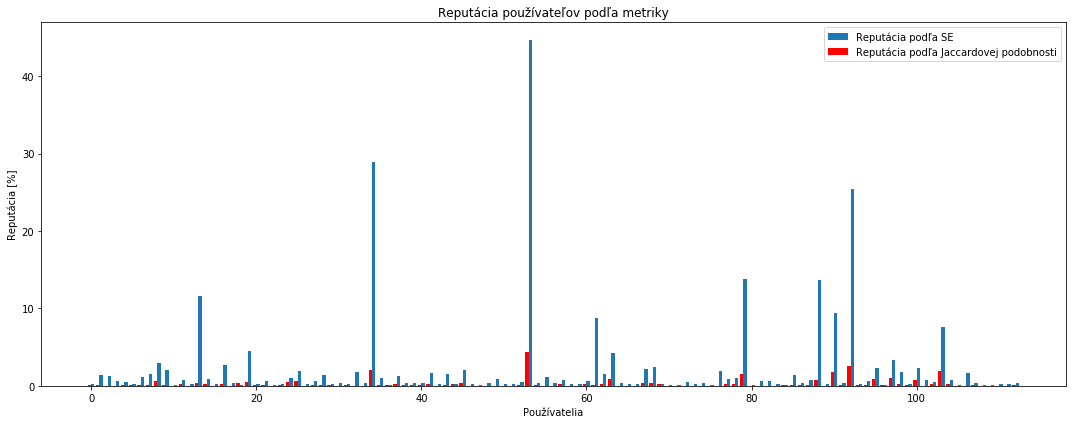

In [259]:
phrases_jacc_expert = phrases_overal_jacq_sim.pop('userId1352')
present_user_rep.pop('userId1352')

corr_coef = get_corr_coef(expert_user, phrases_jacc_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : phrases_overal_jacq_sim[key]*corr_coef for key in phrases_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

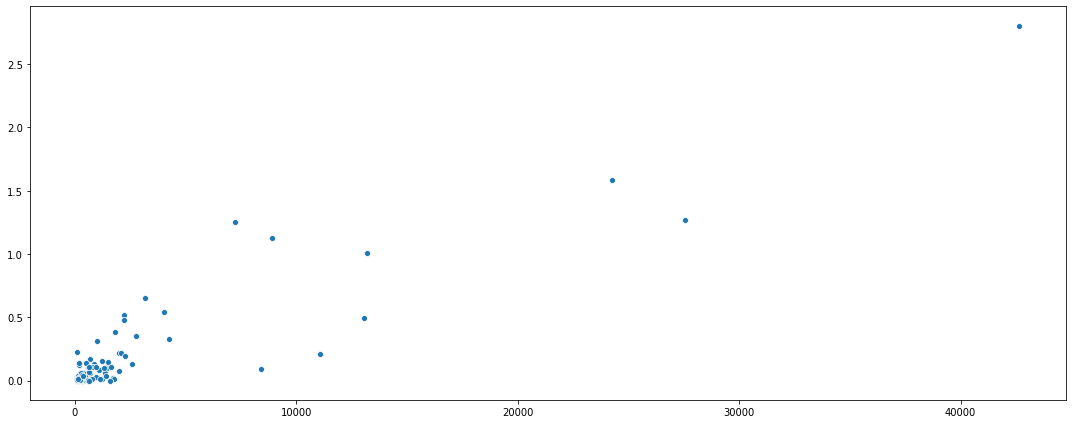

In [260]:
np_user_rep = np.array(list(present_user_rep.values()))
np_phrases_jacq_sim = np.array(list(phrases_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_phrases_jacq_sim)

In [261]:
my_rho = np.corrcoef(np_user_rep, np_phrases_jacq_sim)
print(my_rho)

[[1.         0.91222267]
 [0.91222267 1.        ]]


In [262]:
print(calculate_order_score(phrases_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_jacq_sim, present_user_rep, corr_coef))

User on correct position: 4
User on wrong position: 109
None
maximal deviation is: 92
92
mean deviation: 19.38053097345133
num of values bellow mean dev: 71
19.38053097345133
order deviation list is: [10, 37, 48, 19, 3, 92, 36, 1, 24, 40, 26, 44, 17, 11, 23, 16, 5, 10, 42, 68, 0, 63, 13, 22, 10, 13, 18, 20, 15, 35, 5, 4, 27, 16, 6, 35, 26, 30, 19, 16, 22, 25, 17, 3, 17, 45, 7, 3, 21, 2, 7, 3, 37, 3, 11, 11, 4, 38, 31, 11, 36, 34, 19, 52, 8, 12, 63, 11, 24, 1, 10, 41, 10, 13, 28, 4, 22, 3, 44, 46, 11, 4, 19, 12, 26, 9, 4, 1, 84, 6, 49, 65, 9, 3, 21, 0, 8, 5, 5, 14, 0, 5, 3, 4, 5, 30, 2, 13, 5, 2, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 10, 'userId48538': 37, 'userId24681': 48, 'userId92366': 19, 'userId282899': -3, 'userId146161': 92, 'userId97556': 36, 'userId125350': -1, 'userId94922': 24, 'userId61731': 40, 'userId54786': 26, 'userId77009': 44, 'userId173159': 17, 'userId48295': -11, 'userId98498': 23, 'userId315606': 16, 'userId6703': 5, 'use

Cosine similarity

In [263]:
phrases_overal_cos_sim = metrics.get_cosine_sim(user_dict, enriched_merged_book)

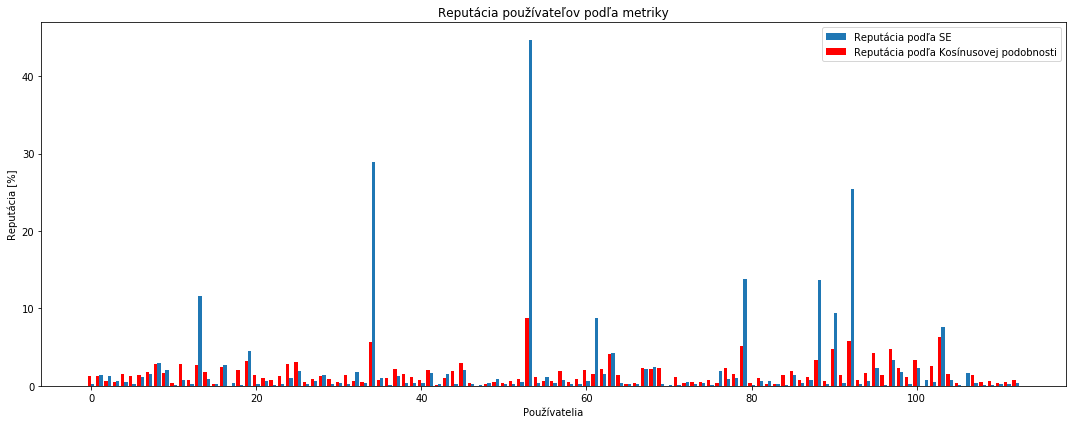

In [264]:
phrases_cos_expert = phrases_overal_cos_sim.pop('userId1352')

corr_coef2 = get_corr_coef(expert_user, phrases_cos_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : phrases_overal_cos_sim[key]*corr_coef2 for key in phrases_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

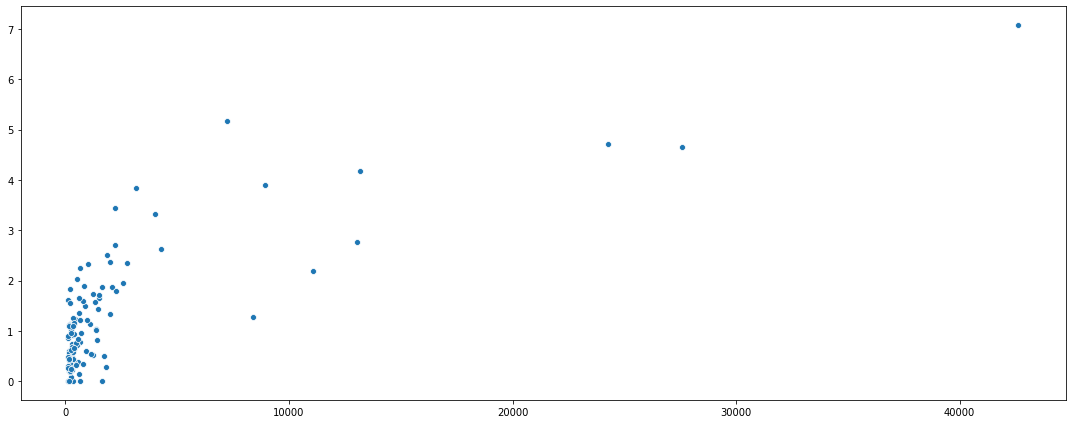

In [265]:
np_cos_sim = np.array(list(phrases_overal_cos_sim.values()))
sb.scatterplot(np_user_rep, np_cos_sim)

In [266]:
my_rho = np.corrcoef(np_user_rep, np_cos_sim)
print(my_rho)

[[1.         0.76676924]
 [0.76676924 1.        ]]


In [267]:
print(calculate_order_score(phrases_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_cos_sim, present_user_rep, corr_coef2))

User on correct position: 4
User on wrong position: 109
None
maximal deviation is: 84
84
mean deviation: 20.424778761061948
num of values bellow mean dev: 73
20.424778761061948
order deviation list is: [16, 52, 50, 11, 3, 78, 26, 6, 17, 57, 27, 52, 28, 11, 15, 18, 15, 9, 51, 70, 2, 59, 15, 39, 3, 16, 15, 15, 16, 36, 12, 3, 27, 16, 5, 23, 24, 19, 9, 6, 10, 31, 22, 17, 10, 45, 19, 9, 26, 6, 17, 4, 29, 9, 16, 18, 8, 38, 36, 13, 9, 37, 23, 57, 13, 16, 63, 4, 28, 12, 12, 51, 20, 6, 33, 3, 21, 9, 42, 44, 7, 0, 23, 22, 34, 7, 0, 3, 84, 2, 56, 76, 8, 6, 18, 5, 9, 5, 10, 6, 2, 5, 2, 2, 7, 30, 1, 12, 5, 1, 0, 2, 0]
******************************
order deviation dict is: {'userId57681': 16, 'userId48538': 52, 'userId24681': 50, 'userId92366': 11, 'userId282899': -3, 'userId146161': 78, 'userId97556': 26, 'userId125350': 6, 'userId94922': 17, 'userId61731': 57, 'userId54786': 27, 'userId77009': 52, 'userId173159': 28, 'userId48295': -11, 'userId98498': 15, 'userId315606': 18, 'userId6703': 15, 'us

Euclidean distance

In [268]:
phrases_overal_euclid_sim = metrics.get_euclid_dis(user_dict, enriched_merged_book)

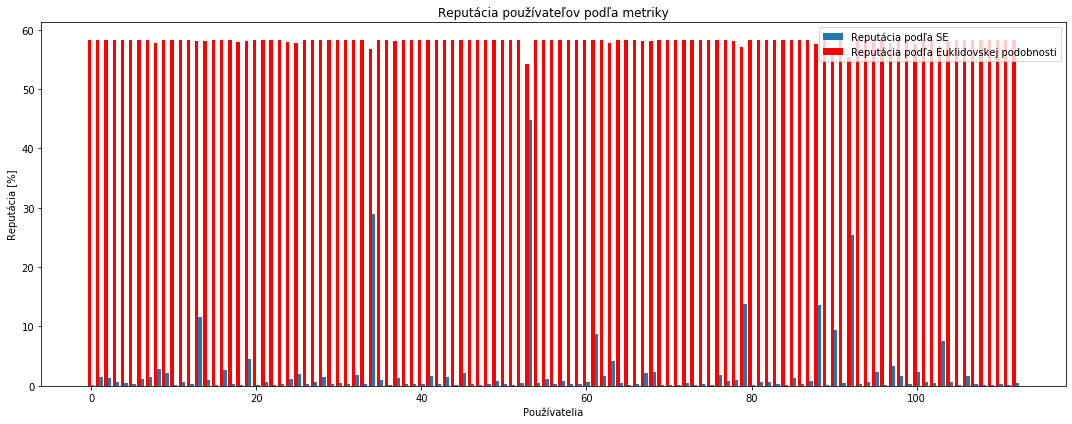

In [269]:
# normalizing the score 
# phrases_overal_euclid_sim = metrics.min_max_normalize(phrases_overal_euclid_sim)

phrases_euclid_expert = phrases_overal_euclid_sim.pop('userId1352')

corr_coef3 = get_corr_coef(expert_user, phrases_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : phrases_overal_euclid_sim[key]*corr_coef3 for key in phrases_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

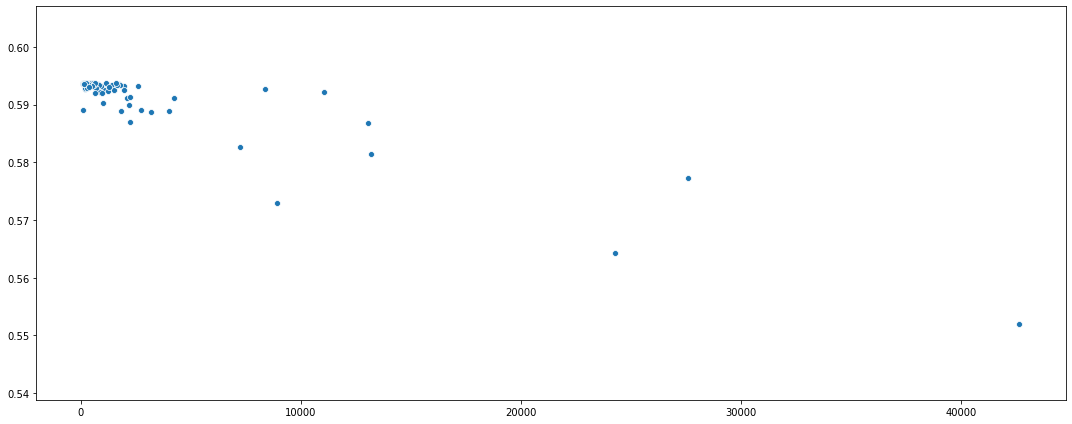

In [270]:
np_euclidean_sim = np.array(list(phrases_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_euclidean_sim)

In [271]:
my_rho = np.corrcoef(np_user_rep, np_euclidean_sim)
print(my_rho)

[[ 1.         -0.91518407]
 [-0.91518407  1.        ]]


In [272]:
print(calculate_order_score(phrases_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_euclid_sim, present_user_rep, corr_coef3))

User on correct position: 1
User on wrong position: 112
None
maximal deviation is: 112
112
mean deviation: 50.35398230088496
num of values bellow mean dev: 55
50.35398230088496
order deviation list is: [105, 109, 68, 77, 98, 7, 61, 92, 76, 97, 75, 75, 89, 91, 61, 78, 91, 74, 54, 10, 74, 6, 65, 85, 68, 70, 71, 21, 70, 22, 36, 43, 20, 49, 66, 5, 21, 6, 3, 70, 63, 28, 34, 11, 0, 32, 12, 12, 14, 11, 61, 20, 44, 19, 1, 10, 6, 31, 16, 5, 52, 17, 23, 16, 8, 12, 23, 49, 31, 36, 34, 2, 11, 53, 28, 56, 62, 51, 5, 2, 58, 41, 39, 51, 35, 50, 61, 64, 2, 29, 22, 28, 82, 69, 47, 79, 83, 90, 81, 54, 89, 93, 93, 88, 99, 77, 104, 86, 102, 105, 109, 108, 112]
******************************
order deviation dict is: {'userId57681': 105, 'userId48538': 109, 'userId24681': 68, 'userId92366': 77, 'userId282899': 98, 'userId146161': 7, 'userId97556': 61, 'userId125350': 92, 'userId94922': 76, 'userId61731': 97, 'userId54786': 75, 'userId77009': 75, 'userId173159': 89, 'userId48295': 91, 'userId98498': 61, 'use

#### Words

In [273]:
user_dict_words = model_processing_utils.join_phrases_into_words(user_dict, "users")
enriched_merged_book = model_processing_utils.join_phrases_into_words(enriched_merged_book)

100%|██████████| 114/114 [00:01<00:00, 61.48it/s]


Jaccard similarity

In [274]:
words_overal_jacq_sim = { key : metrics.jaccard_similarity(enriched_merged_book, user_dict_words[key]) for key in user_dict_words.keys()}

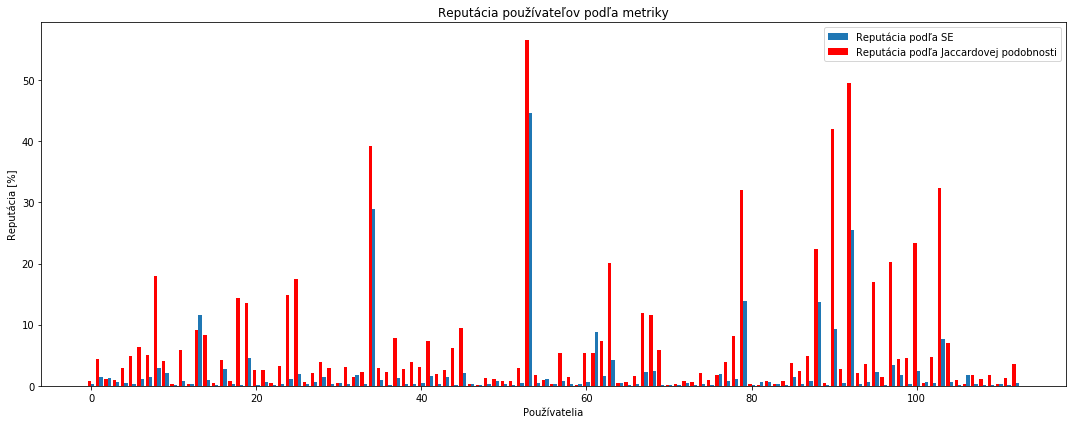

In [275]:
words_jacc_expert = words_overal_jacq_sim.pop('userId1352')

corr_coef = get_corr_coef(expert_user, words_jacc_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : words_overal_jacq_sim[key]*corr_coef for key in words_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

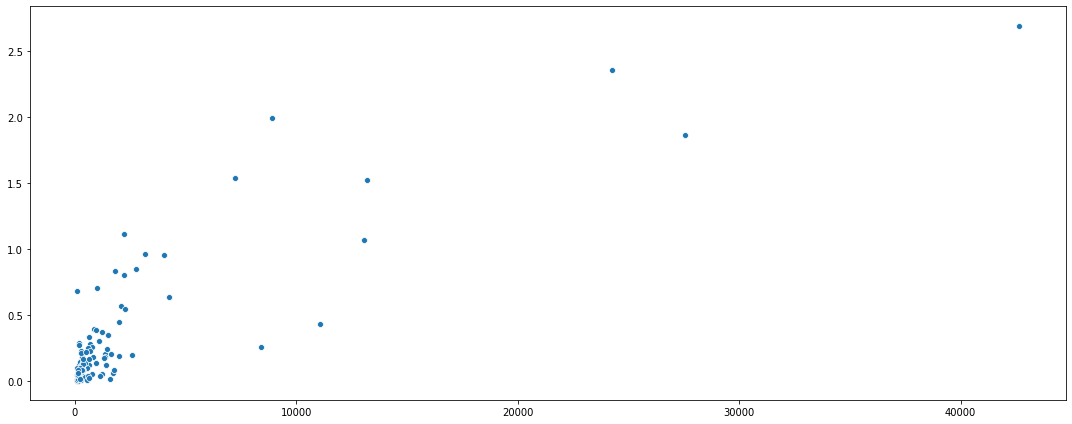

In [276]:
np_words_jacq_sim = np.array(list(words_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_words_jacq_sim)

In [277]:
my_rho = np.corrcoef(np_user_rep, np_words_jacq_sim)
print(my_rho)

[[1.         0.84331549]
 [0.84331549 1.        ]]


In [278]:
print(calculate_order_score(words_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(words_overal_jacq_sim, present_user_rep, corr_coef))

User on correct position: 2
User on wrong position: 111
None
maximal deviation is: 93
93
mean deviation: 18.336283185840706
num of values bellow mean dev: 68
18.336283185840706
order deviation list is: [6, 10, 48, 29, 4, 93, 36, 3, 25, 19, 21, 29, 6, 12, 22, 10, 3, 0, 35, 64, 1, 64, 2, 1, 3, 13, 21, 22, 20, 33, 11, 8, 14, 9, 25, 42, 28, 38, 20, 37, 30, 4, 1, 4, 26, 19, 5, 5, 9, 14, 36, 7, 36, 12, 2, 6, 4, 34, 18, 11, 57, 32, 18, 36, 2, 10, 51, 20, 16, 9, 12, 37, 3, 19, 15, 16, 23, 9, 48, 44, 10, 14, 14, 10, 30, 6, 3, 1, 81, 15, 52, 46, 9, 1, 23, 1, 4, 9, 3, 27, 2, 3, 1, 6, 4, 24, 4, 14, 3, 2, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 6, 'userId48538': 10, 'userId24681': 48, 'userId92366': 29, 'userId282899': -4, 'userId146161': 93, 'userId97556': 36, 'userId125350': -3, 'userId94922': 25, 'userId61731': 19, 'userId54786': 21, 'userId77009': 29, 'userId173159': 6, 'userId48295': -12, 'userId98498': 22, 'userId315606': 10, 'userId6703': -3, 'userId1

Cosine similarity

In [279]:
words_overal_cos_sim = metrics.get_cosine_sim(user_dict_words, enriched_merged_book)

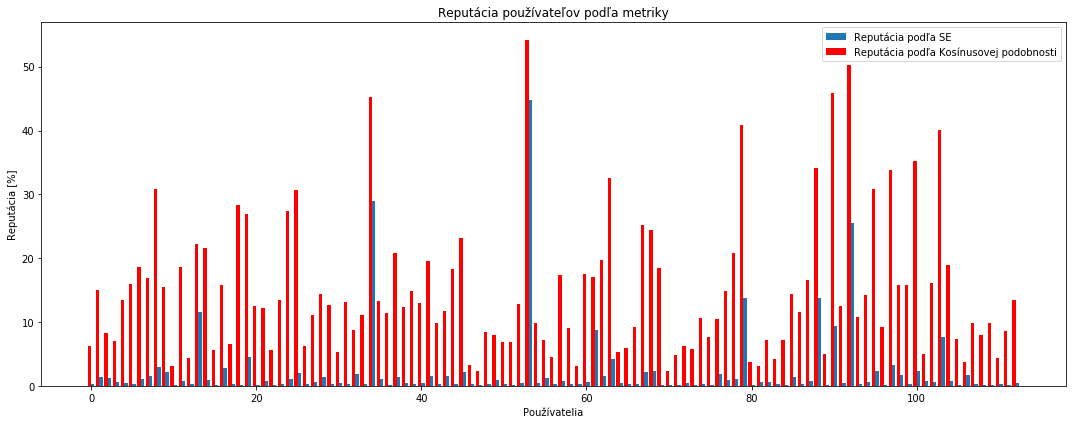

In [280]:
words_cos_expert = words_overal_cos_sim.pop('userId1352')

corr_coef2 = get_corr_coef(expert_user, words_cos_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : words_overal_cos_sim[key]*corr_coef2 for key in words_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

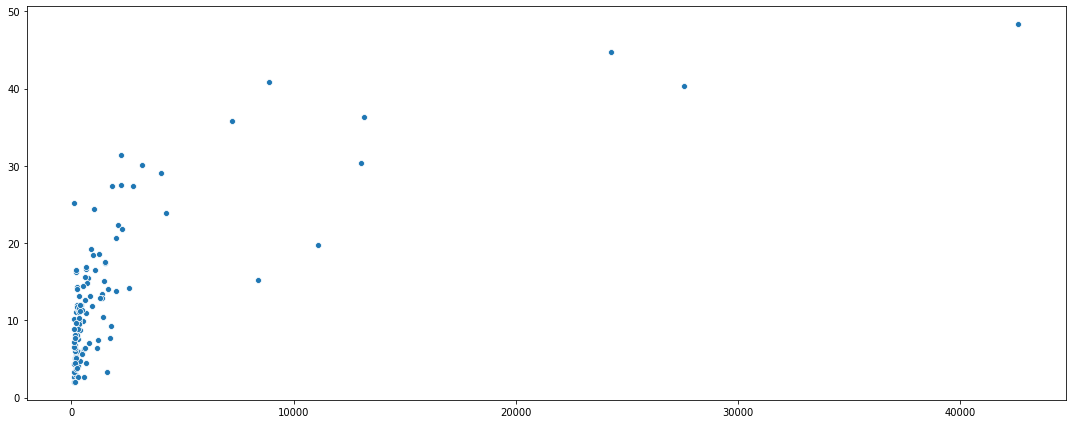

In [281]:
np_words_cos_sim = np.array(list(words_overal_cos_sim.values()))

sb.scatterplot(np_user_rep, np_words_cos_sim)

In [282]:
my_rho = np.corrcoef(np_user_rep, np_words_cos_sim)
print(my_rho)

[[1.         0.71663521]
 [0.71663521 1.        ]]


In [283]:
print(calculate_order_score(words_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(words_overal_cos_sim, present_user_rep, corr_coef2))

User on correct position: 2
User on wrong position: 111
None
maximal deviation is: 94
94
mean deviation: 18.38938053097345
num of values bellow mean dev: 66
18.38938053097345
order deviation list is: [7, 11, 49, 28, 4, 94, 38, 5, 26, 20, 22, 29, 6, 12, 23, 11, 3, 0, 38, 65, 1, 62, 2, 1, 3, 17, 21, 21, 19, 32, 11, 8, 11, 8, 24, 41, 27, 37, 20, 36, 29, 5, 3, 4, 25, 21, 4, 5, 7, 11, 35, 9, 36, 12, 3, 9, 3, 34, 19, 10, 56, 34, 20, 35, 2, 11, 52, 20, 18, 9, 11, 38, 2, 19, 12, 15, 22, 8, 48, 44, 11, 14, 14, 12, 31, 6, 3, 1, 82, 16, 52, 45, 8, 1, 22, 1, 6, 9, 3, 24, 1, 3, 1, 6, 3, 25, 4, 14, 3, 1, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 7, 'userId48538': 11, 'userId24681': 49, 'userId92366': 28, 'userId282899': -4, 'userId146161': 94, 'userId97556': 38, 'userId125350': -5, 'userId94922': 26, 'userId61731': 20, 'userId54786': 22, 'userId77009': 29, 'userId173159': 6, 'userId48295': -12, 'userId98498': 23, 'userId315606': 11, 'userId6703': -3, 'userId139

Euclidean distance

In [284]:
words_overal_euclid_sim = metrics.get_euclid_dis(user_dict_words, enriched_merged_book)

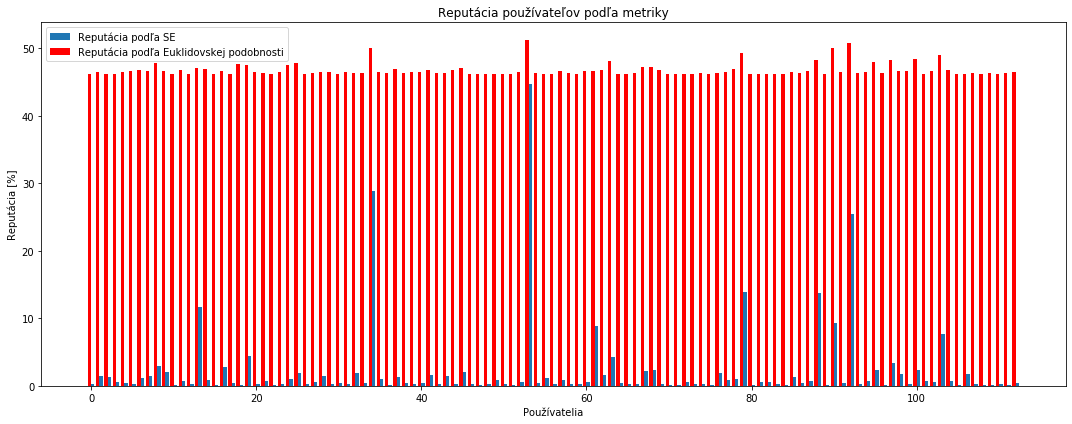

In [285]:
# normalizing the score 
# words_overal_euclid_sim = metrics.min_max_normalize(words_overal_euclid_sim)


words_euclid_expert = words_overal_euclid_sim.pop('userId1352')

corr_coef3 = get_corr_coef(expert_user, words_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : words_overal_euclid_sim[key]*corr_coef3 for key in words_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

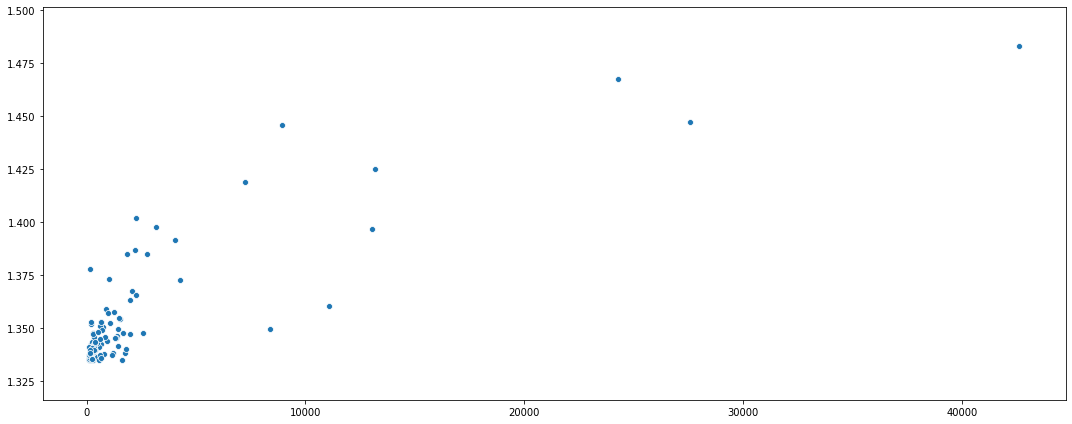

In [286]:
np_words_euclid_sim = np.array(list(words_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_words_euclid_sim)

In [287]:
my_rho = np.corrcoef(np_user_rep, np_words_euclid_sim)
print(my_rho)

[[1.         0.83363352]
 [0.83363352 1.        ]]


In [288]:
print(calculate_order_score(words_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(words_overal_euclid_sim, present_user_rep, corr_coef3))

User on correct position: 3
User on wrong position: 110
None
maximal deviation is: 94
94
mean deviation: 18.336283185840706
num of values bellow mean dev: 66
18.336283185840706
order deviation list is: [7, 11, 49, 28, 4, 94, 39, 5, 26, 21, 22, 30, 6, 12, 24, 11, 3, 0, 38, 66, 1, 62, 2, 2, 2, 17, 23, 21, 18, 32, 10, 8, 10, 8, 25, 40, 28, 36, 20, 35, 29, 5, 2, 4, 25, 21, 3, 5, 7, 11, 34, 8, 37, 9, 3, 10, 3, 34, 19, 9, 55, 34, 20, 34, 2, 11, 52, 19, 19, 9, 11, 38, 2, 19, 11, 15, 22, 7, 50, 44, 11, 13, 15, 12, 31, 6, 3, 1, 82, 15, 53, 45, 9, 1, 22, 1, 6, 9, 3, 23, 0, 4, 1, 6, 3, 25, 3, 14, 4, 1, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 7, 'userId48538': 11, 'userId24681': 49, 'userId92366': 28, 'userId282899': -4, 'userId146161': 94, 'userId97556': 39, 'userId125350': -5, 'userId94922': 26, 'userId61731': 21, 'userId54786': 22, 'userId77009': 30, 'userId173159': 6, 'userId48295': -12, 'userId98498': 24, 'userId315606': 11, 'userId6703': -3, 'userId13

### Enriched model (accepted answers + adding the most expert user) testing #8

In [289]:
acc_ans_dict = loading_models.get_list_from_file(dir_path="D:\Skola\Skola-ing\DP\data\parsed_data\\acm_accepted_answers", num_of_files_to_read=453)
model_processing_utils.join_tuples_and_lemantize(acc_ans_dict)
merged_book = model_processing_utils.merge_models(sections_book_dict)
merged_answers = model_processing_utils.merge_models(acc_ans_dict)

100%|██████████| 453/453 [00:00<00:00, 453032.84it/s]


In [290]:
len(merged_book)

10554

In [291]:
len(merged_answers)

8760

In [292]:
enriched_merged_book = model_processing_utils.merge_into_existing_model(merged_book, merged_answers)

In [293]:
len(enriched_merged_book)

18657

In [294]:
len(expert_to_enrich)

19793

In [295]:
enriched_merged_book = model_processing_utils.merge_into_existing_model(enriched_merged_book, expert_to_enrich)

In [296]:
len(enriched_merged_book)

35246

#### Phrases

Jaccard similarity

In [297]:
present_user_rep = { key : user_rep[key.split('userId')[1]] for key in user_dict.keys()}
len(present_user_rep)

114

In [298]:
phrases_overal_jacq_sim = { key : metrics.jaccard_similarity(enriched_merged_book, user_dict[key]) for key in user_dict.keys()}

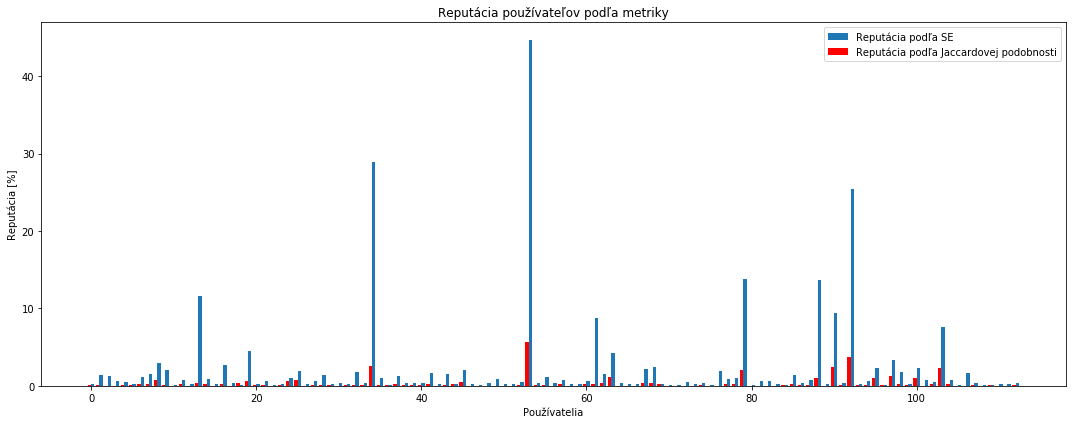

In [299]:
phrases_jacc_expert = phrases_overal_jacq_sim.pop('userId1352')
present_user_rep.pop('userId1352')

corr_coef = get_corr_coef(expert_user, phrases_jacc_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : phrases_overal_jacq_sim[key]*corr_coef for key in phrases_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

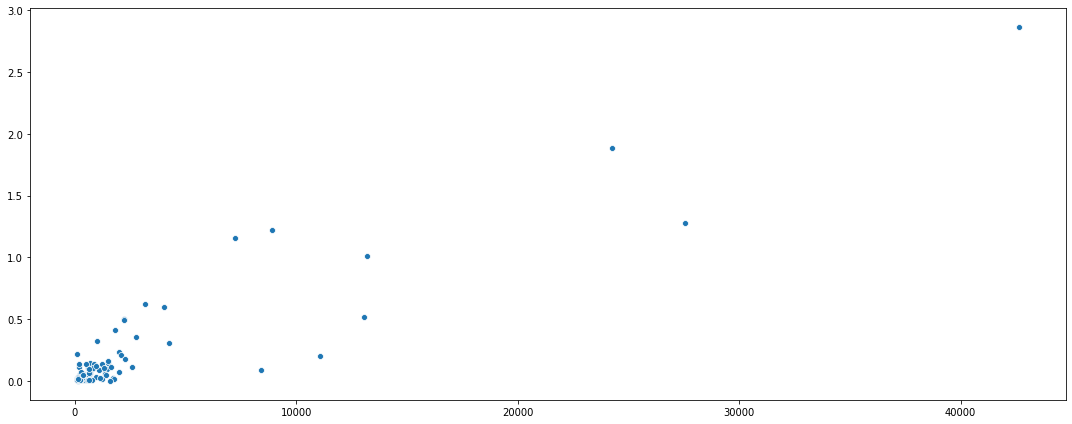

In [300]:
np_user_rep = np.array(list(present_user_rep.values()))
np_phrases_jacq_sim = np.array(list(phrases_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_phrases_jacq_sim)

In [301]:
my_rho = np.corrcoef(np_user_rep, np_phrases_jacq_sim)
print(my_rho)

[[1.         0.91669934]
 [0.91669934 1.        ]]


In [302]:
print(calculate_order_score(phrases_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_jacq_sim, present_user_rep, corr_coef))

User on correct position: 5
User on wrong position: 108
None
maximal deviation is: 91
91
mean deviation: 18.97345132743363
num of values bellow mean dev: 72
18.97345132743363
order deviation list is: [10, 33, 44, 11, 1, 91, 35, 12, 20, 36, 25, 41, 18, 13, 22, 17, 3, 15, 36, 68, 4, 61, 0, 20, 7, 13, 22, 17, 13, 35, 13, 5, 16, 25, 5, 38, 25, 33, 18, 30, 7, 4, 13, 4, 14, 42, 6, 1, 21, 4, 12, 6, 32, 7, 11, 8, 5, 34, 30, 10, 49, 43, 17, 57, 4, 3, 59, 10, 23, 2, 8, 50, 8, 16, 24, 10, 23, 3, 36, 54, 6, 0, 16, 12, 25, 9, 6, 3, 87, 6, 51, 64, 9, 4, 22, 0, 7, 5, 5, 15, 0, 5, 3, 5, 4, 30, 3, 13, 4, 2, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 10, 'userId48538': 33, 'userId24681': 44, 'userId92366': 11, 'userId282899': 1, 'userId146161': 91, 'userId97556': 35, 'userId125350': 12, 'userId94922': 20, 'userId61731': 36, 'userId54786': 25, 'userId77009': 41, 'userId173159': 18, 'userId48295': -13, 'userId98498': 22, 'userId315606': 17, 'userId6703': -3, 'userId13

Cosine similarity

In [303]:
phrases_overal_cos_sim = metrics.get_cosine_sim(user_dict, enriched_merged_book)

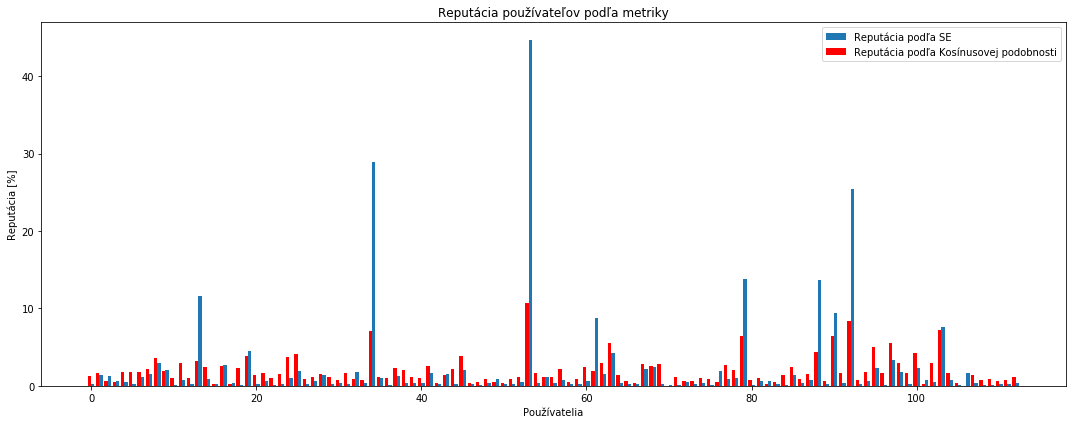

In [304]:
phrases_cos_expert = phrases_overal_cos_sim.pop('userId1352')

corr_coef2 = get_corr_coef(expert_user, phrases_cos_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : phrases_overal_cos_sim[key]*corr_coef2 for key in phrases_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

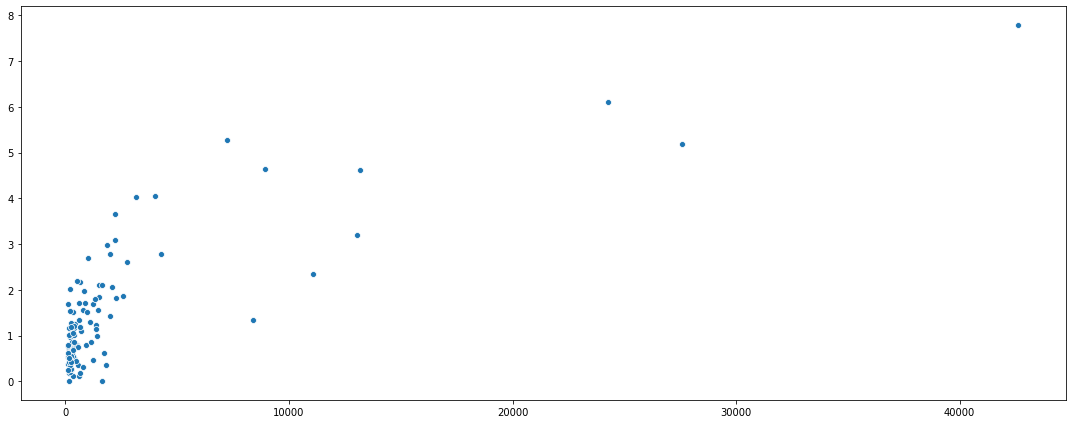

In [305]:
np_cos_sim = np.array(list(phrases_overal_cos_sim.values()))
sb.scatterplot(np_user_rep, np_cos_sim)

In [306]:
my_rho = np.corrcoef(np_user_rep, np_cos_sim)
print(my_rho)

[[1.         0.78716529]
 [0.78716529 1.        ]]


In [307]:
print(calculate_order_score(phrases_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_cos_sim, present_user_rep, corr_coef2))

User on correct position: 2
User on wrong position: 111
None
maximal deviation is: 87
87
mean deviation: 19.946902654867255
num of values bellow mean dev: 70
19.946902654867255
order deviation list is: [26, 46, 41, 5, 11, 76, 24, 33, 17, 46, 24, 52, 27, 13, 9, 14, 1, 13, 39, 71, 2, 57, 1, 30, 11, 11, 20, 1, 10, 35, 20, 15, 25, 24, 4, 36, 23, 30, 10, 7, 11, 10, 16, 6, 8, 43, 19, 11, 29, 7, 6, 11, 28, 3, 14, 15, 10, 38, 37, 14, 19, 49, 21, 60, 9, 1, 61, 2, 26, 9, 9, 60, 17, 11, 30, 1, 22, 5, 29, 59, 2, 4, 21, 14, 30, 5, 6, 0, 87, 4, 57, 78, 9, 7, 19, 4, 8, 5, 12, 11, 3, 4, 4, 4, 6, 31, 2, 11, 5, 2, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 26, 'userId48538': 46, 'userId24681': 41, 'userId92366': 5, 'userId282899': 11, 'userId146161': 76, 'userId97556': 24, 'userId125350': 33, 'userId94922': 17, 'userId61731': 46, 'userId54786': 24, 'userId77009': 52, 'userId173159': 27, 'userId48295': -13, 'userId98498': 9, 'userId315606': 14, 'userId6703': 1, 'user

Euclidean distance

In [308]:
phrases_overal_euclid_sim = metrics.get_euclid_dis(user_dict, enriched_merged_book)

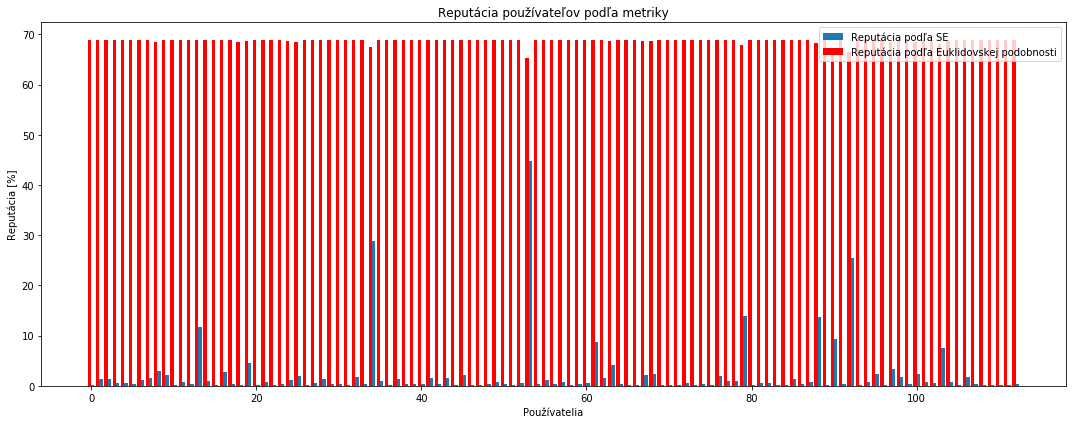

In [309]:
# normalizing the score 
# phrases_overal_euclid_sim = metrics.min_max_normalize(phrases_overal_euclid_sim)

phrases_euclid_expert = phrases_overal_euclid_sim.pop('userId1352')

corr_coef3 = get_corr_coef(expert_user, phrases_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : phrases_overal_euclid_sim[key]*corr_coef3 for key in phrases_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

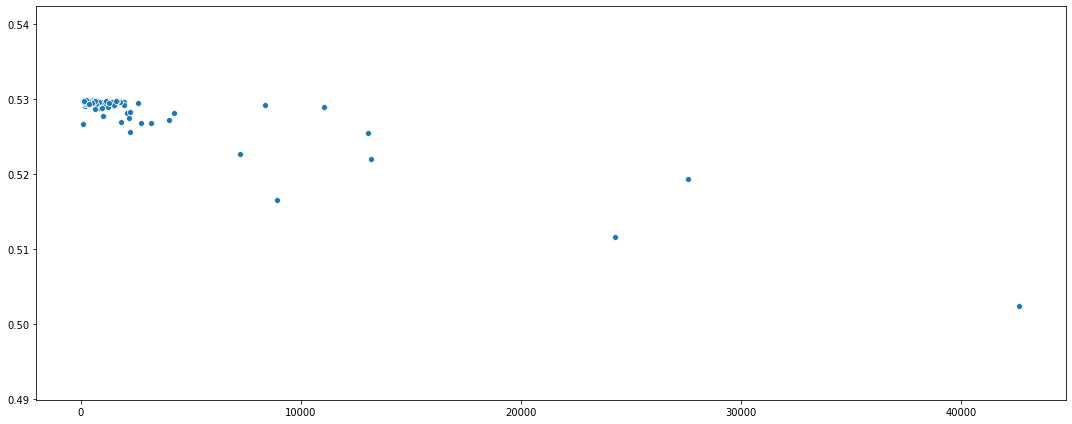

In [310]:
np_euclidean_sim = np.array(list(phrases_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_euclidean_sim)

In [311]:
my_rho = np.corrcoef(np_user_rep, np_euclidean_sim)
print(my_rho)

[[ 1.         -0.91613677]
 [-0.91613677  1.        ]]


In [312]:
print(calculate_order_score(phrases_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_euclid_sim, present_user_rep, corr_coef3))

User on correct position: 0
User on wrong position: 113
None
maximal deviation is: 112
112
mean deviation: 50.10619469026549
num of values bellow mean dev: 56
50.10619469026549
order deviation list is: [106, 108, 65, 76, 101, 3, 59, 100, 75, 90, 74, 77, 92, 85, 59, 75, 84, 69, 50, 16, 73, 4, 70, 79, 73, 69, 70, 18, 73, 22, 30, 39, 18, 49, 69, 1, 18, 4, 3, 69, 70, 36, 32, 15, 5, 30, 9, 9, 23, 11, 61, 30, 43, 22, 3, 8, 8, 30, 12, 3, 52, 15, 22, 15, 11, 4, 23, 49, 31, 40, 38, 2, 8, 53, 27, 56, 62, 53, 13, 1, 59, 37, 39, 53, 32, 49, 60, 64, 3, 17, 24, 32, 81, 65, 45, 80, 83, 90, 81, 57, 90, 92, 90, 87, 99, 78, 104, 85, 102, 105, 109, 108, 112]
******************************
order deviation dict is: {'userId57681': 106, 'userId48538': 108, 'userId24681': 65, 'userId92366': 76, 'userId282899': 101, 'userId146161': 3, 'userId97556': 59, 'userId125350': 100, 'userId94922': 75, 'userId61731': 90, 'userId54786': 74, 'userId77009': 77, 'userId173159': 92, 'userId48295': 85, 'userId98498': 59, 'us

#### Words

In [313]:
user_dict_words = model_processing_utils.join_phrases_into_words(user_dict, "users")
enriched_merged_book = model_processing_utils.join_phrases_into_words(enriched_merged_book)

100%|██████████| 114/114 [00:01<00:00, 57.54it/s]


Jaccard similarity

In [314]:
words_overal_jacq_sim = { key : metrics.jaccard_similarity(enriched_merged_book, user_dict_words[key]) for key in user_dict_words.keys()}

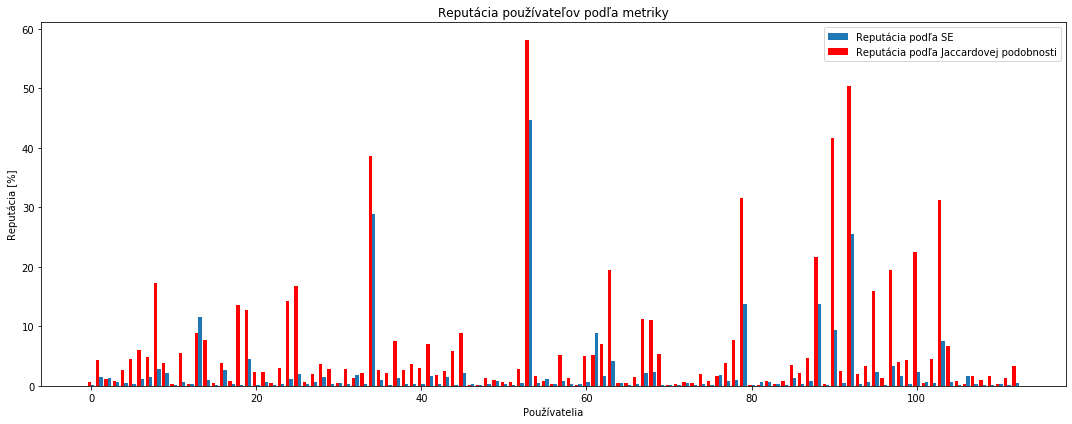

In [315]:
words_jacc_expert = words_overal_jacq_sim.pop('userId1352')

corr_coef = get_corr_coef(expert_user, words_jacc_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : words_overal_jacq_sim[key]*corr_coef for key in words_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

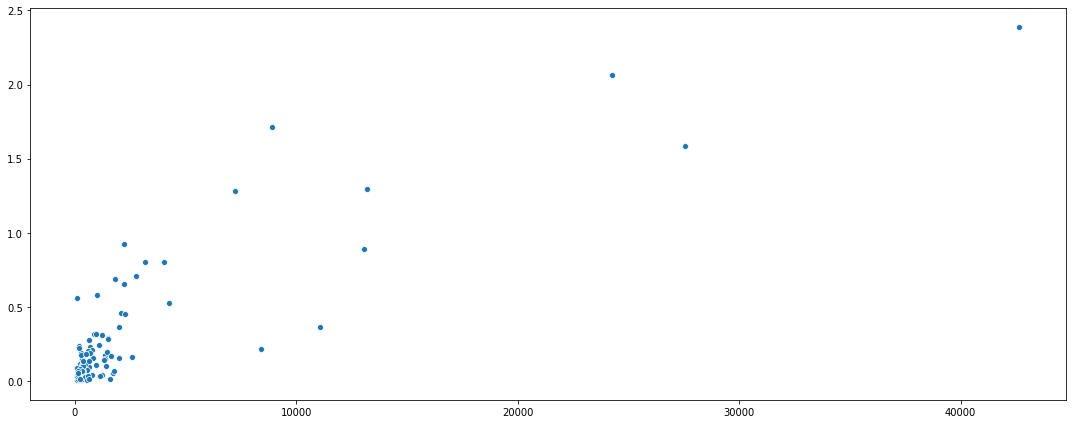

In [316]:
np_words_jacq_sim = np.array(list(words_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_words_jacq_sim)

In [317]:
my_rho = np.corrcoef(np_user_rep, np_words_jacq_sim)
print(my_rho)

[[1.         0.85432135]
 [0.85432135 1.        ]]


In [318]:
print(calculate_order_score(words_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(words_overal_jacq_sim, present_user_rep, corr_coef))

User on correct position: 4
User on wrong position: 109
None
maximal deviation is: 93
93
mean deviation: 18.283185840707965
num of values bellow mean dev: 69
18.283185840707965
order deviation list is: [5, 9, 48, 29, 4, 93, 36, 0, 25, 19, 21, 29, 6, 11, 22, 10, 3, 0, 35, 64, 1, 64, 2, 0, 3, 13, 22, 22, 22, 33, 11, 8, 14, 9, 23, 42, 28, 38, 23, 38, 31, 3, 1, 5, 25, 19, 6, 4, 9, 14, 36, 6, 36, 12, 2, 4, 4, 35, 18, 12, 57, 31, 18, 36, 2, 11, 51, 20, 16, 9, 11, 37, 1, 18, 16, 17, 23, 9, 49, 44, 10, 14, 14, 9, 29, 6, 2, 2, 80, 16, 53, 47, 9, 1, 24, 1, 4, 9, 3, 27, 2, 2, 2, 6, 3, 23, 4, 14, 3, 1, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 5, 'userId48538': 9, 'userId24681': 48, 'userId92366': 29, 'userId282899': -4, 'userId146161': 93, 'userId97556': 36, 'userId125350': 0, 'userId94922': 25, 'userId61731': 19, 'userId54786': 21, 'userId77009': 29, 'userId173159': 6, 'userId48295': -11, 'userId98498': 22, 'userId315606': 10, 'userId6703': -3, 'userId13937

Cosine similarity

In [319]:
words_overal_cos_sim = metrics.get_cosine_sim(user_dict_words, enriched_merged_book)

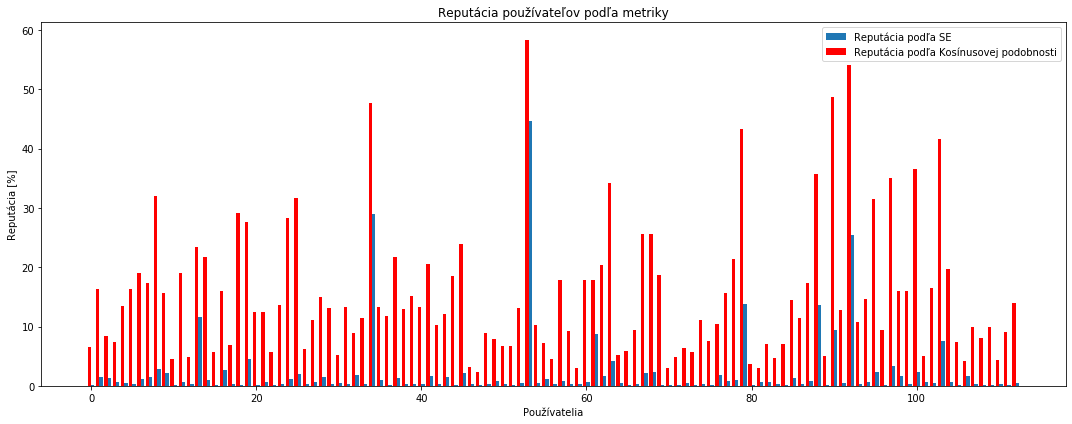

In [320]:
words_cos_expert = words_overal_cos_sim.pop('userId1352')

corr_coef2 = get_corr_coef(expert_user, words_cos_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : words_overal_cos_sim[key]*corr_coef2 for key in words_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

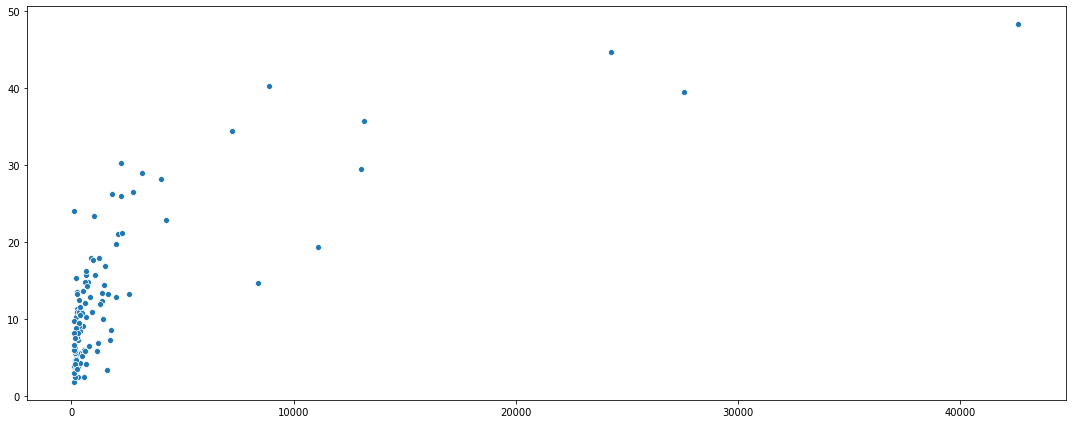

In [321]:
np_words_cos_sim = np.array(list(words_overal_cos_sim.values()))

sb.scatterplot(np_user_rep, np_words_cos_sim)

In [322]:
my_rho = np.corrcoef(np_user_rep, np_words_cos_sim)
print(my_rho)

[[1.         0.73061978]
 [0.73061978 1.        ]]


In [323]:
print(calculate_order_score(words_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(words_overal_cos_sim, present_user_rep, corr_coef2))

User on correct position: 4
User on wrong position: 109
None
maximal deviation is: 94
94
mean deviation: 18.336283185840706
num of values bellow mean dev: 66
18.336283185840706
order deviation list is: [5, 10, 50, 28, 4, 94, 36, 1, 26, 19, 22, 30, 6, 11, 24, 10, 3, 0, 36, 65, 1, 62, 2, 0, 3, 15, 22, 20, 21, 33, 10, 8, 13, 9, 22, 41, 28, 37, 21, 38, 31, 4, 1, 6, 25, 19, 4, 4, 9, 12, 35, 7, 36, 12, 2, 8, 2, 35, 19, 11, 57, 31, 20, 36, 3, 10, 52, 20, 17, 9, 11, 38, 1, 19, 14, 15, 22, 9, 49, 44, 11, 15, 14, 8, 31, 6, 2, 2, 82, 16, 54, 45, 9, 1, 24, 0, 4, 9, 2, 27, 2, 3, 1, 6, 3, 25, 4, 14, 3, 1, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 5, 'userId48538': 10, 'userId24681': 50, 'userId92366': 28, 'userId282899': -4, 'userId146161': 94, 'userId97556': 36, 'userId125350': 1, 'userId94922': 26, 'userId61731': 19, 'userId54786': 22, 'userId77009': 30, 'userId173159': 6, 'userId48295': -11, 'userId98498': 24, 'userId315606': 10, 'userId6703': -3, 'userId139

Euclidean distance

In [324]:
words_overal_euclid_sim = metrics.get_euclid_dis(user_dict_words, enriched_merged_book)

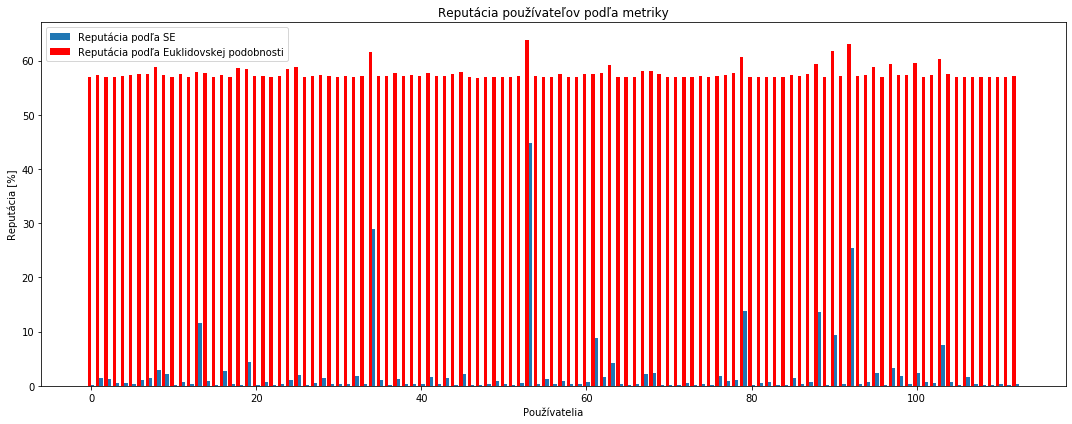

In [325]:
# normalizing the score 
# words_overal_euclid_sim = metrics.min_max_normalize(words_overal_euclid_sim)

words_euclid_expert = words_overal_euclid_sim.pop('userId1352')

corr_coef3 = get_corr_coef(expert_user, words_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : words_overal_euclid_sim[key]*corr_coef3 for key in words_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

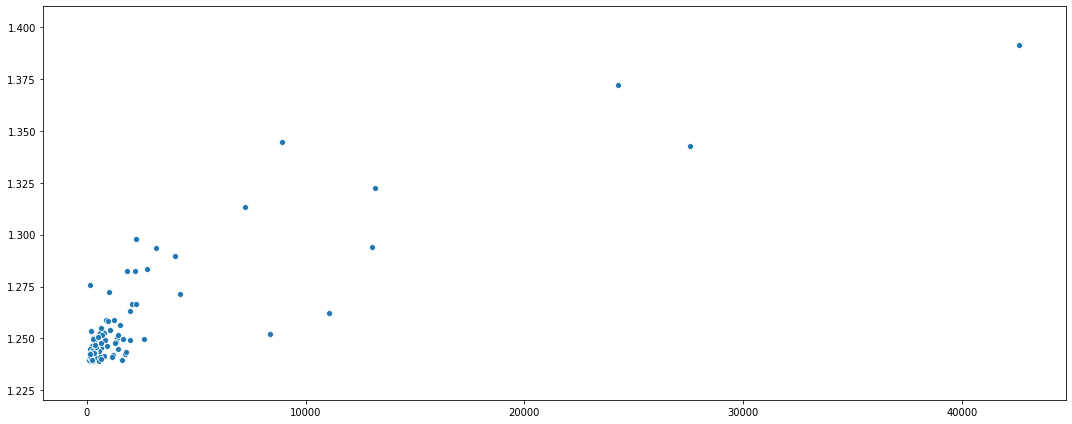

In [326]:
np_words_euclid_sim = np.array(list(words_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_words_euclid_sim)

In [327]:
my_rho = np.corrcoef(np_user_rep, np_words_euclid_sim)
print(my_rho)

[[1.         0.86037598]
 [0.86037598 1.        ]]


In [328]:
print(calculate_order_score(words_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(words_overal_euclid_sim, present_user_rep, corr_coef3))

User on correct position: 5
User on wrong position: 108
None
maximal deviation is: 94
94
mean deviation: 18.31858407079646
num of values bellow mean dev: 67
18.31858407079646
order deviation list is: [5, 11, 50, 28, 4, 94, 37, 1, 26, 20, 22, 30, 6, 10, 24, 11, 3, 0, 36, 65, 1, 62, 2, 0, 3, 15, 25, 20, 21, 32, 10, 8, 12, 8, 23, 41, 28, 35, 21, 37, 31, 4, 0, 6, 25, 21, 4, 4, 9, 11, 34, 6, 37, 12, 2, 8, 2, 35, 19, 11, 56, 31, 20, 35, 3, 10, 52, 20, 18, 10, 11, 38, 1, 18, 12, 15, 22, 8, 51, 44, 12, 15, 14, 8, 31, 7, 2, 2, 82, 15, 54, 45, 9, 1, 24, 0, 4, 9, 2, 26, 2, 3, 1, 6, 3, 25, 4, 14, 3, 1, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 5, 'userId48538': 11, 'userId24681': 50, 'userId92366': 28, 'userId282899': -4, 'userId146161': 94, 'userId97556': 37, 'userId125350': 1, 'userId94922': 26, 'userId61731': 20, 'userId54786': 22, 'userId77009': 30, 'userId173159': 6, 'userId48295': -10, 'userId98498': 24, 'userId315606': 11, 'userId6703': -3, 'userId1393

## Evaluation between books - jls8 vs. JavaNotesForProfessionals

In [329]:
jls8_sections_book_dict = loading_models.get_list_from_file(dir_path="D:/Skola/Skola-ing/DP/data/parsed_data/acm_books/jls8/acm_sub_sections", num_of_files_to_read="all")
java_notes_sections_book_dict = loading_models.get_list_from_file(dir_path="D:/Skola/Skola-ing/DP/data/parsed_data/acm_books/java_notes_for_profesionals/acm_sub_sections", num_of_files_to_read="all")

100%|██████████| 630/630 [00:59<00:00, 10.53it/s]


In [330]:
model_processing_utils.join_tuples_and_lemantize(jls8_sections_book_dict)
model_processing_utils.join_tuples_and_lemantize(java_notes_sections_book_dict)

jls8_merged_book = model_processing_utils.merge_models(jls8_sections_book_dict)
java_notes_merged_book = model_processing_utils.merge_models(java_notes_sections_book_dict)

100%|██████████| 630/630 [00:00<00:00, 633671.83it/s]


#### Phrases

Jaccard similarity

In [331]:
metrics.jaccard_similarity(jls8_merged_book, java_notes_merged_book)

5.28004

Cosine similarity

In [332]:
metrics.cosine_sim(jls8_merged_book, java_notes_merged_book) * 100

1003.265

Euclidean distance

In [333]:
metrics.euclid_dis(jls8_merged_book, java_notes_merged_book)

136.39281506003167

#### Words

In [334]:
jls8_merged_book = model_processing_utils.join_phrases_into_words(jls8_merged_book)
java_notes_merged_book = model_processing_utils.join_phrases_into_words(java_notes_merged_book)

Jaccard similarity

In [335]:
metrics.jaccard_similarity(jls8_merged_book, java_notes_merged_book)

3.28946

Cosine similarity

In [336]:
metrics.cosine_sim(jls8_merged_book, java_notes_merged_book) * 100

5295.849

Euclidean distance

In [337]:
metrics.euclid_dis(jls8_merged_book, java_notes_merged_book)

48.80573736764972

In [338]:
metrics.jaccard_similarity(jls8_merged_book, jls8_merged_book)

5.6984

In [339]:
metrics.jaccard_similarity(java_notes_merged_book, java_notes_merged_book)

7.19346

## Model evaluation - Comibined book (jls8 & JavaNotesForProfessionals)

### Loading the models

In [340]:
from parsing.model_evaluation import loading_models, metrics, ploting, model_processing_utils

In [341]:
jls8_sections_book_dict = loading_models.get_list_from_file(dir_path="D:/Skola/Skola-ing/DP/data/parsed_data/acm_books/jls8/acm_sub_sections", num_of_files_to_read="all")
java_notes_sections_book_dict = loading_models.get_list_from_file(dir_path="D:/Skola/Skola-ing/DP/data/parsed_data/acm_books/java_notes_for_profesionals/acm_sub_sections", num_of_files_to_read="all")
user_dict = loading_models.get_user_dict_from_file(r"D:/Skola/Skola-ing/DP/data/parsed_data/acm_users/answers")
user_rep = loading_models.get_user_reputation_dict_from_file(r"D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\\reputation\user_reputation.txt")

100%|██████████| 181/181 [00:00<00:00, 188.53it/s]


In [342]:
z_user_score_dict1 = loading_models.get_q_a_dict_from_file("D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\z_scores\z_scores2.txt")
z_user_score_list = list(z_user_score_dict1.keys())
user_dict = { key : val for key, val in user_dict.items() if int(key.split("userId")[1]) in z_user_score_list}
z_user_score_dict1 = { key : val for key, val in z_user_score_dict1.items() if f"userId{key}" in list(user_dict.keys())}

In [343]:
print(f"num of user models: {len(user_dict)}, num of user reps: {len(user_rep)}")

num of user models: 114, num of user reps: 13085


### Basic model testing

In [344]:
model_processing_utils.join_tuples_and_lemantize(user_dict)
model_processing_utils.join_tuples_and_lemantize(jls8_sections_book_dict)
model_processing_utils.join_tuples_and_lemantize(java_notes_sections_book_dict)

jls8_merged_book = model_processing_utils.merge_models(jls8_sections_book_dict)
java_notes_merged_book = model_processing_utils.merge_models(java_notes_sections_book_dict)

merged_book = model_processing_utils.merge_into_existing_model(jls8_merged_book, java_notes_merged_book)

present_user_rep = { key : user_rep[key.split('userId')[1]] for key in user_dict.keys()}
len(present_user_rep)

100%|██████████| 630/630 [00:00<00:00, 605502.18it/s]


114

#### Phrases

Jaccard similarity

In [345]:
phrases_overal_jacq_sim = { key : metrics.jaccard_similarity(merged_book, user_dict[key]) for key in user_dict.keys()}

In [346]:
phrases_overal_jacq_sim['userId1352']

4.2484

In [347]:
def calculate_file_size(dir_path):
    files = os.listdir(dir_path)
    files_size = sum(os.stat(os.path.join(dir_path, f)).st_size for f in files)
    return files_size


# using the dictionary create a dataframe and for each user/dir calculate the size of files, sort it and display the df
def get_sorted_file_list_by_size(metric_dict1, root_path):
    df = pd.DataFrame(list(metric_dict1.items()), columns=['UserID', 'Metric score'])
    df['file_size'] = df.apply(lambda x: calculate_file_size(os.path.join(root_path, str(x['UserID']))), axis=1)
    df = df.sort_values(by=['file_size'], ascending=False)
    return df
    

In [348]:
from parsing.model_evaluation.metrics import get_sorted_dicts, calculate_order_score, calculate_max_deviation, calculate_mean_deviation, calculate_total_deviation

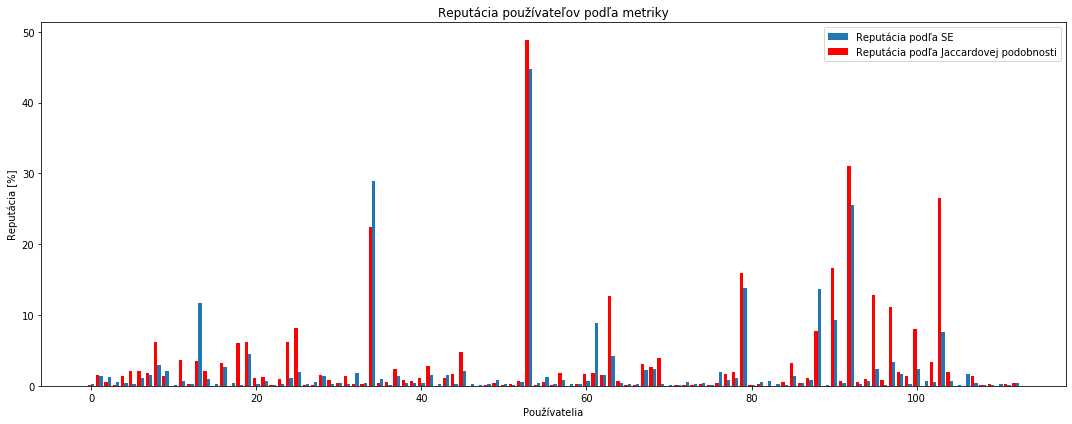

In [349]:
phrases_jacc_expert = phrases_overal_jacq_sim.pop('userId1352')
present_user_rep.pop('userId1352')

corr_coef = get_corr_coef(expert_user, phrases_jacc_expert)

scaled_user_rep = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : phrases_overal_jacq_sim[key]*corr_coef for key in phrases_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

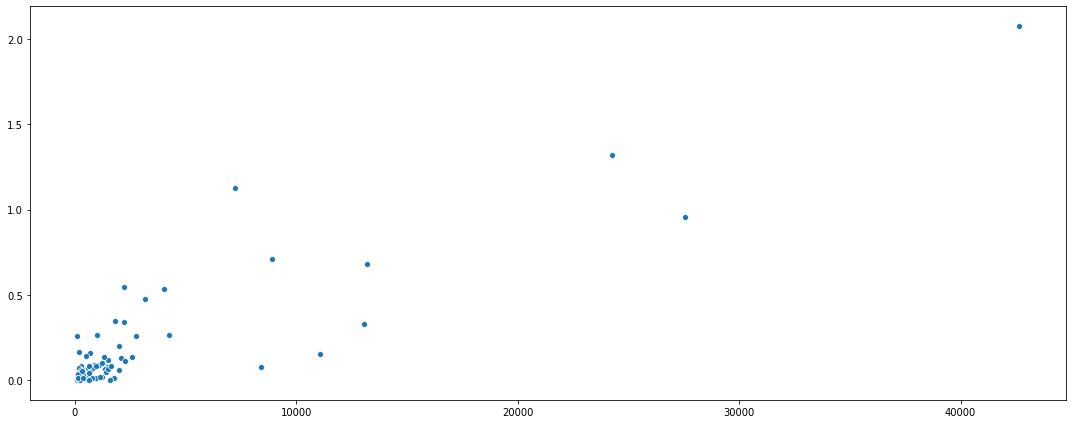

In [350]:
np_user_rep = np.array(list(present_user_rep.values()))
np_phrases_jacq_sim = np.array(list(phrases_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_phrases_jacq_sim)

In [351]:
my_rho = np.corrcoef(np_user_rep, np_phrases_jacq_sim)
print(my_rho)

[[1.         0.89051034]
 [0.89051034 1.        ]]


In [352]:
print(calculate_order_score(phrases_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_jacq_sim, present_user_rep, corr_coef))

User on correct position: 3
User on wrong position: 110
None
maximal deviation is: 92
92
mean deviation: 18.97345132743363
num of values bellow mean dev: 68
18.97345132743363
order deviation list is: [30, 25, 48, 9, 1, 92, 29, 7, 23, 42, 19, 47, 9, 6, 22, 23, 6, 16, 46, 76, 8, 53, 3, 4, 2, 16, 22, 22, 14, 40, 12, 25, 29, 10, 3, 48, 24, 30, 18, 0, 16, 25, 24, 10, 8, 43, 14, 4, 9, 13, 5, 34, 6, 12, 1, 15, 2, 30, 34, 44, 20, 41, 13, 55, 5, 0, 55, 15, 26, 8, 8, 26, 4, 11, 32, 5, 23, 8, 30, 32, 6, 10, 9, 11, 21, 6, 15, 1, 75, 8, 56, 47, 11, 3, 26, 6, 10, 5, 11, 9, 2, 3, 3, 3, 6, 28, 2, 14, 7, 2, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 30, 'userId48538': 25, 'userId24681': 48, 'userId92366': 9, 'userId282899': 1, 'userId146161': 92, 'userId97556': 29, 'userId125350': -7, 'userId94922': 23, 'userId61731': 42, 'userId54786': 19, 'userId77009': 47, 'userId173159': 9, 'userId48295': -6, 'userId98498': 22, 'userId315606': 23, 'userId6703': -6, 'userId13937

Checking if our model isnt biased by the size of user models

In [353]:
df = get_sorted_file_list_by_size(phrases_overal_jacq_sim, "D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\\answers")

In [354]:
df.head(20)

,UserID,Metric score,file_size
53,userId3249,2.07625,192201
92,userId7167,1.31899,110915
90,userId7080,0.70877,79009
34,userId2314,0.95456,70386
103,userId90992,1.12846,54876
79,userId5692,0.67960,51428
100,userId8500,0.34135,26354
88,userId66,0.33103,26119
97,userId79256,0.47526,25411
63,userId39690,0.53618,22454


Doesnt look like it - first 3 positions match but the rest not 

Cosine similarity

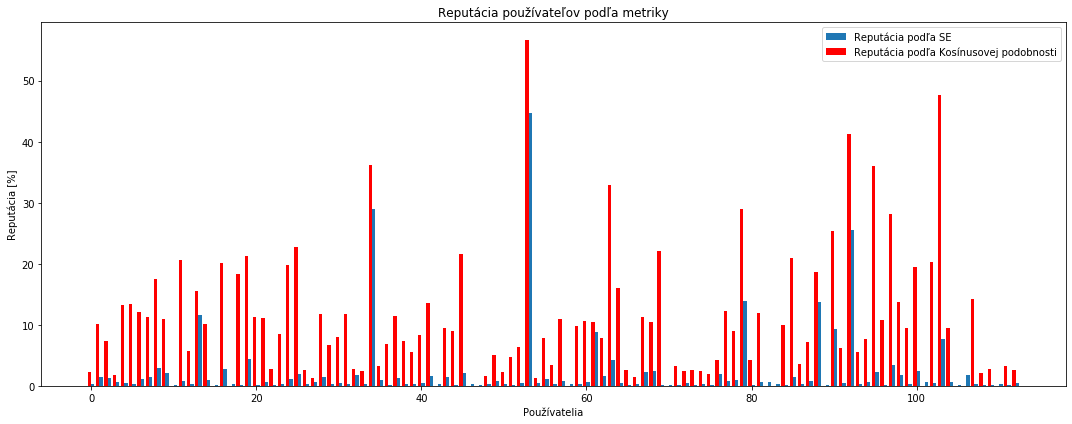

In [355]:
phrases_overal_cos_sim = metrics.get_cosine_sim(user_dict, merged_book)

phrases_cos_expert = phrases_overal_cos_sim.pop('userId1352')

corr_coef2 = get_corr_coef(expert_user, phrases_cos_expert)

scaled_user_rep2 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : phrases_overal_cos_sim[key]*corr_coef2 for key in phrases_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep2, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

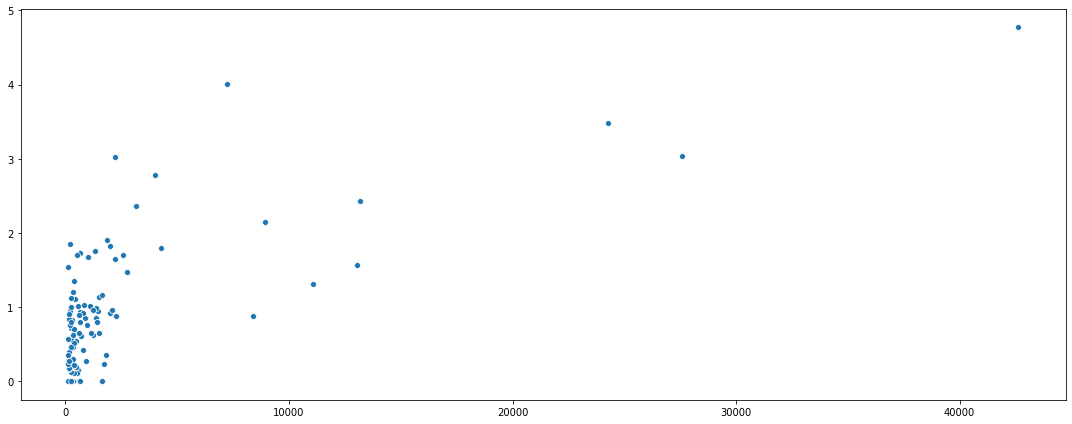

In [356]:
np_cos_sim = np.array(list(phrases_overal_cos_sim.values()))
sb.scatterplot(np_user_rep, np_cos_sim)

In [357]:
my_rho = np.corrcoef(np_user_rep, np_cos_sim)
print(my_rho)

[[1.         0.70141593]
 [0.70141593 1.        ]]


In [358]:
print(calculate_order_score(phrases_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_cos_sim, present_user_rep, corr_coef2))

User on correct position: 3
User on wrong position: 110
None
maximal deviation is: 87
87
mean deviation: 21.20353982300885
num of values bellow mean dev: 67
21.20353982300885
order deviation list is: [40, 34, 47, 9, 1, 87, 25, 7, 13, 56, 10, 60, 20, 6, 22, 26, 6, 16, 57, 83, 9, 39, 6, 1, 3, 16, 22, 16, 14, 51, 13, 25, 29, 10, 11, 50, 22, 26, 10, 25, 3, 23, 46, 18, 0, 43, 20, 9, 3, 8, 40, 35, 4, 23, 8, 29, 9, 33, 39, 44, 21, 42, 8, 55, 11, 9, 55, 6, 30, 19, 3, 29, 11, 7, 40, 16, 19, 5, 23, 27, 2, 18, 3, 16, 22, 9, 32, 1, 75, 2, 57, 52, 11, 8, 22, 18, 12, 3, 29, 3, 9, 4, 5, 3, 7, 37, 2, 18, 15, 3, 0, 2, 0]
******************************
order deviation dict is: {'userId57681': 40, 'userId48538': 34, 'userId24681': 47, 'userId92366': 9, 'userId282899': 1, 'userId146161': 87, 'userId97556': 25, 'userId125350': -7, 'userId94922': 13, 'userId61731': 56, 'userId54786': 10, 'userId77009': 60, 'userId173159': 20, 'userId48295': -6, 'userId98498': 22, 'userId315606': 26, 'userId6703': -6, 'userI

Euclidean distance

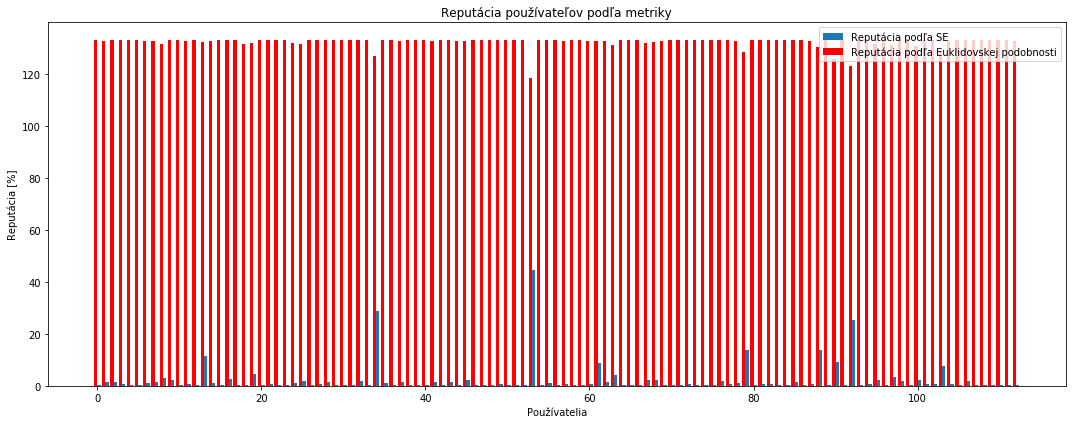

In [359]:
phrases_overal_euclid_sim = metrics.get_euclid_dis(user_dict, merged_book)

# normalizing the score 
# phrases_overal_euclid_sim = metrics.min_max_normalize(phrases_overal_euclid_sim)

phrases_euclid_expert = phrases_overal_euclid_sim.pop('userId1352')

corr_coef3 = get_corr_coef(expert_user, phrases_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : phrases_overal_euclid_sim[key]*corr_coef3 for key in phrases_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

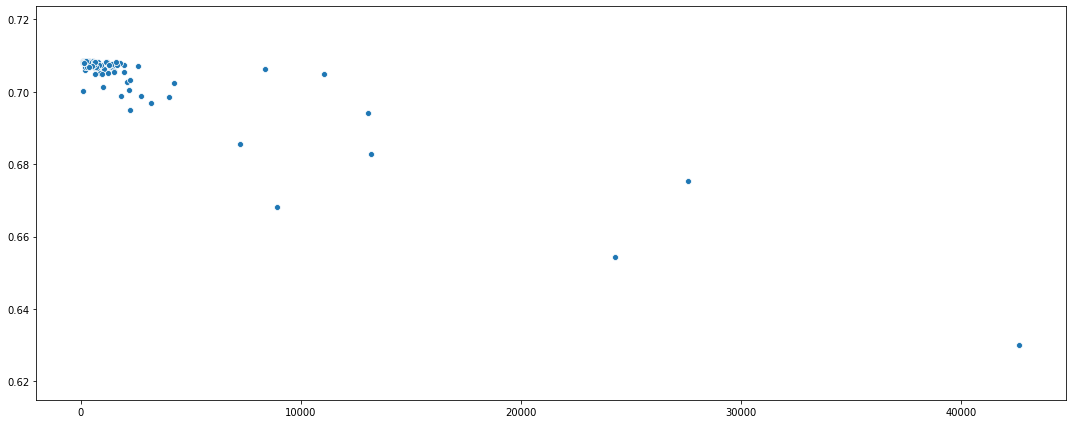

In [360]:
np_euclidean_sim = np.array(list(phrases_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_euclidean_sim)

In [361]:
my_rho = np.corrcoef(np_user_rep, np_euclidean_sim)
print(my_rho)

[[ 1.         -0.91705343]
 [-0.91705343  1.        ]]


In [362]:
print(calculate_order_score(phrases_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_euclid_sim, present_user_rep, corr_coef3))

User on correct position: 1
User on wrong position: 112
None
maximal deviation is: 112
112
mean deviation: 50.63716814159292
num of values bellow mean dev: 54
50.63716814159292
order deviation list is: [109, 103, 68, 75, 103, 7, 60, 95, 75, 86, 71, 71, 86, 95, 60, 76, 84, 72, 53, 14, 73, 5, 70, 61, 66, 69, 73, 28, 73, 25, 38, 41, 27, 53, 69, 3, 20, 0, 7, 71, 66, 32, 33, 17, 3, 34, 16, 11, 4, 6, 61, 12, 53, 18, 3, 10, 3, 31, 19, 2, 52, 16, 30, 17, 15, 1, 30, 48, 38, 35, 41, 5, 30, 52, 24, 55, 62, 50, 9, 6, 58, 37, 34, 47, 27, 54, 63, 62, 9, 43, 23, 22, 81, 69, 47, 79, 83, 90, 81, 59, 90, 93, 93, 88, 99, 77, 104, 89, 102, 105, 109, 108, 112]
******************************
order deviation dict is: {'userId57681': 109, 'userId48538': 103, 'userId24681': 68, 'userId92366': 75, 'userId282899': 103, 'userId146161': 7, 'userId97556': 60, 'userId125350': 95, 'userId94922': 75, 'userId61731': 86, 'userId54786': 71, 'userId77009': 71, 'userId173159': 86, 'userId48295': 95, 'userId98498': 60, 'use

#### Words

In [363]:
user_dict_words = model_processing_utils.join_phrases_into_words(user_dict, "users")
merged_book = model_processing_utils.join_phrases_into_words(merged_book)

100%|██████████| 114/114 [00:01<00:00, 58.34it/s]


In [364]:
len(user_dict_words['userId11200'])

252

In [365]:
len(merged_book)

39280

Jaccard similarity

In [366]:
words_overal_jacq_sim = { key : metrics.jaccard_similarity(merged_book, user_dict_words[key]) for key in user_dict_words.keys()}

In [367]:
words_overal_jacq_sim['userId1352']

2.59793

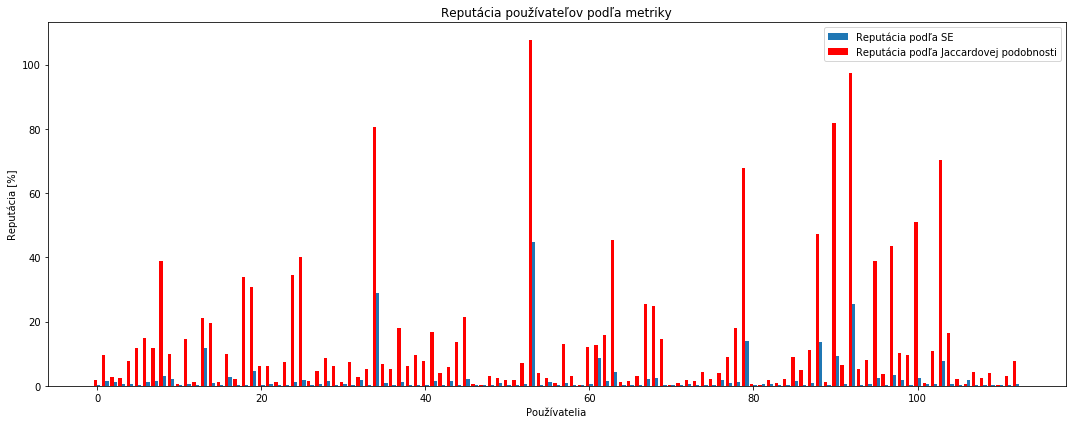

In [368]:
words_jacc_expert = words_overal_jacq_sim.pop('userId1352')

corr_coef = get_corr_coef(expert_user, words_jacc_expert)

scaled_user_rep = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : words_overal_jacq_sim[key]*corr_coef for key in words_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

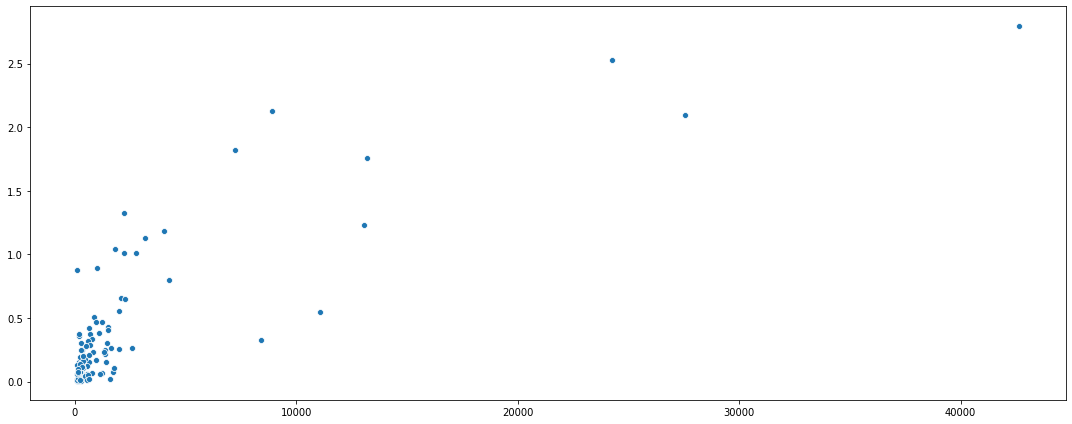

In [369]:
np_words_jacq_sim = np.array(list(words_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_words_jacq_sim)

In [370]:
my_rho = np.corrcoef(np_user_rep, np_words_jacq_sim)
print(my_rho)

[[1.         0.81820045]
 [0.81820045 1.        ]]


In [371]:
print(calculate_order_score(words_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(words_overal_jacq_sim, present_user_rep, corr_coef))

User on correct position: 3
User on wrong position: 110
None
maximal deviation is: 93
93
mean deviation: 18.15929203539823
num of values bellow mean dev: 71
18.15929203539823
order deviation list is: [7, 8, 48, 27, 4, 93, 36, 2, 26, 19, 17, 30, 2, 11, 26, 10, 1, 1, 39, 65, 0, 62, 3, 1, 3, 15, 20, 24, 24, 32, 7, 7, 11, 9, 21, 44, 26, 34, 16, 38, 28, 2, 5, 3, 28, 16, 6, 2, 7, 15, 33, 7, 36, 10, 4, 10, 4, 34, 18, 11, 57, 29, 18, 37, 2, 9, 55, 21, 17, 8, 12, 38, 3, 19, 15, 15, 23, 9, 47, 44, 11, 13, 15, 13, 31, 7, 1, 2, 80, 14, 54, 46, 10, 1, 21, 1, 5, 9, 3, 25, 0, 2, 2, 6, 4, 24, 4, 14, 3, 2, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 7, 'userId48538': 8, 'userId24681': 48, 'userId92366': 27, 'userId282899': -4, 'userId146161': 93, 'userId97556': 36, 'userId125350': -2, 'userId94922': 26, 'userId61731': 19, 'userId54786': 17, 'userId77009': 30, 'userId173159': 2, 'userId48295': -11, 'userId98498': 26, 'userId315606': 10, 'userId6703': -1, 'userId13937

Cosine similarity

In [372]:
words_overal_cos_sim = metrics.get_cosine_sim(user_dict_words, merged_book)

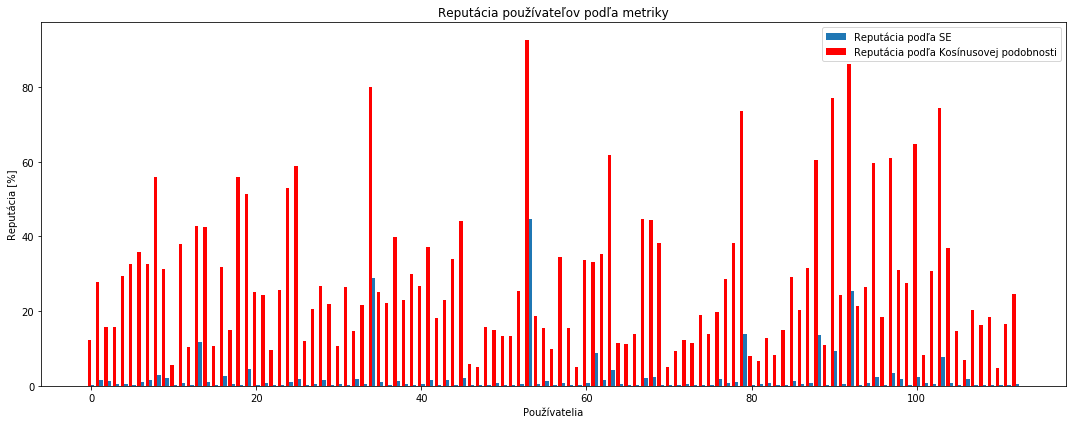

In [373]:
words_cos_expert = words_overal_cos_sim.pop('userId1352')

corr_coef2 = get_corr_coef(expert_user, words_cos_expert)

scaled_user_rep2 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : words_overal_cos_sim[key]*corr_coef2 for key in words_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep2, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

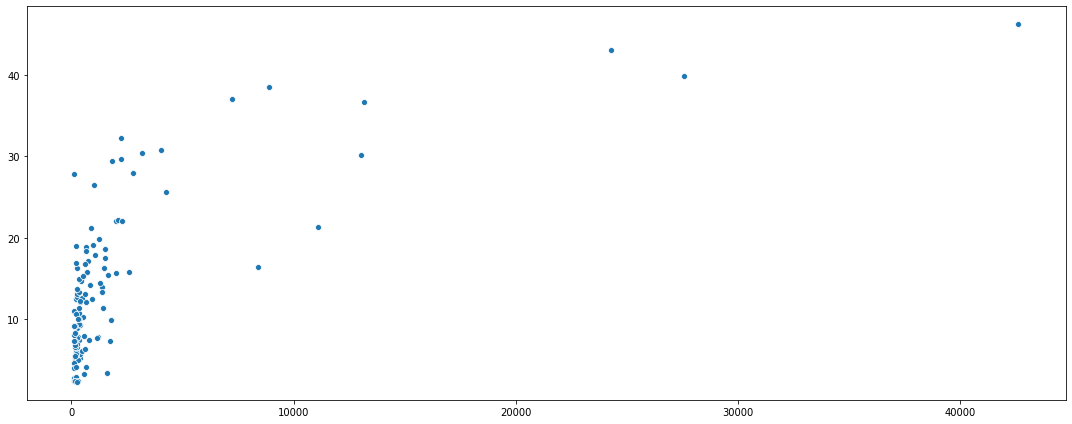

In [374]:
np_words_cos_sim = np.array(list(words_overal_cos_sim.values()))

sb.scatterplot(np_user_rep, np_words_cos_sim)

In [375]:
my_rho = np.corrcoef(np_user_rep, np_words_cos_sim)
print(my_rho)

[[1.         0.68221037]
 [0.68221037 1.        ]]


In [376]:
print(calculate_order_score(words_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(words_overal_cos_sim, present_user_rep, corr_coef2))

User on correct position: 5
User on wrong position: 108
None
maximal deviation is: 94
94
mean deviation: 18.07079646017699
num of values bellow mean dev: 69
18.07079646017699
order deviation list is: [8, 10, 51, 26, 3, 94, 36, 3, 31, 22, 17, 32, 0, 10, 26, 11, 1, 2, 41, 70, 0, 61, 4, 1, 3, 16, 21, 23, 28, 35, 2, 3, 9, 8, 20, 43, 26, 30, 14, 37, 27, 4, 5, 2, 28, 13, 5, 1, 6, 17, 31, 7, 36, 5, 3, 16, 5, 34, 15, 10, 54, 23, 19, 39, 1, 9, 56, 19, 20, 7, 13, 38, 3, 19, 14, 15, 22, 8, 43, 43, 11, 11, 17, 15, 29, 6, 2, 0, 81, 15, 60, 45, 9, 1, 19, 1, 6, 9, 3, 22, 0, 3, 3, 6, 4, 25, 3, 14, 5, 2, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 8, 'userId48538': 10, 'userId24681': 51, 'userId92366': 26, 'userId282899': -3, 'userId146161': 94, 'userId97556': 36, 'userId125350': -3, 'userId94922': 31, 'userId61731': 22, 'userId54786': 17, 'userId77009': 32, 'userId173159': 0, 'userId48295': -10, 'userId98498': 26, 'userId315606': 11, 'userId6703': 1, 'userId13937':

Euclidean distance

In [377]:
words_overal_euclid_sim = metrics.get_euclid_dis(user_dict_words, merged_book)

In [378]:
# normalizing the score 
# words_overal_euclid_sim = metrics.min_max_normalize(words_overal_euclid_sim)

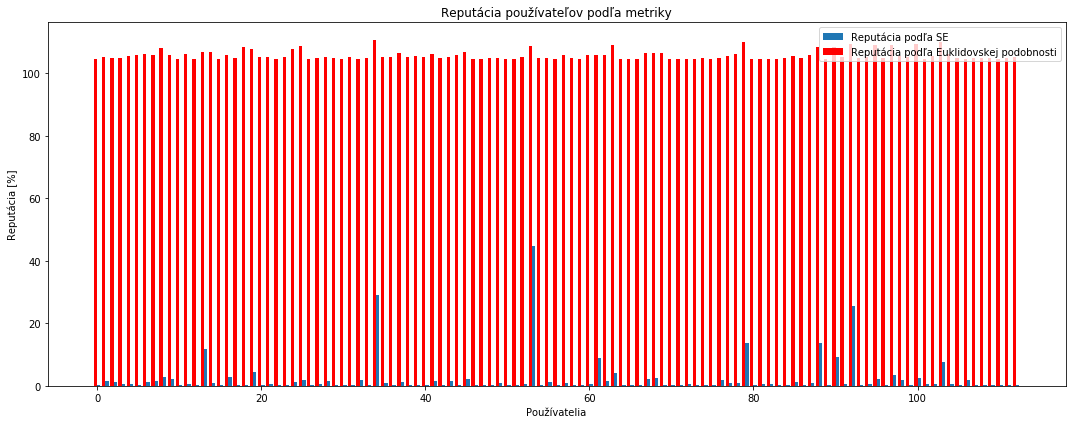

In [379]:
words_euclid_expert = words_overal_euclid_sim.pop('userId1352')

corr_coef3 = get_corr_coef(expert_user, words_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : words_overal_euclid_sim[key]*corr_coef3 for key in words_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

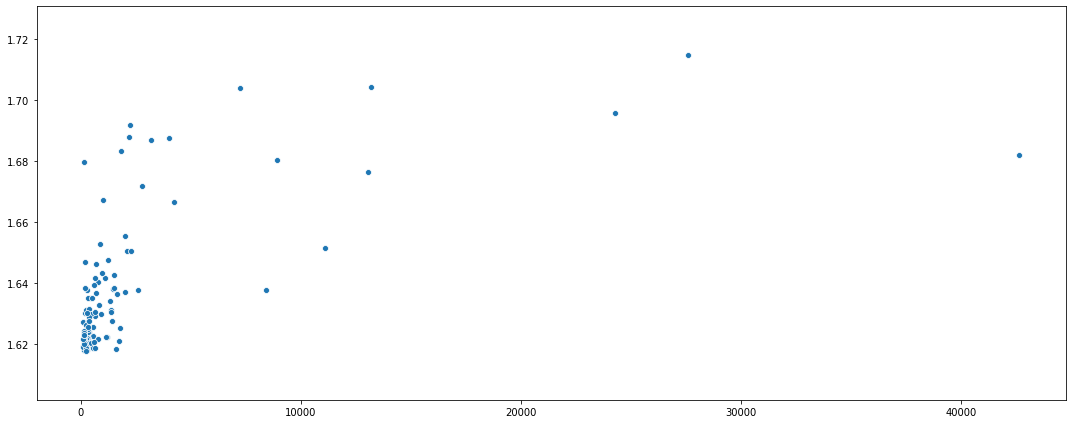

In [380]:
np_words_euclid_sim = np.array(list(words_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_words_euclid_sim)

In [381]:
my_rho = np.corrcoef(np_user_rep, np_words_euclid_sim)
print(my_rho)

[[1.         0.61618374]
 [0.61618374 1.        ]]


In [382]:
print(calculate_order_score(words_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(words_overal_euclid_sim, present_user_rep, corr_coef3))

User on correct position: 2
User on wrong position: 111
None
maximal deviation is: 96
96
mean deviation: 18.707964601769913
num of values bellow mean dev: 68
18.707964601769913
order deviation list is: [10, 11, 51, 29, 1, 96, 36, 6, 31, 26, 19, 34, 1, 8, 26, 13, 3, 1, 43, 71, 1, 60, 4, 1, 1, 17, 24, 24, 28, 38, 16, 0, 9, 6, 19, 43, 26, 26, 12, 35, 27, 7, 6, 1, 28, 12, 6, 1, 6, 19, 30, 8, 35, 3, 3, 16, 4, 33, 15, 10, 53, 23, 21, 38, 1, 7, 57, 19, 21, 6, 14, 41, 3, 22, 15, 13, 22, 8, 41, 43, 11, 11, 18, 17, 29, 5, 4, 0, 82, 15, 64, 44, 12, 3, 18, 3, 11, 11, 5, 22, 1, 4, 4, 6, 6, 26, 4, 13, 8, 2, 1, 1, 9]
******************************
order deviation dict is: {'userId57681': 10, 'userId48538': 11, 'userId24681': 51, 'userId92366': 29, 'userId282899': -1, 'userId146161': 96, 'userId97556': 36, 'userId125350': -6, 'userId94922': 31, 'userId61731': 26, 'userId54786': 19, 'userId77009': 34, 'userId173159': -1, 'userId48295': -8, 'userId98498': 26, 'userId315606': 13, 'userId6703': 3, 'userId

### Model testing with transformation

In [383]:
from parsing.model_evaluation import loading_models, metrics, ploting, model_processing_utils

In [384]:
jls8_sections_book_dict = loading_models.get_list_from_file(dir_path="D:/Skola/Skola-ing/DP/data/parsed_data/acm_books/jls8/acm_sub_sections", num_of_files_to_read="all")
java_notes_sections_book_dict = loading_models.get_list_from_file(dir_path="D:/Skola/Skola-ing/DP/data/parsed_data/acm_books/java_notes_for_profesionals/acm_sub_sections", num_of_files_to_read="all")
user_dict = loading_models.get_user_dict_from_file(r"D:/Skola/Skola-ing/DP/data/parsed_data/acm_users/answers")
user_rep = loading_models.get_user_reputation_dict_from_file(r"D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\\reputation\user_reputation.txt")

100%|██████████| 181/181 [00:00<00:00, 200.66it/s]


In [385]:
z_user_score_dict1 = loading_models.get_q_a_dict_from_file("D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\z_scores\z_scores2.txt")
z_user_score_list = list(z_user_score_dict1.keys())
user_dict = { key : val for key, val in user_dict.items() if int(key.split("userId")[1]) in z_user_score_list}
z_user_score_dict1 = { key : val for key, val in z_user_score_dict1.items() if f"userId{key}" in list(user_dict.keys())}

In [386]:
print(f"num of user models: {len(user_dict)}, num of user reps: {len(user_rep)}")

num of user models: 114, num of user reps: 13085


In [387]:
model_processing_utils.join_tuples_and_lemantize(user_dict)
model_processing_utils.join_tuples_and_lemantize(jls8_sections_book_dict)
model_processing_utils.join_tuples_and_lemantize(java_notes_sections_book_dict)

jls8_merged_book = model_processing_utils.merge_models(jls8_sections_book_dict)
java_notes_merged_book = model_processing_utils.merge_models(java_notes_sections_book_dict)

merged_book = model_processing_utils.merge_into_existing_model(jls8_merged_book, java_notes_merged_book)

present_user_rep = { key : user_rep[key.split('userId')[1]] for key in user_dict.keys()}
len(present_user_rep)

100%|██████████| 630/630 [00:00<?, ?it/s]


114

Define the transformations

In [388]:
transform_funcs = {
    "square_root" : lambda x: x**0.25,
    "pow2" : lambda x: x**2,
    # "log" : lambda x: math.log(x)
}

transform_key = "square_root"

#### Phrases

Jaccard similarity

In [389]:
phrases_overal_jacq_sim = { key : metrics.jaccard_similarity(merged_book, user_dict[key]) for key in user_dict.keys()}

Applying the transformation

In [390]:
phrases_overal_jacq_sim = { key : transform_funcs[transform_key](phrases_overal_jacq_sim[key]) for key in phrases_overal_jacq_sim.keys()}

In [391]:
phrases_overal_jacq_sim['userId1352']

1.4356757012915151

In [392]:
def calculate_file_size(dir_path):
    files = os.listdir(dir_path)
    files_size = sum(os.stat(os.path.join(dir_path, f)).st_size for f in files)
    return files_size


# using the dictionary create a dataframe and for each user/dir calculate the size of files, sort it and display the df
def get_sorted_file_list_by_size(metric_dict1, root_path):
    df = pd.DataFrame(list(metric_dict1.items()), columns=['UserID', 'Metric score'])
    df['file_size'] = df.apply(lambda x: calculate_file_size(os.path.join(root_path, str(x['UserID']))), axis=1)
    df = df.sort_values(by=['file_size'], ascending=False)
    return df
    

In [393]:
from parsing.model_evaluation.metrics import get_sorted_dicts, calculate_order_score, calculate_max_deviation, calculate_mean_deviation, calculate_total_deviation

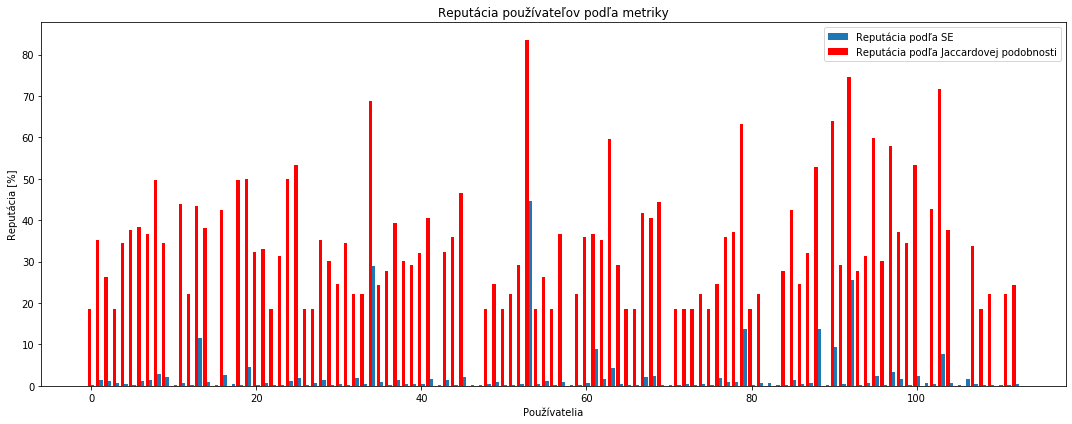

In [394]:
phrases_jacc_expert = phrases_overal_jacq_sim.pop('userId1352')
present_user_rep.pop('userId1352')

corr_coef = get_corr_coef(expert_user, phrases_jacc_expert)

scaled_user_rep = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : phrases_overal_jacq_sim[key]*corr_coef for key in phrases_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

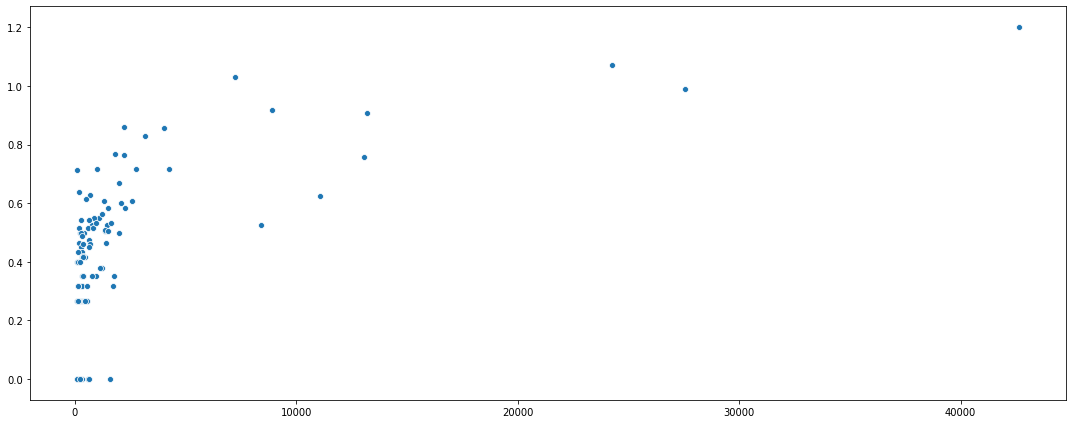

In [395]:
np_user_rep = np.array(list(present_user_rep.values()))
np_phrases_jacq_sim = np.array(list(phrases_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_phrases_jacq_sim)

In [396]:
my_rho = np.corrcoef(np_user_rep, np_phrases_jacq_sim)
print(my_rho)

[[1.         0.59193745]
 [0.59193745 1.        ]]


In [397]:
print(calculate_order_score(phrases_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_jacq_sim, present_user_rep, corr_coef))

User on correct position: 3
User on wrong position: 110
None
maximal deviation is: 92
92
mean deviation: 18.97345132743363
num of values bellow mean dev: 68
18.97345132743363
order deviation list is: [30, 25, 48, 9, 1, 92, 29, 7, 23, 42, 19, 47, 9, 6, 22, 23, 6, 16, 46, 76, 8, 53, 3, 4, 2, 16, 22, 22, 14, 40, 12, 25, 29, 10, 3, 48, 24, 30, 18, 0, 16, 25, 24, 10, 8, 43, 14, 4, 9, 13, 5, 34, 6, 12, 1, 15, 2, 30, 34, 44, 20, 41, 13, 55, 5, 0, 55, 15, 26, 8, 8, 26, 4, 11, 32, 5, 23, 8, 30, 32, 6, 10, 9, 11, 21, 6, 15, 1, 75, 8, 56, 47, 11, 3, 26, 6, 10, 5, 11, 9, 2, 3, 3, 3, 6, 28, 2, 14, 7, 2, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 30, 'userId48538': 25, 'userId24681': 48, 'userId92366': 9, 'userId282899': 1, 'userId146161': 92, 'userId97556': 29, 'userId125350': -7, 'userId94922': 23, 'userId61731': 42, 'userId54786': 19, 'userId77009': 47, 'userId173159': 9, 'userId48295': -6, 'userId98498': 22, 'userId315606': 23, 'userId6703': -6, 'userId13937

Checking if our model isnt biased by the size of user models

In [398]:
df = get_sorted_file_list_by_size(phrases_overal_jacq_sim, "D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\\answers")

In [399]:
df.head(20)

,UserID,Metric score,file_size
53,userId3249,1.200383,192201
92,userId7167,1.071668,110915
90,userId7080,0.917543,79009
34,userId2314,0.988441,70386
103,userId90992,1.030675,54876
79,userId5692,0.907953,51428
100,userId8500,0.764364,26354
88,userId66,0.758520,26119
97,userId79256,0.830296,25411
63,userId39690,0.855712,22454


Doesnt look like it - first 3 positions match but the rest not 

Cosine similarity

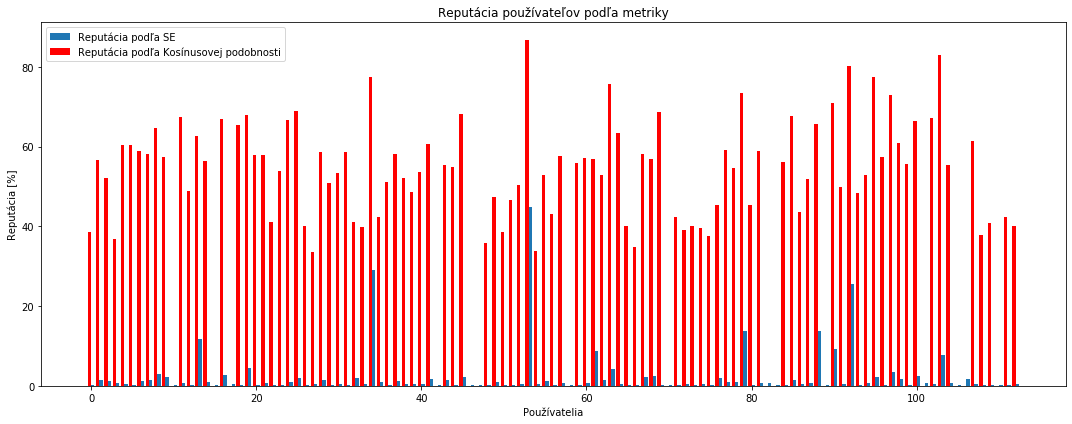

In [400]:
phrases_overal_cos_sim = metrics.get_cosine_sim(user_dict, merged_book)

# transformation
phrases_overal_cos_sim = { key : transform_funcs[transform_key](phrases_overal_cos_sim[key]) for key in phrases_overal_cos_sim.keys()}

phrases_cos_expert = phrases_overal_cos_sim.pop('userId1352')

corr_coef2 = get_corr_coef(expert_user, phrases_cos_expert)

scaled_user_rep2 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : phrases_overal_cos_sim[key]*corr_coef2 for key in phrases_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep2, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

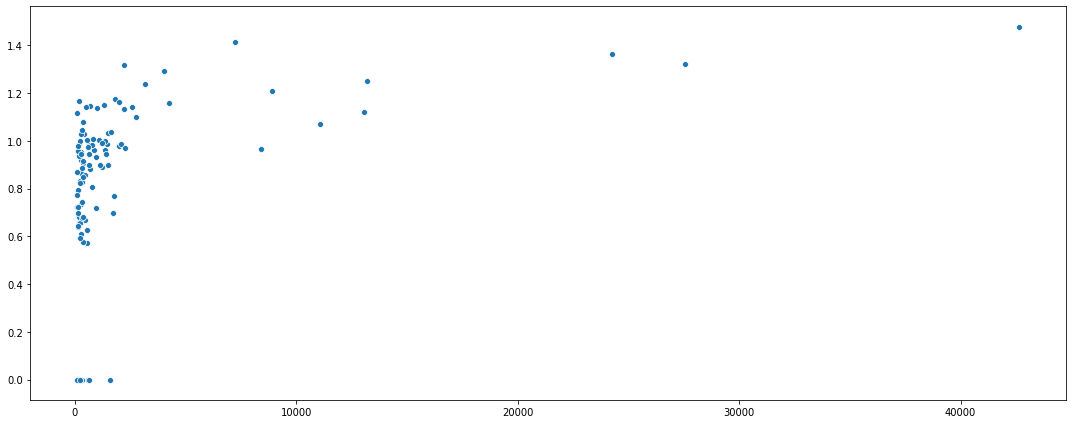

In [401]:
np_cos_sim = np.array(list(phrases_overal_cos_sim.values()))
sb.scatterplot(np_user_rep, np_cos_sim)

In [402]:
my_rho = np.corrcoef(np_user_rep, np_cos_sim)
print(my_rho)

[[1.         0.38294013]
 [0.38294013 1.        ]]


In [403]:
print(calculate_order_score(phrases_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_cos_sim, present_user_rep, corr_coef2))

User on correct position: 3
User on wrong position: 110
None
maximal deviation is: 87
87
mean deviation: 21.20353982300885
num of values bellow mean dev: 67
21.20353982300885
order deviation list is: [40, 34, 47, 9, 1, 87, 25, 7, 13, 56, 10, 60, 20, 6, 22, 26, 6, 16, 57, 83, 9, 39, 6, 1, 3, 16, 22, 16, 14, 51, 13, 25, 29, 10, 11, 50, 22, 26, 10, 25, 3, 23, 46, 18, 0, 43, 20, 9, 3, 8, 40, 35, 4, 23, 8, 29, 9, 33, 39, 44, 21, 42, 8, 55, 11, 9, 55, 6, 30, 19, 3, 29, 11, 7, 40, 16, 19, 5, 23, 27, 2, 18, 3, 16, 22, 9, 32, 1, 75, 2, 57, 52, 11, 8, 22, 18, 12, 3, 29, 3, 9, 4, 5, 3, 7, 37, 2, 18, 15, 3, 0, 2, 0]
******************************
order deviation dict is: {'userId57681': 40, 'userId48538': 34, 'userId24681': 47, 'userId92366': 9, 'userId282899': 1, 'userId146161': 87, 'userId97556': 25, 'userId125350': -7, 'userId94922': 13, 'userId61731': 56, 'userId54786': 10, 'userId77009': 60, 'userId173159': 20, 'userId48295': -6, 'userId98498': 22, 'userId315606': 26, 'userId6703': -6, 'userI

Euclidean distance

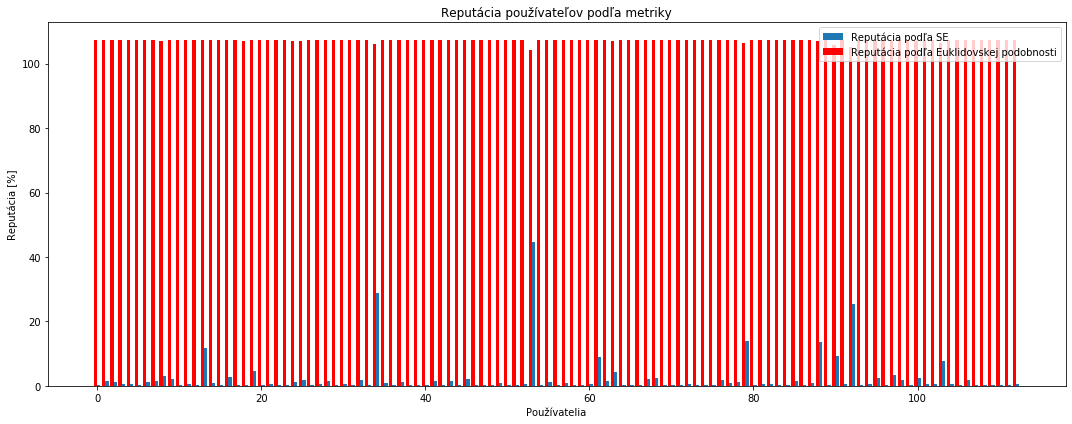

In [404]:
phrases_overal_euclid_sim = metrics.get_euclid_dis(user_dict, merged_book)


# transformation
phrases_overal_euclid_sim = { key : transform_funcs[transform_key](phrases_overal_euclid_sim[key]) for key in phrases_overal_euclid_sim.keys()}

# normalizing the score 
# phrases_overal_euclid_sim = metrics.min_max_normalize(phrases_overal_euclid_sim)

phrases_euclid_expert = phrases_overal_euclid_sim.pop('userId1352')

corr_coef3 = get_corr_coef(expert_user, phrases_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : phrases_overal_euclid_sim[key]*corr_coef3 for key in phrases_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

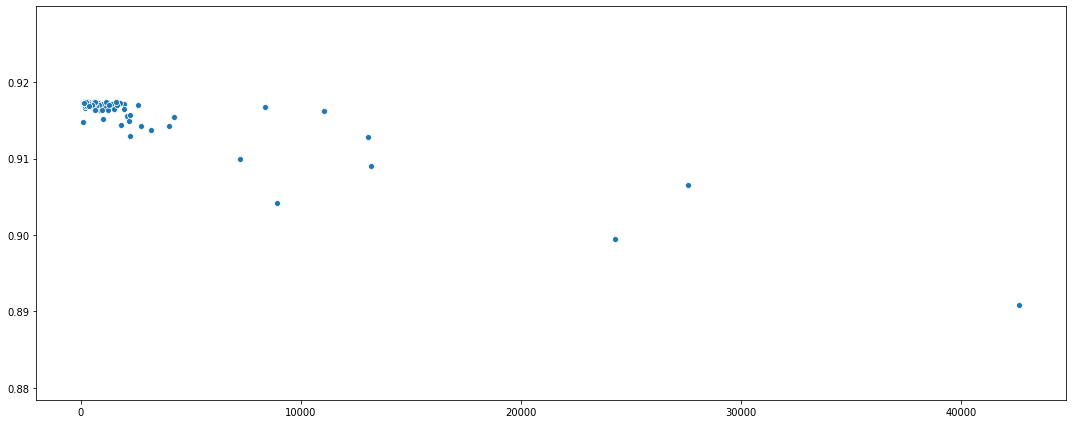

In [405]:
np_euclidean_sim = np.array(list(phrases_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_euclidean_sim)

In [406]:
my_rho = np.corrcoef(np_user_rep, np_euclidean_sim)
print(my_rho)

[[ 1.         -0.91812322]
 [-0.91812322  1.        ]]


In [407]:
print(calculate_order_score(phrases_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(phrases_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(phrases_overal_euclid_sim, present_user_rep, corr_coef3))

User on correct position: 1
User on wrong position: 112
None
maximal deviation is: 112
112
mean deviation: 50.63716814159292
num of values bellow mean dev: 54
50.63716814159292
order deviation list is: [109, 103, 68, 75, 103, 7, 60, 95, 75, 86, 71, 71, 86, 95, 60, 76, 84, 72, 53, 14, 73, 5, 70, 61, 66, 69, 73, 28, 73, 25, 38, 41, 27, 53, 69, 3, 20, 0, 7, 71, 66, 32, 33, 17, 3, 34, 16, 11, 4, 6, 61, 12, 53, 18, 3, 10, 3, 31, 19, 2, 52, 16, 30, 17, 15, 1, 30, 48, 38, 35, 41, 5, 30, 52, 24, 55, 62, 50, 9, 6, 58, 37, 34, 47, 27, 54, 63, 62, 9, 43, 23, 22, 81, 69, 47, 79, 83, 90, 81, 59, 90, 93, 93, 88, 99, 77, 104, 89, 102, 105, 109, 108, 112]
******************************
order deviation dict is: {'userId57681': 109, 'userId48538': 103, 'userId24681': 68, 'userId92366': 75, 'userId282899': 103, 'userId146161': 7, 'userId97556': 60, 'userId125350': 95, 'userId94922': 75, 'userId61731': 86, 'userId54786': 71, 'userId77009': 71, 'userId173159': 86, 'userId48295': 95, 'userId98498': 60, 'use

#### Words

In [408]:
user_dict_words = model_processing_utils.join_phrases_into_words(user_dict, "users")
merged_book = model_processing_utils.join_phrases_into_words(merged_book)

100%|██████████| 114/114 [00:01<00:00, 60.49it/s]


In [409]:
len(user_dict_words['userId11200'])

252

In [410]:
len(merged_book)

39280

Jaccard similarity

In [411]:
words_overal_jacq_sim = { key : metrics.jaccard_similarity(merged_book, user_dict_words[key]) for key in user_dict_words.keys()}

In [412]:
words_overal_jacq_sim['userId1352']

2.59793

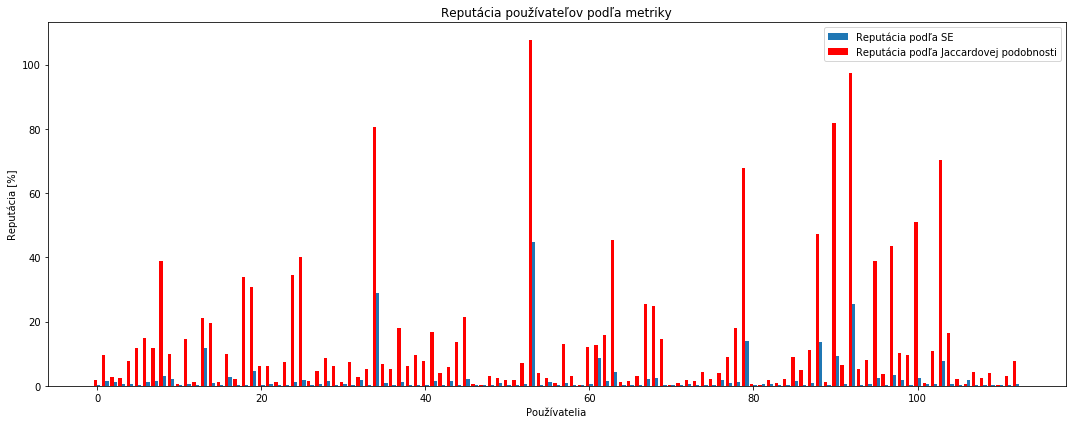

In [413]:
words_jacc_expert = words_overal_jacq_sim.pop('userId1352')

corr_coef = get_corr_coef(expert_user, words_jacc_expert)

scaled_user_rep = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_jacc_rep = {key : words_overal_jacq_sim[key]*corr_coef for key in words_overal_jacq_sim}
ploting.plot_vals(val_dict1=scaled_user_rep, val_dict2=scaled_jacc_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Jaccardovej podobnosti")

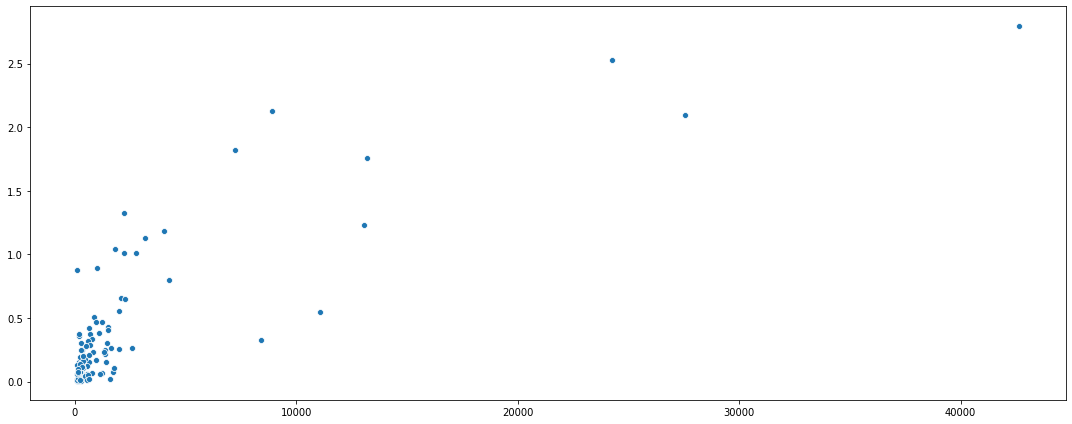

In [414]:
np_words_jacq_sim = np.array(list(words_overal_jacq_sim.values()))

sb.scatterplot(np_user_rep, np_words_jacq_sim)

In [415]:
my_rho = np.corrcoef(np_user_rep, np_words_jacq_sim)
print(my_rho)

[[1.         0.81820045]
 [0.81820045 1.        ]]


In [416]:
print(calculate_order_score(words_overal_jacq_sim, present_user_rep))
print(calculate_max_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_jacq_sim, present_user_rep))
print(calculate_total_deviation(words_overal_jacq_sim, present_user_rep, corr_coef))

User on correct position: 3
User on wrong position: 110
None
maximal deviation is: 93
93
mean deviation: 18.15929203539823
num of values bellow mean dev: 71
18.15929203539823
order deviation list is: [7, 8, 48, 27, 4, 93, 36, 2, 26, 19, 17, 30, 2, 11, 26, 10, 1, 1, 39, 65, 0, 62, 3, 1, 3, 15, 20, 24, 24, 32, 7, 7, 11, 9, 21, 44, 26, 34, 16, 38, 28, 2, 5, 3, 28, 16, 6, 2, 7, 15, 33, 7, 36, 10, 4, 10, 4, 34, 18, 11, 57, 29, 18, 37, 2, 9, 55, 21, 17, 8, 12, 38, 3, 19, 15, 15, 23, 9, 47, 44, 11, 13, 15, 13, 31, 7, 1, 2, 80, 14, 54, 46, 10, 1, 21, 1, 5, 9, 3, 25, 0, 2, 2, 6, 4, 24, 4, 14, 3, 2, 1, 2, 0]
******************************
order deviation dict is: {'userId57681': 7, 'userId48538': 8, 'userId24681': 48, 'userId92366': 27, 'userId282899': -4, 'userId146161': 93, 'userId97556': 36, 'userId125350': -2, 'userId94922': 26, 'userId61731': 19, 'userId54786': 17, 'userId77009': 30, 'userId173159': 2, 'userId48295': -11, 'userId98498': 26, 'userId315606': 10, 'userId6703': -1, 'userId13937

Cosine similarity

In [417]:
words_overal_cos_sim = metrics.get_cosine_sim(user_dict_words, merged_book)

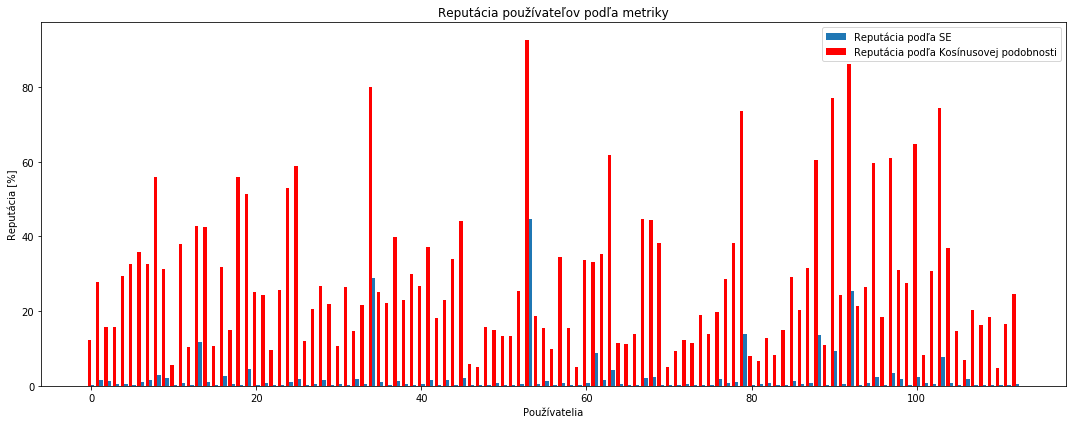

In [418]:
words_cos_expert = words_overal_cos_sim.pop('userId1352')

corr_coef2 = get_corr_coef(expert_user, words_cos_expert)

scaled_user_rep2 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_cos_rep = {key : words_overal_cos_sim[key]*corr_coef2 for key in words_overal_cos_sim}
ploting.plot_vals(val_dict1=scaled_user_rep2, val_dict2=scaled_cos_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Kosínusovej podobnosti")

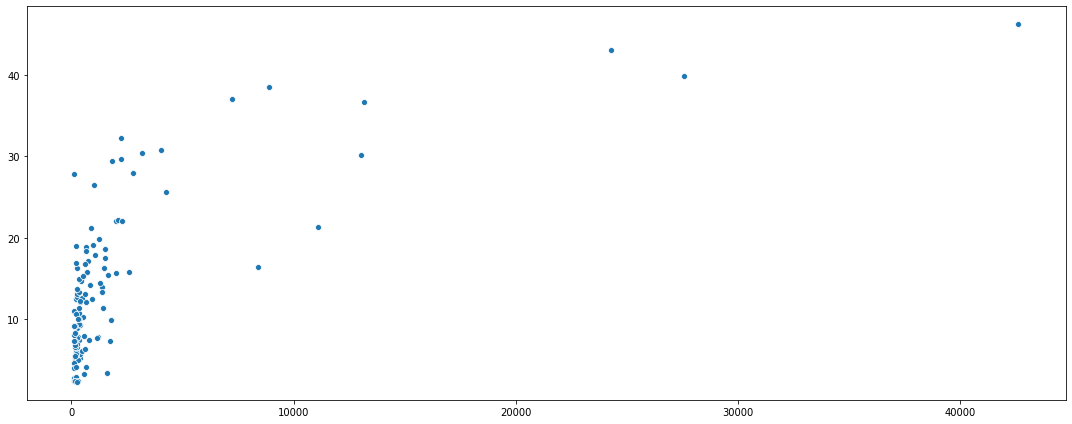

In [419]:
np_words_cos_sim = np.array(list(words_overal_cos_sim.values()))

sb.scatterplot(np_user_rep, np_words_cos_sim)

In [420]:
my_rho = np.corrcoef(np_user_rep, np_words_cos_sim)
print(my_rho)

[[1.         0.68221037]
 [0.68221037 1.        ]]


In [421]:
print(calculate_order_score(words_overal_cos_sim, present_user_rep))
print(calculate_max_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_cos_sim, present_user_rep))
print(calculate_total_deviation(words_overal_cos_sim, present_user_rep, corr_coef2))

User on correct position: 5
User on wrong position: 108
None
maximal deviation is: 94
94
mean deviation: 18.07079646017699
num of values bellow mean dev: 69
18.07079646017699
order deviation list is: [8, 10, 51, 26, 3, 94, 36, 3, 31, 22, 17, 32, 0, 10, 26, 11, 1, 2, 41, 70, 0, 61, 4, 1, 3, 16, 21, 23, 28, 35, 2, 3, 9, 8, 20, 43, 26, 30, 14, 37, 27, 4, 5, 2, 28, 13, 5, 1, 6, 17, 31, 7, 36, 5, 3, 16, 5, 34, 15, 10, 54, 23, 19, 39, 1, 9, 56, 19, 20, 7, 13, 38, 3, 19, 14, 15, 22, 8, 43, 43, 11, 11, 17, 15, 29, 6, 2, 0, 81, 15, 60, 45, 9, 1, 19, 1, 6, 9, 3, 22, 0, 3, 3, 6, 4, 25, 3, 14, 5, 2, 1, 1, 0]
******************************
order deviation dict is: {'userId57681': 8, 'userId48538': 10, 'userId24681': 51, 'userId92366': 26, 'userId282899': -3, 'userId146161': 94, 'userId97556': 36, 'userId125350': -3, 'userId94922': 31, 'userId61731': 22, 'userId54786': 17, 'userId77009': 32, 'userId173159': 0, 'userId48295': -10, 'userId98498': 26, 'userId315606': 11, 'userId6703': 1, 'userId13937':

Euclidean distance

In [422]:
words_overal_euclid_sim = metrics.get_euclid_dis(user_dict_words, merged_book)

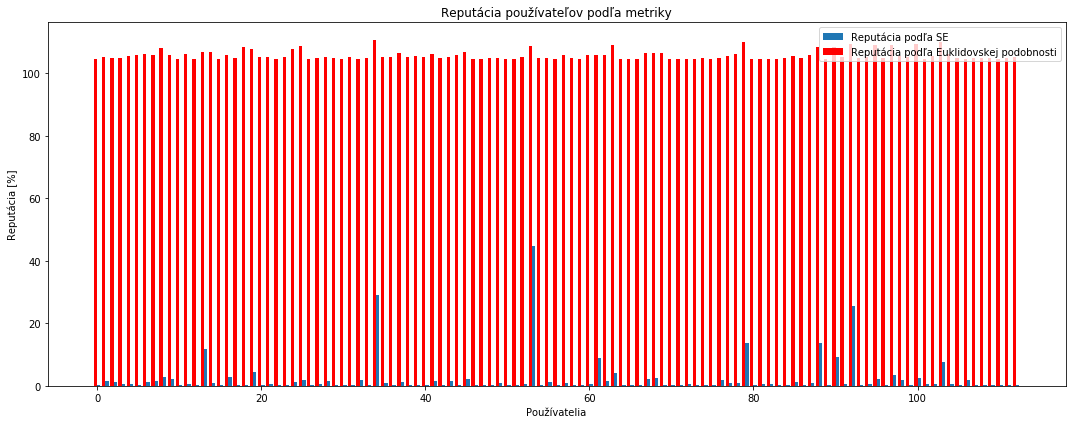

In [423]:
# normalizing the score 
# words_overal_euclid_sim = metrics.min_max_normalize(words_overal_euclid_sim)

words_euclid_expert = words_overal_euclid_sim.pop('userId1352')

corr_coef3 = get_corr_coef(expert_user, words_euclid_expert)

scaled_user_rep3 = {key : ((present_user_rep[key]/expert_user)*100) for key in present_user_rep}
scaled_euclid_rep = {key : words_overal_euclid_sim[key]*corr_coef3 for key in words_overal_euclid_sim}
ploting.plot_vals(val_dict1=scaled_user_rep3, val_dict2=scaled_euclid_rep, metric_name1="Reputácia podľa SE", metric_name2="Reputácia podľa Euklidovskej podobnosti")

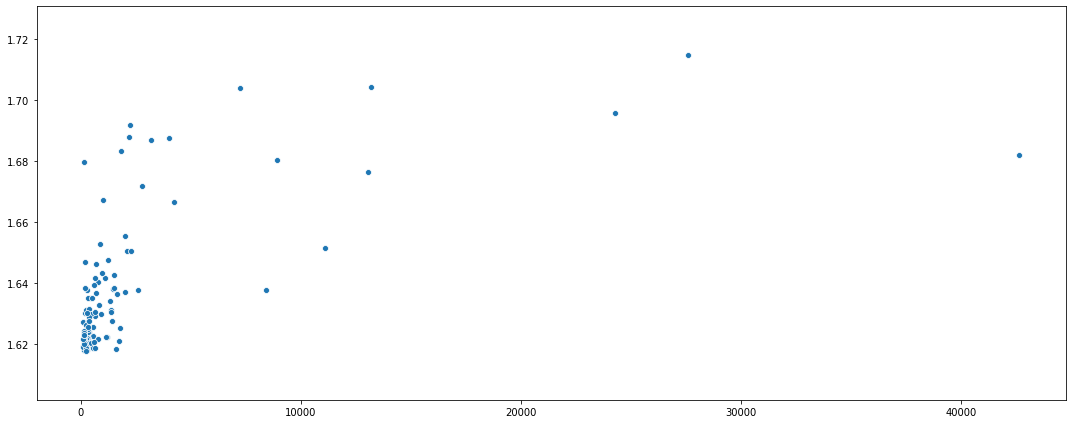

In [424]:
np_words_euclid_sim = np.array(list(words_overal_euclid_sim.values()))

sb.scatterplot(np_user_rep, np_words_euclid_sim)

In [425]:
my_rho = np.corrcoef(np_user_rep, np_words_euclid_sim)
print(my_rho)

[[1.         0.61618374]
 [0.61618374 1.        ]]


In [426]:
print(calculate_order_score(words_overal_euclid_sim, present_user_rep))
print(calculate_max_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_mean_deviation(words_overal_euclid_sim, present_user_rep))
print(calculate_total_deviation(words_overal_euclid_sim, present_user_rep, corr_coef3))

User on correct position: 2
User on wrong position: 111
None
maximal deviation is: 96
96
mean deviation: 18.707964601769913
num of values bellow mean dev: 68
18.707964601769913
order deviation list is: [10, 11, 51, 29, 1, 96, 36, 6, 31, 26, 19, 34, 1, 8, 26, 13, 3, 1, 43, 71, 1, 60, 4, 1, 1, 17, 24, 24, 28, 38, 16, 0, 9, 6, 19, 43, 26, 26, 12, 35, 27, 7, 6, 1, 28, 12, 6, 1, 6, 19, 30, 8, 35, 3, 3, 16, 4, 33, 15, 10, 53, 23, 21, 38, 1, 7, 57, 19, 21, 6, 14, 41, 3, 22, 15, 13, 22, 8, 41, 43, 11, 11, 18, 17, 29, 5, 4, 0, 82, 15, 64, 44, 12, 3, 18, 3, 11, 11, 5, 22, 1, 4, 4, 6, 6, 26, 4, 13, 8, 2, 1, 1, 9]
******************************
order deviation dict is: {'userId57681': 10, 'userId48538': 11, 'userId24681': 51, 'userId92366': 29, 'userId282899': -1, 'userId146161': 96, 'userId97556': 36, 'userId125350': -6, 'userId94922': 31, 'userId61731': 26, 'userId54786': 19, 'userId77009': 34, 'userId173159': -1, 'userId48295': -8, 'userId98498': 26, 'userId315606': 13, 'userId6703': 3, 'userId

## Z score

In [31]:
from parsing.model_evaluation import loading_models, metrics, ploting, model_processing_utils
from parsing.model_evaluation.metrics import get_sorted_dicts, calculate_order_score, calculate_max_deviation, calculate_mean_deviation, calculate_total_deviation

In [16]:
q_a_dictionary = loading_models.get_q_a_dict_from_file("D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\z_scores\z_scores3.txt")

In [17]:
user_rep = loading_models.get_user_reputation_dict_from_file(r"D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\\reputation\user_reputation.txt")

In [18]:
z_score_equation = lambda q, a: (a - q)/((a + q)**0.5) 

def calculate_z_score(q_a_dict):
    for key, val in q_a_dict.items():
        # q , a
        print(f"user : {key}, z-score: {z_score_equation(val[0], val[1])}")

In [19]:
user_rep['1352']

95315

In [20]:
q_a_dictionary.pop(1352)

(1, 838)

In [21]:
user_rep.pop('1352')

95315

In [22]:
z_score_dict = {user_id : z_score_equation(q, a) for user_id, (q, a) in q_a_dictionary.items()}
present_user_rep = { key : user_rep[str(key)] for key in z_score_dict.keys()}

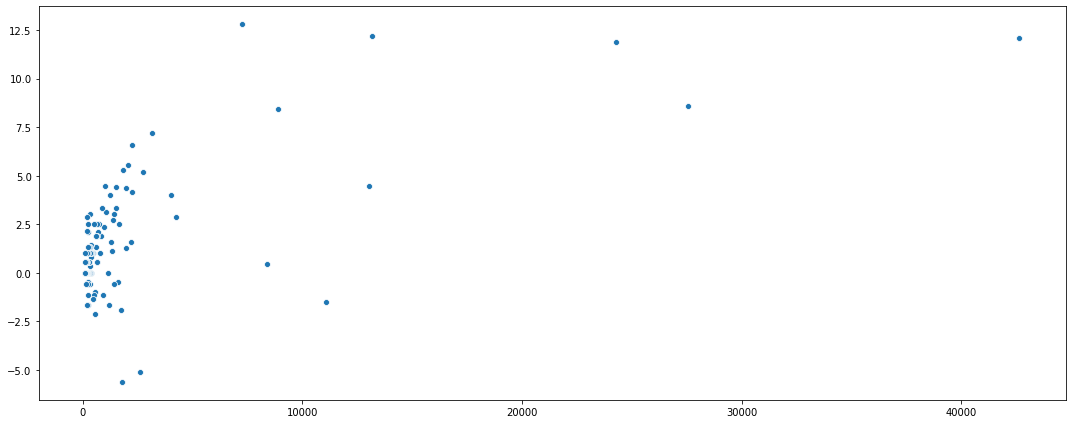

In [26]:
plt.rcParams['figure.figsize'] = [15, 6]
plt.rcParams["figure.autolayout"] = True

np_user_rep = np.array(list(present_user_rep.values()))
np_z_score = np.array(list(z_score_dict.values()))

sb.scatterplot(np_user_rep, np_z_score)

In [27]:
my_rho = np.corrcoef(np_user_rep, np_z_score)
print(my_rho)

[[1.         0.63434784]
 [0.63434784 1.        ]]


In [32]:
sorted_z_score_dict, present_user_rep = get_sorted_dicts(z_score_dict, present_user_rep)

In [34]:
calculate_order_score(sorted_z_score_dict, present_user_rep)
calculate_max_deviation(sorted_z_score_dict, present_user_rep)
calculate_mean_deviation(sorted_z_score_dict, present_user_rep)
calculate_total_deviation(sorted_z_score_dict, present_user_rep, 1)

User on correct position: 0
User on wrong position: 113
maximal deviation is: 100
mean deviation: 25.04424778761062
num of values bellow mean dev: 70
order deviation list is: [42, 40, 52, 37, 35, 59, 32, 29, 29, 26, 24, 42, 40, 38, 2, 18, 16, 14, 45, 61, 10, 68, 28, 18, 5, 3, 11, 8, 10, 41, 19, 4, 30, 27, 8, 44, 50, 32, 11, 14, 8, 6, 18, 20, 47, 23, 3, 14, 34, 11, 28, 8, 19, 32, 1, 3, 1, 49, 27, 49, 48, 59, 15, 4, 12, 10, 20, 17, 23, 9, 13, 15, 2, 21, 65, 6, 25, 15, 58, 75, 16, 9, 17, 4, 71, 5, 13, 6, 71, 7, 87, 91, 11, 5, 28, 9, 23, 8, 1, 98, 2, 5, 7, 15, 8, 61, 1, 100, 8, 2, 1, 3, 2]
******************************
order deviation dict is: {57681: 42, 48538: 40, 24681: 52, 92366: 37, 282899: 35, 146161: 59, 97556: 32, 94922: 29, 125350: 29, 61731: 26, 77009: 24, 54786: 42, 173159: 40, 48295: 38, 98498: 2, 315606: 18, 6703: 16, 13937: 14, 155976: 45, 47207: 61, 49377: 10, 271094: 68, 43607: 28, 101210: -18, 19232: 5, 59603: 3, 280963: -11, 73424: -8, 97857: -10, 227552: 41, 43880: -19,

2830

## Matching experiment

In this experiment we want to try to match to which parts of the book the users most match with their answers. First we load the base models for the jls8 book and the java notes book.

In [2]:
from parsing.model_evaluation import loading_models, metrics, ploting, model_processing_utils
from parsing.model_evaluation.metrics import get_sorted_dicts, calculate_order_score, calculate_max_deviation, calculate_mean_deviation, calculate_total_deviation
from parsing.preprocessing import pdf_preprocessing

In [3]:
jls8_sections_book_dict = loading_models.get_list_from_file(dir_path="D:/Skola/Skola-ing/DP/data/parsed_data/acm_books/jls8/acm_sub_sections", num_of_files_to_read="all")
java_notes_sections_book_dict = loading_models.get_list_from_file(dir_path="D:/Skola/Skola-ing/DP/data/parsed_data/acm_books/java_notes_for_profesionals/acm_sub_sections", num_of_files_to_read="all")
user_dict = loading_models.get_user_dict_from_file(r"D:/Skola/Skola-ing/DP/data/parsed_data/acm_users/answers")

100%|██████████| 181/181 [00:00<00:00, 201.70it/s]


In [4]:
z_user_score_dict1 = loading_models.get_q_a_dict_from_file("D:\Skola\Skola-ing\DP\data\parsed_data\\acm_users\z_scores\z_scores2.txt")
z_user_score_list = list(z_user_score_dict1.keys())
user_dict = { key : val for key, val in user_dict.items() if int(key.split("userId")[1]) in z_user_score_list}
z_user_score_dict1 = { key : val for key, val in z_user_score_dict1.items() if f"userId{key}" in list(user_dict.keys())}

In [5]:
model_processing_utils.join_tuples_and_lemantize(user_dict)
model_processing_utils.join_tuples_and_lemantize(jls8_sections_book_dict)
model_processing_utils.join_tuples_and_lemantize(java_notes_sections_book_dict)

100%|██████████| 630/630 [00:08<00:00, 77.44it/s] 


In [6]:
key_list1 = list(jls8_sections_book_dict.keys())
key_list2 = list(java_notes_sections_book_dict.keys())

In [7]:
%%capture
key_list2

In [8]:
section_list1 = [int(key.split("&")[0].split(".")[0]) for key in key_list1]
section_list2 = [int(key.split("&")[0].split(" ")[1].split(".")[0]) for key in key_list2]

In [9]:
%%capture
section_list2

In [10]:
combined_dict1 = dict(zip(key_list1, section_list1))
combined_dict2 = dict(zip(key_list2, section_list2))

In [11]:
jls8_section_df = pd.DataFrame(list(combined_dict1.items()), columns=["sub_sections", "sections"])
java_notes_section_df = pd.DataFrame(list(combined_dict2.items()), columns=["sub_sections", "sections"])

In [12]:
%%capture
java_notes_section_df

In [13]:
sec_list1 = sorted(list(jls8_section_df['sections'].unique()))
sec_list2 = sorted(list(java_notes_section_df['sections'].unique()))


In [14]:
sec_list2[-1]

181

In [15]:
jls8_section_df.loc[jls8_section_df['sections'] == 1]

,sub_sections,sections
0,1.1,1
1,1.2.&1.3,1
2,1.4.&1.5.&1.6.&Bibliography,1
3,1,1


In [16]:
jls8_sections_dict =  model_processing_utils.merge_sub_sec_into_sec(jls8_section_df, jls8_sections_book_dict)
java_notes_sections_dict =  model_processing_utils.merge_sub_sec_into_sec(java_notes_section_df,java_notes_sections_book_dict)

In [17]:
%%capture
jls8_sections_book_dict

In [18]:
%%capture
java_notes_sections_dict.keys()

In [19]:
jls8_overal_sim = {}
java_notes_overal_sim = {}
jls8_match_df = {}
java_notes_match_df = {}

In [20]:
jls8_overal_sim['jaccard'] = metrics.get_section_match(jls8_sections_dict, user_dict, metrics.jaccard_similarity)
java_notes_overal_sim['jaccard'] = metrics.get_section_match(java_notes_sections_dict, user_dict, metrics.jaccard_similarity)

jls8_overal_sim['cosine'] = metrics.get_section_match(jls8_sections_dict, user_dict, metrics.cosine_sim)
java_notes_overal_sim['cosine'] = metrics.get_section_match(java_notes_sections_dict, user_dict, metrics.jaccard_similarity)


In [21]:
len(jls8_sections_dict)

19

In [22]:
jls8_match_df['jaccard'] = pd.DataFrame(jls8_overal_sim['jaccard'].values(), index=list(jls8_overal_sim['jaccard'].keys()), columns=list(jls8_sections_dict.keys()))
jls8_match_df['cosine'] = pd.DataFrame(jls8_overal_sim['cosine'].values(), index=list(jls8_overal_sim['cosine'].keys()), columns=list(jls8_sections_dict.keys()))

java_notes_match_df['jaccard'] = pd.DataFrame(java_notes_overal_sim['jaccard'].values(), index=list(java_notes_overal_sim['jaccard'].keys()), columns=list(java_notes_sections_dict.keys()))
java_notes_match_df['cosine'] = pd.DataFrame(java_notes_overal_sim['cosine'].values(), index=list(java_notes_overal_sim['cosine'].keys()), columns=list(java_notes_sections_dict.keys()))


In [23]:
# %%capture
jls8_match_df['jaccard'][:10]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
userId101210,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
userId10190,0.00000,0.0,0.00000,0.09634,0.00000,0.10661,0.00000,0.07215,0.10537,0.00000,0.00000,0.00000,0.13228,0.00000,0.04581,0.24752,0.18365,0.00000,0.0
userId1028,0.00000,0.0,0.00000,0.00000,0.00000,0.11876,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.65147,0.00000,0.00000,0.0
userId102854,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
userId104231,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.07530,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.04706,0.28902,0.00000,0.14065,0.0
userId106835,0.00000,0.0,0.20921,0.19268,0.14124,0.00000,0.00000,0.07210,0.10526,0.00000,0.00000,0.10537,0.13210,0.00000,0.00000,0.00000,0.09166,0.12987,0.0
userId10935,0.00000,0.0,0.19268,0.00000,0.26738,0.20429,0.20747,0.07003,0.00000,0.00000,0.00000,0.30364,0.12531,0.00000,0.08993,0.00000,0.00000,0.12330,0.0
userId11200,0.00000,0.0,0.00000,0.19120,0.00000,0.00000,0.00000,0.14347,0.10438,0.31348,0.22779,0.00000,0.13072,0.00000,0.09128,0.00000,0.09099,0.00000,0.0
userId1177,0.19212,0.0,0.09737,0.37903,0.31898,0.06720,0.00000,0.15512,0.13351,0.34965,0.40942,0.46917,0.23006,0.21307,0.25669,0.10482,0.18315,0.07582,0.0
userId121080,0.00000,0.0,0.00000,0.09901,0.14728,0.00000,0.00000,0.14738,0.10858,0.35461,0.75000,0.10870,0.00000,0.12019,0.04640,0.00000,0.09416,0.00000,0.0


In [24]:
# %%capture
jls8_match_df['cosine'][:10]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
userId101210,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
userId10190,0.00000,0.0,0.00000,0.30447,0.00000,0.32246,0.00000,0.25942,0.32032,0.00000,0.00000,0.00000,0.36544,0.00000,0.20335,0.54477,0.59246,0.00000,0.0
userId1028,0.00000,0.0,0.00000,0.00000,0.00000,0.76112,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.57172,0.00000,0.00000,0.0
userId102854,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0
userId104231,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.36532,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.28635,0.76715,0.00000,0.50947,0.0
userId106835,0.00000,0.0,0.48658,0.60894,0.38029,0.00000,0.00000,0.25942,0.32032,0.00000,0.00000,0.32051,0.36544,0.00000,0.00000,0.00000,0.29623,0.36178,0.0
userId10935,0.00000,0.0,0.41740,0.00000,0.65244,0.55322,0.44058,0.22254,0.00000,0.00000,0.00000,0.82482,0.31348,0.00000,0.34887,0.00000,0.00000,0.31035,0.0
userId11200,0.00000,0.0,0.00000,0.58679,0.00000,0.00000,0.00000,0.49997,0.30867,0.63961,0.50275,0.00000,0.35215,0.00000,0.39190,0.00000,0.28545,0.00000,0.0
userId1177,0.40057,0.0,0.20440,0.76741,0.63901,0.13546,0.00000,0.32694,0.26912,0.83650,0.87667,0.94250,0.46055,0.42715,0.59796,0.22885,0.37332,0.15198,0.0
userId121080,0.00000,0.0,0.00000,0.35308,0.44101,0.00000,0.00000,0.60168,0.37146,0.76973,1.81508,0.37169,0.00000,0.39306,0.23581,0.00000,0.34353,0.00000,0.0


In [25]:
# %%capture
java_notes_match_df['jaccard'][:10]

,1,2,3,4,5,6,7,8,9,10,...,172,173,174,175,176,177,178,179,180,181
userId101210,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId10190,0.00000,0.0,0.00000,0.00000,0.46296,0.00000,0.0,0.00000,0.0,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId1028,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId102854,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId104231,0.46296,0.0,0.00000,1.19048,0.00000,0.00000,0.0,0.00000,0.0,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId106835,0.36364,0.0,0.00000,0.00000,0.46083,0.00000,0.0,0.24631,0.0,0.40161,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId10935,0.63492,0.0,0.00000,0.00000,0.77821,0.00000,0.0,0.44843,0.0,0.00000,...,0.53763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId11200,0.35336,0.0,0.00000,0.00000,0.89286,0.00000,0.0,0.48426,0.0,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId1177,0.12136,0.0,0.13514,0.00000,0.00000,0.14006,0.0,0.20964,0.0,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId121080,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# %%capture
java_notes_match_df['cosine'][:10]

,1,2,3,4,5,6,7,8,9,10,...,172,173,174,175,176,177,178,179,180,181
userId101210,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId10190,0.00000,0.0,0.00000,0.00000,0.46296,0.00000,0.0,0.00000,0.0,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId1028,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId102854,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId104231,0.46296,0.0,0.00000,1.19048,0.00000,0.00000,0.0,0.00000,0.0,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId106835,0.36364,0.0,0.00000,0.00000,0.46083,0.00000,0.0,0.24631,0.0,0.40161,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId10935,0.63492,0.0,0.00000,0.00000,0.77821,0.00000,0.0,0.44843,0.0,0.00000,...,0.53763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId11200,0.35336,0.0,0.00000,0.00000,0.89286,0.00000,0.0,0.48426,0.0,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId1177,0.12136,0.0,0.13514,0.00000,0.00000,0.14006,0.0,0.20964,0.0,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
userId121080,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
filter_non_zero_rows = lambda row: True if row.any() > 0 else False

In [28]:
# calculating the most match values
jls8_match_df['jaccard'].loc[:, 'metric_sum_val'] = jls8_match_df['jaccard'].sum(axis=1)
jls8_match_df['cosine'].loc[:, 'metric_sum_val'] = jls8_match_df['cosine'].sum(axis=1)

java_notes_match_df['jaccard'].loc[:, 'metric_sum_val'] = java_notes_match_df['jaccard'].sum(axis=1)
java_notes_match_df['cosine'].loc[:, 'metric_sum_val'] = java_notes_match_df['cosine'].sum(axis=1)

# sorting the dataframe by the 
jls8_match_df['jaccard'] = jls8_match_df['jaccard'].sort_values(by=['metric_sum_val'], ascending=False)
jls8_match_df['cosine'] = jls8_match_df['cosine'].sort_values(by=['metric_sum_val'], ascending=False)

java_notes_match_df['jaccard'] = java_notes_match_df['jaccard'].sort_values(by=['metric_sum_val'], ascending=False)
java_notes_match_df['cosine'] = java_notes_match_df['cosine'].sort_values(by=['metric_sum_val'], ascending=False)

In [29]:
dumy_df_jls8 = {}
dumy_df_java_notes = {}

dumy_df_jls8['jaccard'] = jls8_match_df['jaccard'].loc[jls8_match_df['jaccard']['metric_sum_val'] > 0]
dumy_df_jls8['cosine'] = jls8_match_df['cosine'].loc[jls8_match_df['cosine']['metric_sum_val'] > 0]

dumy_df_java_notes['jaccard'] = java_notes_match_df['jaccard'].loc[java_notes_match_df['jaccard']['metric_sum_val'] > 0]
dumy_df_java_notes['cosine'] = java_notes_match_df['cosine'].loc[java_notes_match_df['cosine']['metric_sum_val'] > 0]

In [30]:
# %%capture
dumy_df_jls8['jaccard'][:10]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,metric_sum_val
userId76809,0.56980,0.38363,0.57803,0.75330,0.47319,0.19973,0.19900,0.82602,0.39735,0.11416,0.20101,0.73138,0.45558,0.28110,0.62203,0.10309,0.54612,0.22506,0.00000,7.65958
userId2314,0.49540,0.00000,0.10631,0.50460,0.55958,0.52004,0.17966,0.80994,0.45704,0.37764,0.14420,0.30432,0.48559,0.18738,0.62181,0.10913,0.32098,0.22508,0.00000,6.40870
userId90992,0.44763,0.00000,0.08981,0.68567,0.32640,0.22355,0.13705,0.80308,0.37161,0.34063,0.41417,0.44643,0.52104,0.19179,0.63939,0.00000,0.60177,0.15892,0.00000,6.39894
userId1352,0.31833,0.03017,0.12917,0.62175,0.31002,0.30654,0.20922,0.68837,0.40892,0.19049,0.17437,0.48232,0.38320,0.29301,0.91870,0.06478,0.49359,0.19111,0.01007,6.22413
userId3249,0.38146,0.03046,0.07329,0.51701,0.26996,0.23381,0.17704,0.62435,0.28854,0.18051,0.14771,0.48189,0.48077,0.25028,0.76760,0.05926,0.48622,0.22526,0.01529,5.69071
userId39690,0.25619,0.00000,0.08636,0.52601,0.28881,0.37175,0.17857,0.63260,0.36923,0.10091,0.09001,0.24600,0.27894,0.26008,0.45582,0.09217,0.28297,0.00000,0.00000,4.51642
userId7167,0.22411,0.00000,0.11231,0.38008,0.19239,0.28548,0.18132,0.28032,0.18293,0.14006,0.20450,0.32573,0.21160,0.22779,0.63684,0.13705,0.39604,0.14762,0.00000,4.26617
userId47207,0.37106,0.00000,0.00000,0.36934,0.00000,0.40692,0.82474,0.49020,0.10030,0.00000,0.20921,0.10040,0.37406,0.33113,0.35971,0.00000,0.00000,0.12240,0.00000,4.05947
userId146161,0.10428,0.00000,0.10593,0.33311,0.00000,0.35689,0.00000,0.37899,0.28309,0.25773,0.11148,0.21231,0.49261,0.22642,0.30269,0.00000,0.25740,0.32441,0.00000,3.74734
userId5692,0.18075,0.00000,0.18198,0.25399,0.20602,0.26355,0.13876,0.29014,0.14981,0.09838,0.04643,0.22497,0.48603,0.19380,0.33376,0.14111,0.28500,0.20088,0.00000,3.67536


In [31]:
# %%capture
dumy_df_jls8['cosine'][:10]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,metric_sum_val
userId1352,2.42164,0.43589,1.00402,3.09292,1.90139,1.61224,1.71199,2.96473,2.13541,2.00174,1.44920,2.51824,2.26219,1.61394,3.21149,0.56204,2.39797,1.11978,0.16723,34.58405
userId3249,1.68864,0.24939,0.33142,1.57607,0.98428,0.74674,0.83959,1.69628,0.91633,1.08502,0.71071,1.52814,1.69257,0.83108,1.80053,0.29684,1.45272,0.78853,0.14352,19.35840
userId76809,1.19364,1.14587,1.21818,1.52451,0.95208,0.40365,0.42862,1.73194,0.80194,0.27696,0.43539,1.47111,0.91491,0.56570,1.44243,0.22731,1.11244,0.45288,0.00000,16.29956
userId2314,1.47346,0.00000,0.32223,1.14258,1.42712,1.21009,0.56689,1.71800,1.06065,1.46522,0.46068,0.70753,1.21006,0.44892,1.25687,0.36077,0.71931,0.55904,0.00000,16.10942
userId90992,1.20653,0.00000,0.24627,1.46393,0.76989,0.48961,0.38992,1.64123,0.81060,1.17578,1.18825,0.97331,1.20222,0.42886,1.28647,0.00000,1.27438,0.36621,0.00000,14.91346
userId7167,0.81338,0.00000,0.41505,0.98690,0.58390,0.77016,0.70098,0.66386,0.49182,0.67942,0.80106,0.87487,0.62344,0.63605,1.35295,0.55762,1.01074,0.43204,0.00000,12.39424
userId47207,0.81287,0.00000,0.00000,1.03820,0.00000,1.09954,1.75136,1.54804,0.27306,0.00000,0.44476,0.27323,0.93458,0.86681,1.38678,0.00000,0.00000,0.30841,0.00000,10.73764
userId42267,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.88736,0.00000,0.00000,1.78458,1.09632,0.00000,2.31869,2.08666,0.00000,0.00000,1.23749,0.00000,9.41110
userId39690,0.55184,0.00000,0.18773,1.05722,0.58689,0.74646,0.39632,1.30116,0.74151,0.25609,0.20129,0.49464,0.56397,0.52307,1.01991,0.21018,0.57145,0.00000,0.00000,9.40973
userId126703,1.21181,0.00000,0.00000,0.51591,0.00000,0.00000,0.00000,0.87915,0.54277,1.68704,0.88404,1.08619,0.00000,0.28716,0.86140,0.46154,0.50195,0.00000,0.00000,8.91896


In [32]:
# %%capture
dumy_df_java_notes['jaccard'][:10]

,1,2,3,4,5,6,7,8,9,10,...,173,174,175,176,177,178,179,180,181,metric_sum_val
userId126703,0.00000,0.0,0.42373,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.34014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.61569
userId27540,0.24691,0.0,0.31153,0.00000,0.28818,0.00000,0.00000,0.00000,0.23095,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.96275
userId62100,0.35842,0.0,0.51282,0.00000,0.00000,0.00000,0.00000,0.24390,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.37420
userId39690,0.20964,0.0,0.00000,0.00000,0.00000,0.11834,0.00000,0.09208,0.20367,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.69087
userId139925,0.70175,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.48077,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.41832
userId11200,0.35336,0.0,0.00000,0.00000,0.89286,0.00000,0.00000,0.48426,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.96420
userId104231,0.46296,0.0,0.00000,1.19048,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.28019
userId86778,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.23419,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.13828
userId90992,0.04938,0.0,0.10309,0.05283,0.15267,0.05222,0.05274,0.13928,0.19512,0.20040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.13592
userId47207,0.31056,0.0,0.42017,0.00000,0.00000,0.00000,0.00000,0.44248,0.00000,0.33784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.60870


In [33]:
# %%capture
dumy_df_java_notes['cosine'][:10]

,1,2,3,4,5,6,7,8,9,10,...,173,174,175,176,177,178,179,180,181,metric_sum_val
userId126703,0.00000,0.0,0.42373,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.34014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.61569
userId27540,0.24691,0.0,0.31153,0.00000,0.28818,0.00000,0.00000,0.00000,0.23095,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.96275
userId62100,0.35842,0.0,0.51282,0.00000,0.00000,0.00000,0.00000,0.24390,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.37420
userId39690,0.20964,0.0,0.00000,0.00000,0.00000,0.11834,0.00000,0.09208,0.20367,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.69087
userId139925,0.70175,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.48077,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.41832
userId11200,0.35336,0.0,0.00000,0.00000,0.89286,0.00000,0.00000,0.48426,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.96420
userId104231,0.46296,0.0,0.00000,1.19048,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.28019
userId86778,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.23419,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.13828
userId90992,0.04938,0.0,0.10309,0.05283,0.15267,0.05222,0.05274,0.13928,0.19512,0.20040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.13592
userId47207,0.31056,0.0,0.42017,0.00000,0.00000,0.00000,0.00000,0.44248,0.00000,0.33784,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.60870


In [34]:
top_jls8_jacc_match = dumy_df_jls8['jaccard'].index[0]
top_jls8_cos_match = dumy_df_jls8['cosine'].index[0]

top_java_notes_jacc_match = dumy_df_java_notes['jaccard'].index[0]
top_java_notes_cos_match = dumy_df_java_notes['cosine'].index[0]


In [35]:
print(top_jls8_jacc_match)
print(top_jls8_cos_match)
print(top_java_notes_jacc_match)
print(top_java_notes_cos_match)

userId76809
userId1352
userId126703
userId126703


In [36]:
def get_top_matching_cols(series_row):
    local_dict = {val[0] : val[1][0]  for val in series_row.items() if val[1][0] > 0 and val[0] is not "is_greater"}
    local_dict  = dict(sorted(local_dict.items(), key=lambda item: item[1], reverse=True))
    return local_dict
    

In [58]:
col_names1 = get_top_matching_cols(dumy_df_jls8['jaccard'].loc[[top_jls8_jacc_match]])
col_names2 = get_top_matching_cols(dumy_df_jls8['cosine'].loc[[top_jls8_cos_match]])
col_names3 = get_top_matching_cols(dumy_df_java_notes['jaccard'].loc[[top_java_notes_jacc_match]])
col_names4 = get_top_matching_cols(dumy_df_java_notes['cosine'].loc[["userId39690"]])

In [59]:
col_names1.pop("metric_sum_val")

7.659580000000001

In [60]:
col_names2.pop("metric_sum_val")

34.584050000000005

In [61]:
col_names3.pop("metric_sum_val")

42.615689999999994

In [62]:
col_names4.pop("metric_sum_val")

21.690869999999993

In [63]:
dumy_df_jls8['jaccard'].loc[[top_jls8_jacc_match], col_names1]

,8,4,12,15,3,1,17,5,13,9,2,14,18,11,6,7,10,16
userId76809,0.82602,0.7533,0.73138,0.62203,0.57803,0.5698,0.54612,0.47319,0.45558,0.39735,0.38363,0.2811,0.22506,0.20101,0.19973,0.199,0.11416,0.10309


In [64]:
dumy_df_jls8['cosine'].loc[[top_jls8_cos_match], col_names2]

,15,4,8,12,1,17,13,9,10,5,7,14,6,11,18,3,16,2,19
userId1352,3.21149,3.09292,2.96473,2.51824,2.42164,2.39797,2.26219,2.13541,2.00174,1.90139,1.71199,1.61394,1.61224,1.4492,1.11978,1.00402,0.56204,0.43589,0.16723


In [65]:
dumy_df_java_notes['jaccard'].loc[[top_java_notes_jacc_match], col_names3]

,137,78,23,35,54,40,89,48,55,91,...,111,33,103,16,10,47,73,126,148,147
userId126703,1.5748,1.47059,1.33929,1.21457,1.20846,1.19522,1.17647,1.04895,1.03627,1.0,...,0.40816,0.38168,0.37175,0.34965,0.34014,0.31847,0.31056,0.31056,0.26882,0.25


In [66]:
dumy_df_java_notes['cosine'].loc[[top_java_notes_cos_match], col_names4]

,54,132,137,126,135,131,69,23,130,42,...,28,152,169,89,139,166,117,133,8,40
userId126703,1.20846,0.0,1.5748,0.31056,0.46368,0.60241,0.65445,1.33929,0.66519,0.82873,...,0.4329,0.42735,0.0,1.17647,0.0,0.0,0.0,0.5618,0.0,1.19522


Ploting the results

In [67]:
from parsing.model_evaluation.ploting import plot_chapter_matching_pie

In [68]:
col_names1, col_names2 = get_sorted_dicts(col_names1, col_names2)
col_names3, col_names4 = get_sorted_dicts(col_names3, col_names4)

In [69]:
col_names1 = { f"Sekcia {key}": col_names1[key] for key in list(col_names1)[-5:]}
col_names2 = { f"Sekcia {key}": col_names2[key] for key in list(col_names2)[-5:]}
col_names3 = { f"Sekcia {key}": col_names3[key] for key in list(col_names3)[-5:]}
col_names4 = { f"Sekcia {key}": col_names4[key] for key in list(col_names4)[-5:]}

In [70]:
col_names1

{'Sekcia 3': 0.57803,
 'Sekcia 15': 0.62203,
 'Sekcia 12': 0.73138,
 'Sekcia 4': 0.7533,
 'Sekcia 8': 0.82602}

In [71]:
col_names2

{'Sekcia 1': 2.42164,
 'Sekcia 12': 2.51824,
 'Sekcia 8': 2.96473,
 'Sekcia 4': 3.09292,
 'Sekcia 15': 3.21149}

In [72]:
col_names3

{'Sekcia 54': 1.20846,
 'Sekcia 35': 1.21457,
 'Sekcia 23': 1.33929,
 'Sekcia 78': 1.47059,
 'Sekcia 137': 1.5748}

In [73]:
col_names4

{'Sekcia 135': 0.62647,
 'Sekcia 126': 0.62844,
 'Sekcia 137': 0.67644,
 'Sekcia 132': 0.69513,
 'Sekcia 54': 1.35841}

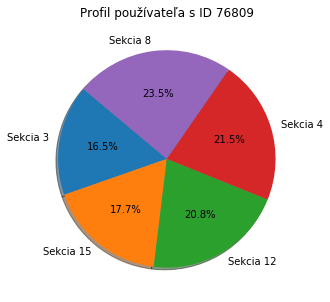

In [74]:

plot_chapter_matching_pie(col_names1, top_jls8_jacc_match.split("userId")[1])

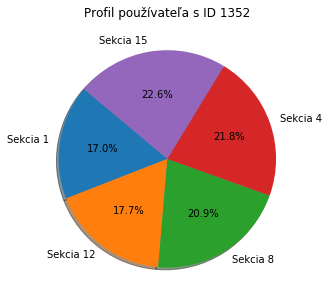

In [75]:
plot_chapter_matching_pie(col_names2, top_jls8_cos_match.split("userId")[1])

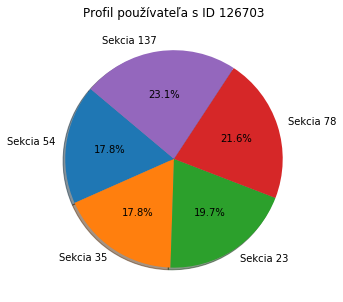

In [76]:
plot_chapter_matching_pie(col_names3, top_java_notes_jacc_match.split("userId")[1])

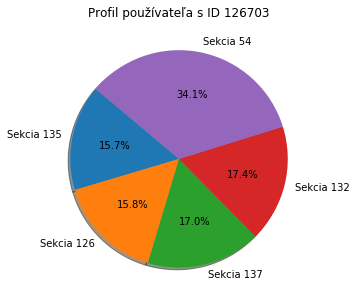

In [77]:
plot_chapter_matching_pie(col_names4, top_java_notes_cos_match.split("userId")[1])

In [52]:
local_jls8_section_df = jls8_section_df.loc[jls8_section_df['sections'] == 8]

In [53]:
local_jls8_section_df

,sub_sections,sections
294,8.1.&8.1.1,8
295,8.1.1.2.&8.1.1.3.&8.1.2,8
296,8.1.3,8
297,8.1.4,8
298,8.1.5,8
299,8.1.6,8
300,8.2,8
301,8.3.1,8
302,8.3.2,8
303,8.3.3,8


In [54]:
toc_list = pdf_preprocessing.get_toc_list("D:/Skola/Skola-ing/DP/data/books_to_parse/jls8_cropped-1.pdf")

In [55]:
toc_list

[(1, 'The Java® Language Specification', 1),
 (1, 'Table of Contents', 5),
 (1, 'Preface to the Java SE 8 Edition', 19),
 (1, '1. Introduction', 21),
 (2, '1.1. Organization of the Specification', 22),
 (2, '1.2. Example Programs', 26),
 (2, '1.3. Notation', 26),
 (2, '1.4. Relationship to Predefined Classes and Interfaces', 27),
 (2, '1.5. Feedback', 27),
 (2, '1.6. References', 27),
 (3, 'Bibliography', 27),
 (1, '2. Grammars', 29),
 (2, '2.1. Context-Free Grammars', 29),
 (2, '2.2. The Lexical Grammar', 29),
 (2, '2.3. The Syntactic Grammar', 30),
 (2, '2.4. Grammar Notation', 30),
 (1, '3. Lexical Structure', 35),
 (2, '3.1. Unicode', 35),
 (2, '3.2. Lexical Translations', 36),
 (2, '3.3. Unicode Escapes', 37),
 (2, '3.4. Line Terminators', 39),
 (2, '3.5. Input Elements and Tokens', 39),
 (2, '3.6. White Space', 40),
 (2, '3.7. Comments', 41),
 (2, '3.8. Identifiers', 42),
 (2, '3.9. Keywords', 44),
 (2, '3.10. Literals', 44),
 (3, '3.10.1. Integer Literals', 45),
 (3, '3.10.2. Fl

In [56]:
sub_sec_list = list(jls8_section_df.loc[jls8_section_df['sections'] == 8, ['sub_sections']]['sub_sections'])